In [ ]:
%pip install -q amplpy,
from amplpy import AMPL, ampl_notebook
ampl = ampl_notebook(
    modules=["highs", "cbc", "gurobi", "cplex"], # pick from over 20 modules including most commercial and open-source solvers
    license_uuid="Insira sua lcienca aqui") # your license UUID (e.g., free ampl.com/ce or ampl.com/courses licenses)

ERROR: Invalid requirement: 'amplpy,': Expected end or semicolon (after name and no valid version specifier)
    amplpy,
          ^


ModuleNotFoundError: No module named 'amplpy'

In [11]:
!pip install pulp

In [12]:
import pulp

# 1. ESTRUTURA√á√ÉO DOS DADOS
# Os dados foram extra√≠dos das tabelas do problema.

# Custo de Produ√ß√£o Tipo 35 ($/unidade)
CX = {
    (1, 'D5'): 760, (1, 'D6'): 879, (1, 'C4'): 733,
    (2, 'U2'): 790, (3, 'K4'): 758, (3, 'J6'): 799,
    (3, '70'): 888, (4, '1'): 933
}

# Custo de Produ√ß√£o Tipo 42 ($/unidade)
CY = {
    (1, 'D5'): 454, (1, 'D6'): 476, (1, 'C4'): 529,
    (2, 'T'): 520, (2, 'U2'): 668, (3, 'K4'): 509,
    (3, 'J6'): 521, (3, '70'): 625, (4, '1'): 538,
    (5, 'V1'): 503
}

# Demanda Tipo 35 (Planta, Trimestre): Demanda
DX = {
    (1, 1): 138, (1, 2): 142, (1, 3): 139, (1, 4): 140,
    (2, 1): 82,  (2, 2): 84,  (2, 3): 83,  (2, 4): 84,
    (3, 1): 32,  (3, 2): 33,  (3, 3): 34,  (3, 4): 36,
    (4, 1): 61,  (4, 2): 66,  (4, 3): 67,  (4, 4): 75
}

# Demanda Tipo 42 (Planta, Trimestre): Demanda
DY = {
    (1, 1): 284, (1, 2): 278, (1, 3): 305, (1, 4): 322,
    (2, 1): 226, (2, 2): 255, (2, 3): 272, (2, 4): 289,
    (3, 1): 141, (3, 2): 160, (3, 3): 175, (3, 4): 188,
    (4, 1): 134, (4, 2): 116, (4, 3): 126, (4, 4): 130,
    (5, 1): 1168,(5, 2): 1138,(5, 3): 1204,(5, 4): 1206
}

# Dias de M√°quina por unidade - Tipo 35
MX = {
    (1, 'D5'): 0.097, (1, 'D6'): 0.103, (1, 'C4'): 0.080,
    (2, 'U2'): 0.109, (3, 'K4'): 0.119, (3, 'J6'): 0.119,
    (3, '70'): 0.140, (4, '1'): 0.113
}

# Dias de M√°quina por unidade - Tipo 42
MY = {
    (1, 'D5'): 0.037, (1, 'D6'): 0.061, (1, 'C4'): 0.068,
    (2, 'T'): 0.043, (2, 'U2'): 0.056, (3, 'K4'): 0.061,
    (3, 'J6'): 0.056, (3, '70'): 0.093, (4, '1'): 0.061,
    (5, 'V1'): 0.061
}

# Disponibilidade de dias por m√°quina e trimestre
D = {
    ('C4', 1): 88, ('C4', 2): 89, ('C4', 3): 89, ('C4', 4): 88,
    ('D5', 1): 88, ('D5', 2): 89, ('D5', 3): 89, ('D5', 4): 88,
    ('D6', 1): 72, ('D6', 2): 63, ('D6', 3): 58, ('D6', 4): 65,
    ('U2', 1): 81, ('U2', 2): 88, ('U2', 3): 87, ('U2', 4): 55,
    ('T', 1): 88,  ('T', 2): 75,  ('T', 3): 89,  ('T', 4): 88,
    ('K4', 1): 88, ('K4', 2): 89, ('K4', 3): 89, ('K4', 4): 88,
    ('J6', 1): 37, ('J6', 2): 89, ('J6', 3): 39, ('J6', 4): 86,
    ('70', 1): 54, ('70', 2): 84, ('70', 3): 85, ('70', 4): 73,
    ('1', 1): 42,  ('1', 2): 71,  ('1', 3): 70,  ('1', 4): 68,
    ('V1', 1): 88, ('V1', 2): 89, ('V1', 3): 89, ('V1', 4): 88
}

# Custos de transporte ($/unidade)
CT = {
    (1, 2): 226, (1, 3): 274, (1, 4): 93,  (1, 5): 357,
    (2, 1): 226, (2, 3): 371, (2, 4): 310, (2, 5): 443,
    (3, 1): 274, (3, 2): 371, (3, 4): 227, (3, 5): 168,
    (4, 1): 93,  (4, 2): 310, (4, 3): 227, (4, 5): 715,
    (5, 1): 357, (5, 2): 443, (5, 3): 168, (5, 4): 715
}

# Capacidade de armazenamento (unidades)
A = {
    (1, 1): 376, (1, 2): 325, (1, 3): 348, (1, 4): 410,
    (2, 1): 55,  (2, 2): 47,  (2, 3): 62,  (2, 4): 58,
    (3, 1): 875, (3, 2): 642, (3, 3): 573, (3, 4): 813,
    (4, 1): 10,  (4, 2): 15,  (4, 3): 30,  (4, 4): 24,
    (5, 1): 103, (5, 2): 103, (5, 3): 30,  (5, 4): 410
}

# Custo de manuseio ($/unidade em estoque)
CMX = {1: 85, 2: 98, 3: 75, 4: 90}
CMY = {1: 70, 2: 98, 3: 75, 4: 80, 5: 67}

# Conjuntos e Mapeamentos
plantas = [1, 2, 3, 4, 5]
plantas_35 = [1, 2, 3, 4]
trimestres = [1, 2, 3, 4]

maquinas_por_planta = {
    1: ['D5', 'D6', 'C4'], 2: ['T', 'U2'], 3: ['K4', 'J6', '70'],
    4: ['1'], 5: ['V1']
}
todas_maquinas = [m for sublist in maquinas_por_planta.values() for m in sublist]
maquinas_ambos = {m for m, c in MX.items()}
maquinas_so_42 = {m for m, c in MY.items() if m not in maquinas_ambos}
planta_da_maquina = {k: i for i, m_list in maquinas_por_planta.items() for k in m_list}

# 2. INICIALIZA√á√ÉO DO MODELO
model = pulp.LpProblem("EcoRecipiente_Planejamento", pulp.LpMinimize)

# 3. DEFINI√á√ÉO DAS VARI√ÅVEIS DE DECIS√ÉO
# Vari√°veis de Produ√ß√£o
px_vars = pulp.LpVariable.dicts("ProdX", [(i, k, t) for (i,k) in MX for t in trimestres], lowBound=0, cat='Continuous')
py_vars = pulp.LpVariable.dicts("ProdY", [(i, k, t) for (i,k) in MY for t in trimestres], lowBound=0, cat='Continuous')

# Vari√°veis de Transporte
tx_vars = pulp.LpVariable.dicts("TranspX", [(i, j, t) for i in plantas_35 for j in plantas_35 if i != j for t in trimestres], lowBound=0, cat='Continuous')
ty_vars = pulp.LpVariable.dicts("TranspY", [(i, j, t) for i in plantas for j in plantas if i != j for t in trimestres], lowBound=0, cat='Continuous')

# Vari√°veis de Estoque
ex_vars = pulp.LpVariable.dicts("EstoqueX", [(i, t) for i in plantas_35 for t in trimestres], lowBound=0, cat='Continuous')
ey_vars = pulp.LpVariable.dicts("EstoqueY", [(i, t) for i in plantas for t in trimestres], lowBound=0, cat='Continuous')

# 4. DEFINI√á√ÉO DA FUN√á√ÉO OBJETIVO
custo_prod = (pulp.lpSum(px_vars[i, k, t] * CX[i, k] for (i, k, t) in px_vars) +
              pulp.lpSum(py_vars[i, k, t] * CY[i, k] for (i, k, t) in py_vars))

custo_transp = (pulp.lpSum(tx_vars[i, j, t] * CT[i, j] for (i, j, t) in tx_vars) +
                pulp.lpSum(ty_vars[i, j, t] * CT[i, j] for (i, j, t) in ty_vars))

custo_manuseio = (pulp.lpSum(ex_vars[i, t] * CMX[i] for (i, t) in ex_vars) +
                  pulp.lpSum(ey_vars[i, t] * CMY[i] for (i, t) in ey_vars))

model += custo_prod + custo_transp + custo_manuseio, "Custo_Total"

# 5. ADI√á√ÉO DAS RESTRI√á√ïES
# a. Balan√ßo de Estoque
# Tipo 35
for i in plantas_35:
    for t in trimestres:
        estoque_anterior = ex_vars.get((i, t-1), 0)
        producao_total = pulp.lpSum(px_vars[i, k, t] for k in maquinas_por_planta[i] if (i, k) in maquinas_ambos)
        recebido = pulp.lpSum(tx_vars[j, i, t] for j in plantas_35 if j != i)
        enviado = pulp.lpSum(tx_vars[i, j, t] for j in plantas_35 if j != i)
        model += estoque_anterior + producao_total + recebido - enviado - ex_vars[i, t] >= DX[i, t], f"Balanco_X_{i}_{t}"

for i in plantas:
    for t in trimestres:
        estoque_anterior = ey_vars.get((i, t-1), 0)
        producao_total = pulp.lpSum(py_vars[i, k, t] for k in maquinas_por_planta[i] if (i, k) in MY)
        recebido = pulp.lpSum(ty_vars[j, i, t] for j in plantas if j != i)
        enviado = pulp.lpSum(ty_vars[i, j, t] for j in plantas if j != i)
        model += estoque_anterior + producao_total + recebido - enviado - ey_vars[i, t] >= DY[i, t], f"Balanco_Y_{i}_{t}"

# b. Capacidade das M√°quinas
for t in trimestres:
    for (i,k) in maquinas_ambos:
        model += px_vars[i, k, t] * MX[i, k] + py_vars[i, k, t] * MY[i, k] <= D[k, t], f"Cap_Maquina_Ambos_{k}_{t}"
    for (i,k) in maquinas_so_42:
        model += py_vars[i, k, t] * MY[i, k] <= D[k, t], f"Cap_Maquina_42_{k}_{t}"

# c. Capacidade de Armazenamento
for t in trimestres:
    for i in plantas:
        if i in plantas_35:
            model += ex_vars[i, t] + ey_vars[i, t] <= A[i, t], f"Cap_Armazenamento_{i}_{t}"
        else:
            model += ey_vars[i, t] <= A[i, t], f"Cap_Armazenamento_{i}_{t}"


# 6. RESOLU√á√ÉO DO MODELO
model.solve()

# 7. EXIBI√á√ÉO DOS RESULTADOS
print("Status da Solu√ß√£o:", pulp.LpStatus[model.status])
print("-" * 30)

if pulp.LpStatus[model.status] == 'Optimal':
    print(f"Custo Total M√≠nimo = ${pulp.value(model.objective):,.2f}")
    print("-" * 30)
    print("PLANO DE PRODU√á√ÉO, TRANSPORTE E ESTOQUE (Valores > 0):")
    print("-" * 30)

    for v in model.variables():
        if v.varValue > 0.0001: # Usar uma pequena toler√¢ncia para evitar ru√≠do num√©rico
            print(f"{v.name} = {v.varValue:.2f}")



Status da Solu√ß√£o: Optimal
------------------------------
Custo Total M√≠nimo = $5,061,339.00
------------------------------
PLANO DE PRODU√á√ÉO, TRANSPORTE E ESTOQUE (Valores > 0):
------------------------------
ProdX_(1,_'C4',_1) = 199.00
ProdX_(1,_'C4',_2) = 208.00
ProdX_(1,_'C4',_3) = 206.00
ProdX_(1,_'C4',_4) = 215.00
ProdX_(2,_'U2',_1) = 82.00
ProdX_(2,_'U2',_2) = 84.00
ProdX_(2,_'U2',_3) = 83.00
ProdX_(2,_'U2',_4) = 84.00
ProdX_(3,_'K4',_1) = 32.00
ProdX_(3,_'K4',_2) = 33.00
ProdX_(3,_'K4',_3) = 34.00
ProdX_(3,_'K4',_4) = 36.00
ProdY_(1,_'D5',_1) = 284.00
ProdY_(1,_'D5',_2) = 278.00
ProdY_(1,_'D5',_3) = 305.00
ProdY_(1,_'D5',_4) = 322.00
ProdY_(2,_'T',_1) = 226.00
ProdY_(2,_'T',_2) = 255.00
ProdY_(2,_'T',_3) = 272.00
ProdY_(2,_'T',_4) = 289.00
ProdY_(3,_'K4',_1) = 141.00
ProdY_(3,_'K4',_2) = 160.00
ProdY_(3,_'K4',_3) = 175.00
ProdY_(3,_'K4',_4) = 188.00
ProdY_(4,_'1',_1) = 134.00
ProdY_(4,_'1',_2) = 116.00
ProdY_(4,_'1',_3) = 126.00
ProdY_(4,_'1',_4) = 130.00
ProdY_(5,_'V1',_1

In [ ]:
import pulp

# 1. Defini√ß√£o dos Dados do Problema

# Conjuntos
factories = ["Liverpool", "Brighton"]
depots = ["Newcastle", "Birmingham", "London", "Exeter"]
customers = ["C1", "C2", "C3", "C4", "C5", "C6"]

# Capacidades das f√°bricas (em toneladas)
factory_capacity = {
    "Liverpool": 150000,
    "Brighton": 200000
}

# Vaz√£o m√°xima dos dep√≥sitos (em toneladas)
depot_throughput = {
    "Newcastle": 70000,
    "Birmingham": 50000,
    "London": 100000,
    "Exeter": 40000
}

# Demanda dos clientes (em toneladas)
customer_demand = {
    "C1": 50000,
    "C2": 10000,
    "C3": 40000,
    "C4": 35000,
    "C5": 60000,
    "C6": 20000
}

# Custos de transporte (¬£ por tonelada)
# Usamos dicion√°rios aninhados para representar os custos de -> para
costs = {
    "Liverpool": {"Newcastle": 0.5, "Birmingham": 0.5, "London": 1.0, "Exeter": 0.2, "C1": 1.0, "C3": 1.5, "C4": 2.0, "C6": 1.0},
    "Brighton": {"Birmingham": 0.3, "London": 0.5, "Exeter": 0.2},
    "Newcastle": {"C2": 1.5, "C3": 0.5, "C4": 1.5, "C6": 1.0},
    "Birmingham": {"C1": 1.0, "C2": 0.5, "C3": 0.5, "C4": 1.0, "C5": 0.5},
    "London": {"C2": 1.5, "C3": 2.0, "C5": 0.5, "C6": 1.5},
    "Exeter": {"C3": 0.2, "C4": 1.5, "C5": 0.5, "C6": 1.5}
}

# Criar uma lista de todas as rotas poss√≠veis (origem, destino)
routes = []
for origin, destinations in costs.items():
    for destination in destinations.keys():
        routes.append((origin, destination))

# 2. Cen√°rio 1: Minimizar o Custo Total

# Cria√ß√£o do problema de otimiza√ß√£o
prob_cost = pulp.LpProblem("Minimize_Distribution_Cost", pulp.LpMinimize)

# Vari√°veis de decis√£o: x_ij, a quantidade enviada da origem i para o destino j
# O dicion√°rio 'vars' ter√° tuplas (origem, destino) como chaves
vars_cost = pulp.LpVariable.dicts("Route", routes, lowBound=0, cat='Continuous')

# Fun√ß√£o Objetivo: Minimizar a soma de (custo_ij * x_ij) para todas as rotas
prob_cost += pulp.lpSum([vars_cost[r] * costs[r[0]][r[1]] for r in routes]), "Total_Transportation_Cost"

# Restri√ß√µes

# a) Capacidade da f√°brica: O total enviado de cada f√°brica n√£o pode exceder sua capacidade
for f in factories:
    prob_cost += pulp.lpSum([vars_cost[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}"

# b) Balan√ßo de fluxo nos dep√≥sitos: O que sai de um dep√≥sito n√£o pode exceder o que entra
for d in depots:
    in_flow = pulp.lpSum([vars_cost[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_cost[(d, c)] for c in customers if (d, c) in routes])
    prob_cost += in_flow >= out_flow, f"Depot_Flow_Balance_{d}"

# c) Capacidade de vaz√£o dos dep√≥sitos: O total enviado de cada dep√≥sito para os clientes n√£o pode exceder sua capacidade de vaz√£o
for d in depots:
    prob_cost += pulp.lpSum([vars_cost[(d, c)] for c in customers if (d, c) in routes]) <= depot_throughput[d], f"Depot_Throughput_{d}"

# d) Demanda do cliente: A demanda de cada cliente deve ser atendida
for c in customers:
    prob_cost += pulp.lpSum([vars_cost[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}"

# Resolvendo o problema
prob_cost.solve()

# Imprimindo os resultados
print("--- Cen√°rio 1: Padr√£o de Custo M√≠nimo ---")
print(f"Status da Solu√ß√£o: {pulp.LpStatus[prob_cost.status]}")
if pulp.LpStatus[prob_cost.status] == 'Optimal':
    min_cost = pulp.value(prob_cost.objective)
    print(f"Custo Total M√≠nimo de Distribui√ß√£o: ¬£{min_cost:,.2f}")
    print("\nPadr√£o de Distribui√ß√£o (toneladas):")
    for v in prob_cost.variables():
        if v.varValue > 0:
            # Extrair origem e destino do nome da vari√°vel
            parts = v.name.split("_")
            origin = parts[1]
            destination = parts[2]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")
else:
    min_cost = None
    print("N√£o foi encontrada uma solu√ß√£o √≥tima.")


print("\n" + "="*50 + "\n")


# 3. Cen√°rio 2: Atendendo √†s Prefer√™ncias dos Clientes

# Prefer√™ncias dos clientes (fornecedores preferenciais)
preferences = {
    "C1": ["Liverpool"],
    "C2": ["Newcastle"],
    "C5": ["Birmingham"],
    "C6": ["Exeter", "London"]
}

# Cria um novo problema para este cen√°rio. Podemos reutilizar a maior parte da configura√ß√£o.
prob_pref = pulp.LpProblem("Satisfy_Customer_Preferences", pulp.LpMinimize)

# As vari√°veis e a fun√ß√£o objetivo s√£o as mesmas
vars_pref = pulp.LpVariable.dicts("Route_Pref", routes, lowBound=0, cat='Continuous')
prob_pref += pulp.lpSum([vars_pref[r] * costs[r[0]][r[1]] for r in routes]), "Total_Cost_With_Preferences"

# As restri√ß√µes anteriores tamb√©m se aplicam
# a) Capacidade da f√°brica
for f in factories:
    prob_pref += pulp.lpSum([vars_pref[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Pref"
# b) Balan√ßo de fluxo nos dep√≥sitos
for d in depots:
    in_flow = pulp.lpSum([vars_pref[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_pref[(d, c)] for c in customers if (d, c) in routes])
    prob_pref += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Pref"
# c) Capacidade de vaz√£o dos dep√≥sitos
for d in depots:
    prob_pref += pulp.lpSum([vars_pref[(d, c)] for c in customers if (d, c) in routes]) <= depot_throughput[d], f"Depot_Throughput_{d}_Pref"
# d) Demanda do cliente
for c in customers:
    prob_pref += pulp.lpSum([vars_pref[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Pref"

# e) NOVAS RESTRI√á√ïES: For√ßar o atendimento das prefer√™ncias
# Para C1, C2, C5, toda a demanda deve vir do fornecedor preferencial.
prob_pref += pulp.lpSum([vars_pref[("Liverpool", "C1")]]) == customer_demand["C1"], "Preference_C1"
prob_pref += pulp.lpSum([vars_pref[("Newcastle", "C2")]]) == customer_demand["C2"], "Preference_C2"
prob_pref += pulp.lpSum([vars_pref[("Birmingham", "C5")]]) == customer_demand["C5"], "Preference_C5"
# Para C6, a demanda deve vir de Exeter OU London.
prob_pref += pulp.lpSum([vars_pref[("Exeter", "C6")], vars_pref[("London", "C6")]]) == customer_demand["C6"], "Preference_C6"


# Resolvendo o problema com as novas restri√ß√µes
prob_pref.solve()

# Imprimindo os resultados do segundo cen√°rio
print("--- Cen√°rio 2: Custo ao Atender as Prefer√™ncias dos Clientes ---")
print(f"Status da Solu√ß√£o: {pulp.LpStatus[prob_pref.status]}")
if pulp.LpStatus[prob_pref.status] == 'Optimal':
    pref_cost = pulp.value(prob_pref.objective)
    print(f"Custo Total com Prefer√™ncias: ¬£{pref_cost:,.2f}")
    print("\nPadr√£o de Distribui√ß√£o com Prefer√™ncias (toneladas):")
    for v in prob_pref.variables():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[2]
            destination = parts[3]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")

    # Calcular o custo extra
    if min_cost is not None:
        extra_cost = pref_cost - min_cost
        print(f"\nCusto Extra para atender √†s prefer√™ncias: ¬£{extra_cost:,.2f}")
else:
    print("N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias.")


print("\n--- An√°lise Adicional (Quest√µes 2 e 3) ---")
if pulp.LpStatus[prob_cost.status] == 'Optimal':
    print("\nAn√°lise de Sensibilidade do Cen√°rio de Custo M√≠nimo:")
    print("Pre√ßos Sombra (Shadow Prices) das Restri√ß√µes de Capacidade e Demanda:")
    print("Isso indica o quanto o custo total diminuiria se a capacidade (ou demanda) aumentasse em 1 tonelada.")
    for name, c in prob_cost.constraints.items():
        if "Capacity" in name or "Demand" in name:
            # Imprime apenas se o pre√ßo sombra for diferente de zero para manter a clareza
            if c.pi != 0:
                print(f"  - Restri√ß√£o '{name}': ¬£{c.pi:.2f} por tonelada")



--- Cen√°rio 1: Padr√£o de Custo M√≠nimo ---
Status da Solu√ß√£o: Optimal
Custo Total M√≠nimo de Distribui√ß√£o: ¬£198,500.00

Padr√£o de Distribui√ß√£o (toneladas):
  ('Birmingham', -> 'C2'): 10,000
  ('Birmingham', -> 'C4'): 35,000
  ('Birmingham', -> 'C5'): 5,000
  ('Brighton', -> 'Birmingham'): 50,000
  ('Brighton', -> 'Exeter'): 40,000
  ('Brighton', -> 'London'): 55,000
  ('Exeter', -> 'C3'): 40,000
  ('Liverpool', -> 'C1'): 50,000
  ('Liverpool', -> 'C6'): 20,000
  ('London', -> 'C5'): 55,000


--- Cen√°rio 2: Custo ao Atender as Prefer√™ncias dos Clientes ---
Status da Solu√ß√£o: Infeasible
N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias.

--- An√°lise Adicional (Quest√µes 2 e 3) ---

An√°lise de Sensibilidade do Cen√°rio de Custo M√≠nimo:
Pre√ßos Sombra (Shadow Prices) das Restri√ß√µes de Capacidade e Demanda:
Isso indica o quanto o custo total diminuiria se a capacidade (ou demanda) aumentasse em 1 tonelada.
  - Restri√ß√£o 'Customer_Dema

In [ ]:
import pulp

# 1. Defini√ß√£o dos Dados do Problema

# Conjuntos
factories = ["Liverpool", "Brighton"]
depots = ["Newcastle", "Birmingham", "London", "Exeter"]
customers = ["C1", "C2", "C3", "C4", "C5", "C6"]

# Capacidades das f√°bricas (em toneladas)
factory_capacity = {
    "Liverpool": 150000,
    "Brighton": 200000
}

# Vaz√£o m√°xima dos dep√≥sitos (em toneladas)
depot_throughput = {
    "Newcastle": 70000,
    "Birmingham": 50000,
    "London": 100000,
    "Exeter": 40000
}

# Demanda dos clientes (em toneladas)
customer_demand = {
    "C1": 50000,
    "C2": 10000,
    "C3": 40000,
    "C4": 35000,
    "C5": 60000,
    "C6": 20000
}

# Custos de transporte (¬£ por tonelada)
costs = {
    "Liverpool": {"Newcastle": 0.5, "Birmingham": 0.5, "London": 1.0, "Exeter": 0.2, "C1": 1.0, "C3": 1.5, "C4": 2.0, "C6": 1.0},
    "Brighton": {"Birmingham": 0.3, "London": 0.5, "Exeter": 0.2},
    "Newcastle": {"C2": 1.5, "C3": 0.5, "C4": 1.5, "C6": 1.0},
    "Birmingham": {"C1": 1.0, "C2": 0.5, "C3": 0.5, "C4": 1.0, "C5": 0.5},
    "London": {"C2": 1.5, "C3": 2.0, "C5": 0.5, "C6": 1.5},
    "Exeter": {"C3": 0.2, "C4": 1.5, "C5": 0.5, "C6": 1.5}
}

# Criar uma lista de todas as rotas poss√≠veis (origem, destino)
routes = []
for origin, destinations in costs.items():
    for destination in destinations.keys():
        routes.append((origin, destination))

# ---------------------------------------------------------------------------
# CEN√ÅRIO 1: MINIMIZAR O CUSTO TOTAL (SEM PREFER√äNCIAS)
# ---------------------------------------------------------------------------
print("--- Cen√°rio 1: Padr√£o de Custo M√≠nimo (Ignorando Prefer√™ncias) ---")
prob_cost = pulp.LpProblem("Minimize_Distribution_Cost", pulp.LpMinimize)
vars_cost = pulp.LpVariable.dicts("Route", routes, lowBound=0, cat='Continuous')
prob_cost += pulp.lpSum([vars_cost[r] * costs[r[0]][r[1]] for r in routes]), "Total_Transportation_Cost"
for f in factories:
    prob_cost += pulp.lpSum([vars_cost[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}"
for d in depots:
    in_flow = pulp.lpSum([vars_cost[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_cost[(d, c)] for c in customers if (d, c) in routes])
    prob_cost += in_flow >= out_flow, f"Depot_Flow_Balance_{d}"
    prob_cost += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}"
for c in customers:
    prob_cost += pulp.lpSum([vars_cost[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}"

prob_cost.solve()
print(f"Status da Solu√ß√£o: {pulp.LpStatus[prob_cost.status]}")
if pulp.LpStatus[prob_cost.status] == 'Optimal':
    min_cost = pulp.value(prob_cost.objective)
    print(f"Custo Total M√≠nimo de Distribui√ß√£o: ¬£{min_cost:,.2f}")
    print("\nPadr√£o de Distribui√ß√£o (toneladas):")
    for v in prob_cost.variables():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[1]
            destination = parts[2]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")
else:
    min_cost = None
    print("N√£o foi encontrada uma solu√ß√£o √≥tima.")

print("\n" + "="*50 + "\n")

# ---------------------------------------------------------------------------
# CEN√ÅRIO 2: ATENDENDO √ÄS PREFER√äNCIAS (HARD CONSTRAINTS)
# ---------------------------------------------------------------------------
print("--- Cen√°rio 2: Custo ao Atender Prefer√™ncias (Hard Constraints) ---")
prob_hard = pulp.LpProblem("Satisfy_Preferences_Hard", pulp.LpMinimize)
vars_hard = pulp.LpVariable.dicts("Route_Hard", routes, lowBound=0, cat='Continuous')
prob_hard += pulp.lpSum([vars_hard[r] * costs[r[0]][r[1]] for r in routes]), "Total_Cost_With_Hard_Prefs"
for f in factories:
    prob_hard += pulp.lpSum([vars_hard[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Hard"
for d in depots:
    in_flow = pulp.lpSum([vars_hard[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_hard[(d, c)] for c in customers if (d, c) in routes])
    prob_hard += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Hard"
    prob_hard += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Hard"
for c in customers:
    prob_hard += pulp.lpSum([vars_hard[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Hard"
prob_hard += vars_hard[("Liverpool", "C1")] == customer_demand["C1"], "Preference_C1"
prob_hard += vars_hard[("Newcastle", "C2")] == customer_demand["C2"], "Preference_C2"
prob_hard += vars_hard[("Birmingham", "C5")] == customer_demand["C5"], "Preference_C5"
prob_hard += vars_hard[("Exeter", "C6")] + vars_hard[("London", "C6")] == customer_demand["C6"], "Preference_C6"

prob_hard.solve()
print(f"Status da Solu√ß√£o: {pulp.LpStatus[prob_hard.status]}")
if pulp.LpStatus[prob_hard.status] == 'Optimal':
    hard_cost = pulp.value(prob_hard.objective)
    print(f"Custo Total com Prefer√™ncias R√≠gidas: ¬£{hard_cost:,.2f}")
    if min_cost is not None:
        print(f"Custo Extra para atender (Hard): ¬£{hard_cost - min_cost:,.2f}")
    print("\nPadr√£o de Distribui√ß√£o (toneladas):")
    for v in prob_hard.variables():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[2]
            destination = parts[3]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")
else:
    print("N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias (Hard).")

print("\n" + "="*50 + "\n")

# ---------------------------------------------------------------------------
# CEN√ÅRIO 3: ATENDENDO √ÄS PREFER√äNCIAS (SOFT CONSTRAINTS)
# ---------------------------------------------------------------------------
print("--- Cen√°rio 3: Custo ao Atender Prefer√™ncias (Soft Constraints) ---")
penalty_costs = {"C1": 10, "C2": 10, "C5": 10, "C6": 10}
prob_soft = pulp.LpProblem("Satisfy_Preferences_Soft", pulp.LpMinimize)
vars_soft = pulp.LpVariable.dicts("Route_Soft", routes, lowBound=0, cat='Continuous')
penalty_vars = pulp.LpVariable.dicts("Penalty", penalty_costs.keys(), lowBound=0, cat='Continuous')
transport_cost = pulp.lpSum([vars_soft[r] * costs[r[0]][r[1]] for r in routes])
total_penalty_cost = pulp.lpSum([penalty_vars[c] * penalty_costs[c] for c in penalty_costs.keys()])
prob_soft += transport_cost + total_penalty_cost, "Total_Cost_With_Soft_Prefs"
for f in factories:
    prob_soft += pulp.lpSum([vars_soft[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Soft"
for d in depots:
    in_flow = pulp.lpSum([vars_soft[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_soft[(d, c)] for c in customers if (d, c) in routes])
    prob_soft += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Soft"
    prob_soft += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Soft"
for c in customers:
    prob_soft += pulp.lpSum([vars_soft[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Soft"
prob_soft += vars_soft[("Liverpool", "C1")] + penalty_vars["C1"] == customer_demand["C1"], "Soft_Preference_C1"
prob_soft += vars_soft[("Newcastle", "C2")] + penalty_vars["C2"] == customer_demand["C2"], "Soft_Preference_C2"
prob_soft += vars_soft[("Birmingham", "C5")] + penalty_vars["C5"] == customer_demand["C5"], "Soft_Preference_C5"
prob_soft += vars_soft[("Exeter", "C6")] + vars_soft[("London", "C6")] + penalty_vars["C6"] == customer_demand["C6"], "Soft_Preference_C6"

prob_soft.solve()
print(f"Status da Solu√ß√£o: {pulp.LpStatus[prob_soft.status]}")
if pulp.LpStatus[prob_soft.status] == 'Optimal':
    soft_cost_obj = pulp.value(prob_soft.objective)
    pure_transport_cost = pulp.value(transport_cost)
    total_penalty_val = pulp.value(total_penalty_cost)

    print(f"Custo Total (Transporte + Penalidades): ¬£{soft_cost_obj:,.2f}")
    print(f"  - Custo de Transporte Puro: ¬£{pure_transport_cost:,.2f}")
    print(f"  - Custo Total das Penalidades: ¬£{total_penalty_val:,.2f}")
    if min_cost is not None:
        print(f"\nCusto Extra do Transporte (Soft vs. M√≠nimo): ¬£{pure_transport_cost - min_cost:,.2f}")

    print("\nPadr√£o de Distribui√ß√£o (toneladas):")
    for v in vars_soft.values():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[2]
            destination = parts[3]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")

    print("\nViola√ß√µes de Prefer√™ncia (toneladas n√£o atendidas pela prefer√™ncia):")
    violation_found = False
    for c in penalty_vars:
        if penalty_vars[c].varValue > 0:
            print(f"  - Cliente {c}: {penalty_vars[c].varValue:,.0f} toneladas")
            violation_found = True
    if not violation_found:
        print("  Nenhuma prefer√™ncia foi violada. O modelo achou √≥timo atender a todas.")
else:
    print("N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima.")


--- Cen√°rio 1: Padr√£o de Custo M√≠nimo (Ignorando Prefer√™ncias) ---
Status da Solu√ß√£o: Optimal
Custo Total M√≠nimo de Distribui√ß√£o: ¬£198,500.00

Padr√£o de Distribui√ß√£o (toneladas):
  ('Birmingham', -> 'C2'): 10,000
  ('Birmingham', -> 'C4'): 35,000
  ('Birmingham', -> 'C5'): 5,000
  ('Brighton', -> 'Birmingham'): 50,000
  ('Brighton', -> 'Exeter'): 40,000
  ('Brighton', -> 'London'): 55,000
  ('Exeter', -> 'C3'): 40,000
  ('Liverpool', -> 'C1'): 50,000
  ('Liverpool', -> 'C6'): 20,000
  ('London', -> 'C5'): 55,000


--- Cen√°rio 2: Custo ao Atender Prefer√™ncias (Hard Constraints) ---
Status da Solu√ß√£o: Infeasible
N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias (Hard).


--- Cen√°rio 3: Custo ao Atender Prefer√™ncias (Soft Constraints) ---
Status da Solu√ß√£o: Optimal
Custo Total (Transporte + Penalidades): ¬£346,000.00
  - Custo de Transporte Puro: ¬£246,000.00
  - Custo Total das Penalidades: ¬£100,000.00

Custo Extra do Transporte (

In [ ]:
import pulp

# 1. Problem Data Definition

# Sets
factories = ["Liverpool", "Brighton"]
depots = ["Newcastle", "Birmingham", "London", "Exeter"]
customers = ["C1", "C2", "C3", "C4", "C5", "C6"]

# Factory capacities (in tons)
factory_capacity = {
    "Liverpool": 150000,
    "Brighton": 200000
}

# Depot throughput capacities (in tons)
depot_throughput = {
    "Newcastle": 70000,
    "Birmingham": 50000,
    "London": 100000,
    "Exeter": 40000
}

# Customer demands (in tons)
customer_demand = {
    "C1": 50000,
    "C2": 10000,
    "C3": 40000,
    "C4": 35000,
    "C5": 60000,
    "C6": 20000
}

# Transportation costs (¬£ per ton)
costs = {
    "Liverpool": {"Newcastle": 0.5, "Birmingham": 0.5, "London": 1.0, "Exeter": 0.2, "C1": 1.0, "C3": 1.5, "C4": 2.0, "C6": 1.0},
    "Brighton": {"Birmingham": 0.3, "London": 0.5, "Exeter": 0.2},
    "Newcastle": {"C2": 1.5, "C3": 0.5, "C4": 1.5, "C6": 1.0},
    "Birmingham": {"C1": 1.0, "C2": 0.5, "C3": 0.5, "C4": 1.0, "C5": 0.5},
    "London": {"C2": 1.5, "C3": 2.0, "C5": 0.5, "C6": 1.5},
    "Exeter": {"C3": 0.2, "C4": 1.5, "C5": 0.5, "C6": 1.5}
}

# Create a list of all possible (origin, destination) routes
routes = []
for origin, destinations in costs.items():
    for destination in destinations.keys():
        routes.append((origin, destination))

# ---------------------------------------------------------------------------
# SCENARIO 1: MINIMIZE TOTAL COST (NO PREFERENCES)
# ---------------------------------------------------------------------------
print("--- Scenario 1: Minimum Cost Pattern (Ignoring Preferences) ---")
prob_cost = pulp.LpProblem("Minimize_Distribution_Cost", pulp.LpMinimize)
vars_cost = pulp.LpVariable.dicts("Route", routes, lowBound=0, cat='Continuous')
prob_cost += pulp.lpSum([vars_cost[r] * costs[r[0]][r[1]] for r in routes]), "Total_Transportation_Cost"
for f in factories:
    prob_cost += pulp.lpSum([vars_cost[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}"
for d in depots:
    in_flow = pulp.lpSum([vars_cost[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_cost[(d, c)] for c in customers if (d, c) in routes])
    prob_cost += in_flow >= out_flow, f"Depot_Flow_Balance_{d}"
    prob_cost += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}"
for c in customers:
    prob_cost += pulp.lpSum([vars_cost[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}"

prob_cost.solve()
print(f"Solution Status: {pulp.LpStatus[prob_cost.status]}")
if pulp.LpStatus[prob_cost.status] == 'Optimal':
    min_cost = pulp.value(prob_cost.objective)
    print(f"Minimum Total Distribution Cost: ¬£{min_cost:,.2f}")
    print("\nDistribution Pattern (tons):")
    for v in prob_cost.variables():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[1]
            destination = parts[2]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")

    print("\n--- Sensitivity Analysis (Scenario 1) ---")
    print("\nShadow Prices (Dual Values) for Constraints:")
    print("Indicates the change in total cost for a one-unit increase in the constraint's RHS (capacity/demand).")
    for name, c in prob_cost.constraints.items():
        if c.pi != 0:
             print(f"  - {name}: ¬£{c.pi:,.2f}")

    print("\nReduced Costs for Variables (Routes):")
    print("Indicates how much a route's cost must decrease to be used in the solution.")
    for v in prob_cost.variables():
        if v.dj != 0:
            print(f"  - {v.name}: ¬£{v.dj:,.2f}")
else:
    min_cost = None
    print("An optimal solution was not found.")

print("\n" + "="*50 + "\n")

# ---------------------------------------------------------------------------
# SCENARIO 2: SATISFYING PREFERENCES (HARD CONSTRAINTS)
# ---------------------------------------------------------------------------
print("--- Scenario 2: Cost When Enforcing Preferences (Hard Constraints) ---")
prob_hard = pulp.LpProblem("Satisfy_Preferences_Hard", pulp.LpMinimize)
vars_hard = pulp.LpVariable.dicts("Route_Hard", routes, lowBound=0, cat='Continuous')
prob_hard += pulp.lpSum([vars_hard[r] * costs[r[0]][r[1]] for r in routes]), "Total_Cost_With_Hard_Prefs"
for f in factories:
    prob_hard += pulp.lpSum([vars_hard[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Hard"
for d in depots:
    in_flow = pulp.lpSum([vars_hard[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_hard[(d, c)] for c in customers if (d, c) in routes])
    prob_hard += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Hard"
    prob_hard += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Hard"
for c in customers:
    prob_hard += pulp.lpSum([vars_hard[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Hard"
prob_hard += vars_hard[("Liverpool", "C1")] == customer_demand["C1"], "Preference_C1"
prob_hard += vars_hard[("Newcastle", "C2")] == customer_demand["C2"], "Preference_C2"
prob_hard += vars_hard[("Birmingham", "C5")] == customer_demand["C5"], "Preference_C5"
prob_hard += vars_hard[("Exeter", "C6")] + vars_hard[("London", "C6")] == customer_demand["C6"], "Preference_C6"

prob_hard.solve()
print(f"Solution Status: {pulp.LpStatus[prob_hard.status]}")
if pulp.LpStatus[prob_hard.status] == 'Optimal':
    hard_cost = pulp.value(prob_hard.objective)
    print(f"Total Cost with Hard Preferences: ¬£{hard_cost:,.2f}")
    if min_cost is not None:
        print(f"Extra cost to enforce preferences (Hard): ¬£{hard_cost - min_cost:,.2f}")
    print("\nDistribution Pattern (tons):")
    for v in prob_hard.variables():
        if v.varValue > 0:
            parts = v.name.split("_")
            origin = parts[2]
            destination = parts[3]
            print(f"  {origin} -> {destination}: {v.varValue:,.0f}")
else:
    print("It was not possible to find an optimal solution that satisfies all preferences (Hard).")
    print("Sensitivity analysis is not applicable for an infeasible model.")

print("\n" + "="*50 + "\n")

# ---------------------------------------------------------------------------
# SCENARIO 3: SATISFYING PREFERENCES (SOFT CONSTRAINTS)
# ---------------------------------------------------------------------------
print("--- Scenario 3: Cost When Enforcing Preferences (Soft Constraints) ---")
penalty_costs = {"C1": 10, "C2": 10, "C5": 10, "C6": 10}
prob_soft = pulp.LpProblem("Satisfy_Preferences_Soft", pulp.LpMinimize)
vars_soft = pulp.LpVariable.dicts("Route_Soft", routes, lowBound=0, cat='Continuous')
penalty_vars = pulp.LpVariable.dicts("Penalty", penalty_costs.keys(), lowBound=0, cat='Continuous')
transport_cost = pulp.lpSum([vars_soft[r] * costs[r[0]][r[1]] for r in routes])
total_penalty_cost = pulp.lpSum([penalty_vars[c] * penalty_costs[c] for c in penalty_costs.keys()])
prob_soft += transport_cost + total_penalty_cost, "Total_Cost_With_Soft_Prefs"
for f in factories:
    prob_soft += pulp.lpSum([vars_soft[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Soft"
for d in depots:
    in_flow = pulp.lpSum([vars_soft[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_soft[(d, c)] for c in customers if (d, c) in routes])
    prob_soft += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Soft"
    prob_soft += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Soft"
for c in customers:
    prob_soft += pulp.lpSum([vars_soft[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Soft"
prob_soft += vars_soft[("Liverpool", "C1")] + penalty_vars["C1"] == customer_demand["C1"], "Soft_Preference_C1"
prob_soft += vars_soft[("Newcastle", "C2")] + penalty_vars["C2"] == customer_demand["C2"], "Soft_Preference_C2"
prob_soft += vars_soft[("Birmingham", "C5")] + penalty_vars["C5"] == customer_demand["C5"], "Soft_Preference_C5"
prob_soft += vars_soft[("Exeter", "C6")] + vars_soft[("London", "C6")] + penalty_vars["C6"] == customer_demand["C6"], "Soft_Preference_C6"

prob_soft.solve()
print(f"Solution Status: {pulp.LpStatus[prob_soft.status]}")
if pulp.LpStatus[prob_soft.status] == 'Optimal':
    soft_cost_obj = pulp.value(prob_soft.objective)
    pure_transport_cost = pulp.value(transport_cost)
    total_penalty_val = pulp.value(total_penalty_cost)

    print(f"Total Cost (Transport + Penalties): ¬£{soft_cost_obj:,.2f}")
    print(f"  - Pure Transportation Cost: ¬£{pure_transport_cost:,.2f}")
    print(f"  - Total Penalty Cost: ¬£{total_penalty_val:,.2f}")
    if min_cost is not None:
        print(f"\nExtra Transportation Cost (Soft vs. Minimum): ¬£{pure_transport_cost - min_cost:,.2f}")

    print("\nDistribution Pattern (tons):")
    for v in vars_soft.values():
        if v.varValue > 0:
            # Check if it's a route or penalty variable
            if "Route_Soft" in v.name:
                parts = v.name.split("_")
                origin = parts[2]
                destination = parts[3]
                print(f"  {origin} -> {destination}: {v.varValue:,.0f}")

    print("\nPreference Violations (tons not served by preferred supplier):")
    violation_found = False
    for c in penalty_vars:
        if penalty_vars[c].varValue > 0:
            print(f"  - Customer {c}: {penalty_vars[c].varValue:,.0f} tons")
            violation_found = True
    if not violation_found:
        print("  No preferences were violated. The model found it optimal to satisfy all.")

    print("\n--- Sensitivity Analysis (Scenario 3) ---")
    print("\nShadow Prices (Dual Values) for Constraints:")
    for name, c in prob_soft.constraints.items():
         if c.pi != 0:
            print(f"  - {name}: ¬£{c.pi:,.2f}")

    print("\nReduced Costs for Variables (Routes):")
    for v in vars_soft.values():
        if v.dj != 0:
            print(f"  - {v.name}: ¬£{v.dj:,.2f}")
else:
    print("An optimal solution was not found.")


--- Scenario 1: Minimum Cost Pattern (Ignoring Preferences) ---
Solution Status: Optimal
Minimum Total Distribution Cost: ¬£198,500.00

Distribution Pattern (tons):
  ('Birmingham', -> 'C2'): 10,000
  ('Birmingham', -> 'C4'): 35,000
  ('Birmingham', -> 'C5'): 5,000
  ('Brighton', -> 'Birmingham'): 50,000
  ('Brighton', -> 'Exeter'): 40,000
  ('Brighton', -> 'London'): 55,000
  ('Exeter', -> 'C3'): 40,000
  ('Liverpool', -> 'C1'): 50,000
  ('Liverpool', -> 'C6'): 20,000
  ('London', -> 'C5'): 55,000

--- Sensitivity Analysis (Scenario 1) ---

Shadow Prices (Dual Values) for Constraints:
Indicates the change in total cost for a one-unit increase in the constraint's RHS (capacity/demand).
  - Depot_Flow_Balance_Newcastle: ¬£0.20
  - Depot_Flow_Balance_Birmingham: ¬£0.30
  - Depot_Throughput_Birmingham: ¬£-0.20
  - Depot_Flow_Balance_London: ¬£0.50
  - Depot_Flow_Balance_Exeter: ¬£0.20
  - Depot_Throughput_Exeter: ¬£-0.30
  - Customer_Demand_C1: ¬£1.00
  - Customer_Demand_C2: ¬£1.00
  - Cu

In [ ]:
import pulp

# 1. Defini√ß√£o dos Dados do Problema

# Conjuntos
factories = ["Liverpool", "Brighton"]
depots = ["Newcastle", "Birmingham", "London", "Exeter"]
customers = ["C1", "C2", "C3", "C4", "C5", "C6"]

# Capacidades das f√°bricas (em toneladas)
factory_capacity = {
    "Liverpool": 150000,
    "Brighton": 200000
}

# Vaz√£o m√°xima dos dep√≥sitos (em toneladas)
depot_throughput = {
    "Newcastle": 70000,
    "Birmingham": 50000,
    "London": 100000,
    "Exeter": 40000
}

# Demanda dos clientes (em toneladas)
customer_demand = {
    "C1": 50000,
    "C2": 10000,
    "C3": 40000,
    "C4": 35000,
    "C5": 60000,
    "C6": 20000
}

# Custos de transporte (¬£ por tonelada)
costs = {
    "Liverpool": {"Newcastle": 0.5, "Birmingham": 0.5, "London": 1.0, "Exeter": 0.2, "C1": 1.0, "C3": 1.5, "C4": 2.0, "C6": 1.0},
    "Brighton": {"Birmingham": 0.3, "London": 0.5, "Exeter": 0.2},
    "Newcastle": {"C2": 1.5, "C3": 0.5, "C4": 1.5, "C6": 1.0},
    "Birmingham": {"C1": 1.0, "C2": 0.5, "C3": 0.5, "C4": 1.0, "C5": 0.5},
    "London": {"C2": 1.5, "C3": 2.0, "C5": 0.5, "C6": 1.5},
    "Exeter": {"C3": 0.2, "C4": 1.5, "C5": 0.5, "C6": 1.5}
}

# Criar uma lista de todas as rotas poss√≠veis (origem, destino)
routes = []
for origin, destinations in costs.items():
    for destination in destinations.keys():
        routes.append((origin, destination))

# ---------------------------------------------------------------------------
# CEN√ÅRIO 1: MINIMIZAR O CUSTO TOTAL (SEM PREFER√äNCIAS)
# ---------------------------------------------------------------------------
print("--- Cen√°rio 1: Padr√£o de Custo M√≠nimo (Ignorando Prefer√™ncias) ---")
prob_cost = pulp.LpProblem("Minimize_Distribution_Cost", pulp.LpMinimize)
vars_cost = pulp.LpVariable.dicts("Route", routes, lowBound=0, cat='Continuous')
prob_cost += pulp.lpSum([vars_cost[r] * costs[r[0]][r[1]] for r in routes]), "Total_Transportation_Cost"
for f in factories:
    prob_cost += pulp.lpSum([vars_cost[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}"
for d in depots:
    in_flow = pulp.lpSum([vars_cost[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_cost[(d, c)] for c in customers if (d, c) in routes])
    prob_cost += in_flow >= out_flow, f"Depot_Flow_Balance_{d}"
    prob_cost += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}"
for c in customers:
    prob_cost += pulp.lpSum([vars_cost[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}"

prob_cost.solve()
min_cost = pulp.value(prob_cost.objective)
print(f"Custo Total M√≠nimo: ¬£{min_cost:,.2f}")

# ---------------------------------------------------------------------------
# CEN√ÅRIO 2: ATENDENDO √ÄS PREFER√äNCIAS (HARD CONSTRAINTS)
# ---------------------------------------------------------------------------
print("\n--- Cen√°rio 2: Custo ao Atender Prefer√™ncias (Hard Constraints) ---")
prob_hard = pulp.LpProblem("Satisfy_Preferences_Hard", pulp.LpMinimize)
vars_hard = pulp.LpVariable.dicts("Route_Hard", routes, lowBound=0, cat='Continuous')
prob_hard += pulp.lpSum([vars_hard[r] * costs[r[0]][r[1]] for r in routes]), "Total_Cost_With_Hard_Prefs"

# Restri√ß√µes b√°sicas (capacidade, fluxo, demanda)
for f in factories:
    prob_hard += pulp.lpSum([vars_hard[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Hard"
for d in depots:
    in_flow = pulp.lpSum([vars_hard[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_hard[(d, c)] for c in customers if (d, c) in routes])
    prob_hard += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Hard"
    prob_hard += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Hard"
for c in customers:
    prob_hard += pulp.lpSum([vars_hard[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Hard"

# Restri√ß√µes de prefer√™ncia (r√≠gidas)
prob_hard += vars_hard[("Liverpool", "C1")] == customer_demand["C1"], "Preference_C1"
prob_hard += vars_hard[("Newcastle", "C2")] == customer_demand["C2"], "Preference_C2"
prob_hard += vars_hard[("Birmingham", "C5")] == customer_demand["C5"], "Preference_C5"
prob_hard += vars_hard[("Exeter", "C6")] + vars_hard[("London", "C6")] == customer_demand["C6"], "Preference_C6"

prob_hard.solve()
if pulp.LpStatus[prob_hard.status] == 'Optimal':
    hard_cost = pulp.value(prob_hard.objective)
    print(f"Custo Total com Prefer√™ncias R√≠gidas: ¬£{hard_cost:,.2f}")
    print(f"Custo Extra para atender (Hard): ¬£{hard_cost - min_cost:,.2f}")
else:
    print("N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias (Hard).")

# ---------------------------------------------------------------------------
# CEN√ÅRIO 3: ATENDENDO √ÄS PREFER√äNCIAS (SOFT CONSTRAINTS)
# ---------------------------------------------------------------------------
print("\n--- Cen√°rio 3: Custo ao Atender Prefer√™ncias (Soft Constraints) ---")

# Custos de penalidade (lambda_k) por tonelada n√£o atendida pela prefer√™ncia.
# Escolhemos valores altos para sinalizar que a viola√ß√£o √© indesej√°vel.
penalty_costs = {
    "C1": 10,
    "C2": 10,
    "C5": 10,
    "C6": 10
}

prob_soft = pulp.LpProblem("Satisfy_Preferences_Soft", pulp.LpMinimize)
vars_soft = pulp.LpVariable.dicts("Route_Soft", routes, lowBound=0, cat='Continuous')
# Vari√°veis de penalidade (p_k^+)
penalty_vars = pulp.LpVariable.dicts("Penalty", penalty_costs.keys(), lowBound=0, cat='Continuous')

# Fun√ß√£o objetivo modificada: Custo de transporte + Custo das penalidades
transport_cost = pulp.lpSum([vars_soft[r] * costs[r[0]][r[1]] for r in routes])
total_penalty_cost = pulp.lpSum([penalty_vars[c] * penalty_costs[c] for c in penalty_costs.keys()])
prob_soft += transport_cost + total_penalty_cost, "Total_Cost_With_Soft_Prefs"

# Restri√ß√µes b√°sicas (capacidade, fluxo, demanda)
for f in factories:
    prob_soft += pulp.lpSum([vars_soft[(f, d)] for d in (depots + customers) if (f, d) in routes]) <= factory_capacity[f], f"Factory_Capacity_{f}_Soft"
for d in depots:
    in_flow = pulp.lpSum([vars_soft[(f, d)] for f in factories if (f, d) in routes])
    out_flow = pulp.lpSum([vars_soft[(d, c)] for c in customers if (d, c) in routes])
    prob_soft += in_flow >= out_flow, f"Depot_Flow_Balance_{d}_Soft"
    prob_soft += out_flow <= depot_throughput[d], f"Depot_Throughput_{d}_Soft"
for c in customers:
    prob_soft += pulp.lpSum([vars_soft[(s, c)] for s in (factories + depots) if (s, c) in routes]) == customer_demand[c], f"Customer_Demand_{c}_Soft"

# Restri√ß√µes de prefer√™ncia (flex√≠veis)
prob_soft += vars_soft[("Liverpool", "C1")] + penalty_vars["C1"] == customer_demand["C1"], "Soft_Preference_C1"
prob_soft += vars_soft[("Newcastle", "C2")] + penalty_vars["C2"] == customer_demand["C2"], "Soft_Preference_C2"
prob_soft += vars_soft[("Birmingham", "C5")] + penalty_vars["C5"] == customer_demand["C5"], "Soft_Preference_C5"
prob_soft += vars_soft[("Exeter", "C6")] + vars_soft[("London", "C6")] + penalty_vars["C6"] == customer_demand["C6"], "Soft_Preference_C6"

prob_soft.solve()

if pulp.LpStatus[prob_soft.status] == 'Optimal':
    soft_cost = pulp.value(prob_soft.objective)
    print(f"Custo Total com Prefer√™ncias Flex√≠veis (transporte + penalidades): ¬£{soft_cost:,.2f}")

    # Calcular o custo de transporte puro neste cen√°rio
    pure_transport_cost = pulp.value(transport_cost)
    print(f"  - Custo de Transporte Puro: ¬£{pure_transport_cost:,.2f}")
    print(f"  - Custo Total das Penalidades: ¬£{pulp.value(total_penalty_cost):,.2f}")
    print(f"\nCusto Extra para atender (Soft vs. Custo M√≠nimo): ¬£{pure_transport_cost - min_cost:,.2f}")

    print("\nViola√ß√µes de Prefer√™ncia (toneladas n√£o atendidas pela prefer√™ncia):")
    violation_found = False
    for c in penalty_vars:
        if penalty_vars[c].varValue > 0:
            print(f"  - Cliente {c}: {penalty_vars[c].varValue:,.0f} toneladas")
            violation_found = True
    if not violation_found:
        print("  Nenhuma prefer√™ncia foi violada. O modelo achou √≥timo atender a todas.")

else:
    print("N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima.")


--- Cen√°rio 1: Padr√£o de Custo M√≠nimo (Ignorando Prefer√™ncias) ---
Custo Total M√≠nimo: ¬£198,500.00

--- Cen√°rio 2: Custo ao Atender Prefer√™ncias (Hard Constraints) ---
N√£o foi poss√≠vel encontrar uma solu√ß√£o √≥tima que atenda a todas as prefer√™ncias (Hard).

--- Cen√°rio 3: Custo ao Atender Prefer√™ncias (Soft Constraints) ---
Custo Total com Prefer√™ncias Flex√≠veis (transporte + penalidades): ¬£346,000.00
  - Custo de Transporte Puro: ¬£246,000.00
  - Custo Total das Penalidades: ¬£100,000.00

Custo Extra para atender (Soft vs. Custo M√≠nimo): ¬£47,500.00

Viola√ß√µes de Prefer√™ncia (toneladas n√£o atendidas pela prefer√™ncia):
  - Cliente C5: 10,000 toneladas


In [ ]:
import pulp

# --- Dados ---

# Custos unit√°rios (em ¬£ por tonelada) para rotas poss√≠veis (i->j)
costs = {
    # From factories to depots
    ('Liverpool', 'Newcastle'): 0.5,
    ('Liverpool', 'Birmingham'): 0.5,
    ('Liverpool', 'London'): 1.0,
    ('Liverpool', 'Exeter'): 0.2,
    ('Brighton', 'Newcastle'): None,  # rota imposs√≠vel
    ('Brighton', 'Birmingham'): 0.3,
    ('Brighton', 'London'): 0.5,
    ('Brighton', 'Exeter'): 0.2,

    # From factories directly to customers
    ('Liverpool', 'C1'): 1.0,
    ('Liverpool', 'C2'): None,
    ('Liverpool', 'C3'): 1.5,
    ('Liverpool', 'C4'): 2.0,
    ('Liverpool', 'C5'): None,
    ('Liverpool', 'C6'): 1.0,

    ('Brighton', 'C1'): 2.0,
    ('Brighton', 'C2'): None,
    ('Brighton', 'C3'): None,
    ('Brighton', 'C4'): None,
    ('Brighton', 'C5'): None,
    ('Brighton', 'C6'): None,

    # From depots to customers
    ('Newcastle', 'C1'): None,
    ('Newcastle', 'C2'): 1.5,
    ('Newcastle', 'C3'): 0.5,
    ('Newcastle', 'C4'): 1.5,
    ('Newcastle', 'C5'): None,
    ('Newcastle', 'C6'): 1.0,

    ('Birmingham', 'C1'): 1.0,
    ('Birmingham', 'C2'): 0.5,
    ('Birmingham', 'C3'): 0.5,
    ('Birmingham', 'C4'): 1.0,
    ('Birmingham', 'C5'): 0.5,
    ('Birmingham', 'C6'): None,

    ('London', 'C1'): None,
    ('London', 'C2'): 1.5,
    ('London', 'C3'): 2.0,
    ('London', 'C4'): None,
    ('London', 'C5'): 0.5,
    ('London', 'C6'): 1.5,

    ('Exeter', 'C1'): None,
    ('Exeter', 'C2'): None,
    ('Exeter', 'C3'): 0.2,
    ('Exeter', 'C4'): 1.5,
    ('Exeter', 'C5'): 0.5,
    ('Exeter', 'C6'): 1.5,
}

# Remover rotas imposs√≠veis (None)
costs = {k: v for k, v in costs.items() if v is not None}

factories = ['Liverpool', 'Brighton']
depots = ['Newcastle', 'Birmingham', 'London', 'Exeter']
customers = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Capacidades (tons)
factory_caps = {'Liverpool': 150000, 'Brighton': 200000}
depot_caps = {'Newcastle': 70000, 'Birmingham': 50000, 'London': 100000, 'Exeter': 40000}
customer_demand = {'C1': 50000, 'C2': 10000, 'C3': 40000, 'C4': 35000, 'C5': 60000, 'C6': 20000}

# --- Modelo ---

model = pulp.LpProblem("Distribution_Cost_Minimization", pulp.LpMinimize)

# Vari√°veis de decis√£o: quantidade transportada x_ij >= 0
x_vars = {}
for (i, j) in costs.keys():
    x_vars[(i, j)] = pulp.LpVariable(f"x_{i}_{j}", lowBound=0, cat='Continuous')

# --- Fun√ß√£o objetivo ---
model += pulp.lpSum(costs[(i, j)] * x_vars[(i, j)] for (i, j) in x_vars), "Total_Distribution_Cost"

# --- Restri√ß√µes ---

# 1. Capacidades das f√°bricas
for f in factories:
    # Pode enviar para dep√≥sitos e clientes
    model += pulp.lpSum(x_vars[(f, j)] for j in depots + customers if (f, j) in x_vars) <= factory_caps[f], f"FactoryCapacity_{f}"

# 2. Capacidades dos dep√≥sitos (limite na sa√≠da para clientes)
for d in depots:
    model += pulp.lpSum(x_vars[(d, c)] for c in customers if (d, c) in x_vars) <= depot_caps[d], f"DepotCapacity_{d}"

# 3. Balan√ßo de fluxo nos dep√≥sitos (entrada >= sa√≠da)
for d in depots:
    model += pulp.lpSum(x_vars[(f, d)] for f in factories if (f, d) in x_vars) >= \
             pulp.lpSum(x_vars[(d, c)] for c in customers if (d, c) in x_vars), f"DepotFlowBalance_{d}"

# 4. Atender demanda dos clientes
for c in customers:
    model += pulp.lpSum(x_vars[(i, c)] for i in factories + depots if (i, c) in x_vars) == customer_demand[c], f"Demand_{c}"

# --- Resolver ---
model.solve()

# --- Resultados ---
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Custo total m√≠nimo: ¬£{pulp.value(model.objective):,.2f}\n")

print("Plano de distribui√ß√£o:")
for (i, j), var in x_vars.items():
    if var.varValue > 0:
        print(f"  Enviar {var.varValue:,.0f} toneladas de {i} para {j}")


Status: Optimal
Custo total m√≠nimo: ¬£198,500.00

Plano de distribui√ß√£o:
  Enviar 50,000 toneladas de Brighton para Birmingham
  Enviar 55,000 toneladas de Brighton para London
  Enviar 40,000 toneladas de Brighton para Exeter
  Enviar 50,000 toneladas de Liverpool para C1
  Enviar 20,000 toneladas de Liverpool para C6
  Enviar 10,000 toneladas de Birmingham para C2
  Enviar 35,000 toneladas de Birmingham para C4
  Enviar 5,000 toneladas de Birmingham para C5
  Enviar 55,000 toneladas de London para C5
  Enviar 40,000 toneladas de Exeter para C3


In [ ]:
import pulp

# --- Dados ---

# Custos unit√°rios (em ¬£ por tonelada) para rotas poss√≠veis (i->j)
costs = {
    # From factories to depots
    ('Liverpool', 'Newcastle'): 0.5,
    ('Liverpool', 'Birmingham'): 0.5,
    ('Liverpool', 'London'): 1.0,
    ('Liverpool', 'Exeter'): 0.2,
    ('Brighton', 'Newcastle'): None,  # rota imposs√≠vel
    ('Brighton', 'Birmingham'): 0.3,
    ('Brighton', 'London'): 0.5,
    ('Brighton', 'Exeter'): 0.2,

    # From factories directly to customers
    ('Liverpool', 'C1'): 1.0,
    ('Liverpool', 'C2'): None,
    ('Liverpool', 'C3'): 1.5,
    ('Liverpool', 'C4'): 2.0,
    ('Liverpool', 'C5'): None,
    ('Liverpool', 'C6'): 1.0,

    ('Brighton', 'C1'): 2.0,
    ('Brighton', 'C2'): None,
    ('Brighton', 'C3'): None,
    ('Brighton', 'C4'): None,
    ('Brighton', 'C5'): None,
    ('Brighton', 'C6'): None,

    # From depots to customers
    ('Newcastle', 'C1'): None,
    ('Newcastle', 'C2'): 1.5,
    ('Newcastle', 'C3'): 0.5,
    ('Newcastle', 'C4'): 1.5,
    ('Newcastle', 'C5'): None,
    ('Newcastle', 'C6'): 1.0,

    ('Birmingham', 'C1'): 1.0,
    ('Birmingham', 'C2'): 0.5,
    ('Birmingham', 'C3'): 0.5,
    ('Birmingham', 'C4'): 1.0,
    ('Birmingham', 'C5'): 0.5,
    ('Birmingham', 'C6'): None,

    ('London', 'C1'): None,
    ('London', 'C2'): 1.5,
    ('London', 'C3'): 2.0,
    ('London', 'C4'): None,
    ('London', 'C5'): 0.5,
    ('London', 'C6'): 1.5,

    ('Exeter', 'C1'): None,
    ('Exeter', 'C2'): None,
    ('Exeter', 'C3'): 0.2,
    ('Exeter', 'C4'): 1.5,
    ('Exeter', 'C5'): 0.5,
    ('Exeter', 'C6'): 1.5,
}

# Remover rotas imposs√≠veis (None)
costs = {k: v for k, v in costs.items() if v is not None}

factories = ['Liverpool', 'Brighton']
depots = ['Newcastle', 'Birmingham', 'London', 'Exeter']
customers = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Capacidades (tons)
factory_caps = {'Liverpool': 150000, 'Brighton': 200000}
depot_caps = {'Newcastle': 70000, 'Birmingham': 50000, 'London': 100000, 'Exeter': 40000}
customer_demand = {'C1': 50000, 'C2': 10000, 'C3': 40000, 'C4': 35000, 'C5': 60000, 'C6': 20000}

# --- Modelo ---

model = pulp.LpProblem("Distribution_Cost_Minimization", pulp.LpMinimize)

# Vari√°veis de decis√£o: quantidade transportada x_ij >= 0
x_vars = {}
for (i, j) in costs.keys():
    x_vars[(i, j)] = pulp.LpVariable(f"x_{i}_{j}", lowBound=0, cat='Continuous')

# --- Fun√ß√£o objetivo ---
model += pulp.lpSum(costs[(i, j)] * x_vars[(i, j)] for (i, j) in x_vars), "Total_Distribution_Cost"

# --- Restri√ß√µes ---

# 1. Capacidades das f√°bricas
for f in factories:
    # Pode enviar para dep√≥sitos e clientes
    model += pulp.lpSum(x_vars[(f, j)] for j in depots + customers if (f, j) in x_vars) <= factory_caps[f], f"FactoryCapacity_{f}"

# 2. Capacidades dos dep√≥sitos (limite na sa√≠da para clientes)
for d in depots:
    model += pulp.lpSum(x_vars[(d, c)] for c in customers if (d, c) in x_vars) <= depot_caps[d], f"DepotCapacity_{d}"

# 3. Balan√ßo de fluxo nos dep√≥sitos (entrada >= sa√≠da)
for d in depots:
    model += pulp.lpSum(x_vars[(f, d)] for f in factories if (f, d) in x_vars) >= \
             pulp.lpSum(x_vars[(d, c)] for c in customers if (d, c) in x_vars), f"DepotFlowBalance_{d}"

# 4. Atender demanda dos clientes
for c in customers:
    model += pulp.lpSum(x_vars[(i, c)] for i in factories + depots if (i, c) in x_vars) == customer_demand[c], f"Demand_{c}"

# --- Resolver ---
model.solve()

# --- Resultados ---
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Custo total m√≠nimo: ¬£{pulp.value(model.objective):,.2f}\n")

print("Plano de distribui√ß√£o:")
for (i, j), var in x_vars.items():
    if var.varValue > 0:
        print(f"  Enviar {var.varValue:,.0f} toneladas de {i} para {j}")


In [ ]:
# Prefer√™ncias dos homens (cada um tem uma lista de mulheres por ordem de prefer√™ncia)
men_preferences = {
    'm1': ['w1', 'w2', 'w3'],
    'm2': ['w2', 'w3', 'w1'],
    'm3': ['w3', 'w1', 'w2']
}

# Prefer√™ncias das mulheres (cada uma tem uma lista de homens por ordem de prefer√™ncia)
women_preferences = {
    'w1': ['m2', 'm3', 'm1'],
    'w2': ['m3', 'm1', 'm2'],
    'w3': ['m1', 'm2', 'm3']
}

# Estado dos relacionamentos
engaged = {}  # mulher: homem
free_men = list(men_preferences.keys())

# Guarda qual √≠ndice de mulher cada homem j√° prop√¥s
proposals = {m: 0 for m in men_preferences}

while free_men:
    m = free_men[0]  # Pega um homem solteiro
    w = men_preferences[m][proposals[m]]  # Pr√≥xima mulher na lista
    proposals[m] += 1

    if w not in engaged:
        # Mulher est√° solteira
        engaged[w] = m
        free_men.remove(m)
    else:
        # Mulher j√° est√° noiva
        current = engaged[w]
        # Verifica se ela prefere o novo pretendente
        if women_preferences[w].index(m) < women_preferences[w].index(current):
            # Ela prefere m ao noivo atual
            engaged[w] = m
            free_men.remove(m)
            free_men.append(current)  # O antigo noivo volta a ser solteiro
        # Caso contr√°rio, ela rejeita m (nada acontece, m continua na lista de solteiros)

# Mostrar os noivados finais
print("Noivados finais:")
for woman, man in engaged.items():
    print(f"{man} est√° noivo de {woman}")


In [ ]:
# Prefer√™ncias dos residentes
preferencias_residentes = {
    'r1': ['h2', 'h1', 'h3', 'h4'],
    'r2': ['h1', 'h2', 'h4', 'h3'],
    'r3': ['h3', 'h2', 'h1', 'h4'],
    'r4': ['h2', 'h4', 'h3', 'h1']
}

# Prefer√™ncias dos hospitais
preferencias_hospitais = {
    'h1': ['r3', 'r1', 'r2', 'r4'],
    'h2': ['r2', 'r4', 'r1', 'r3'],
    'h3': ['r1', 'r3', 'r4', 'r2'],
    'h4': ['r4', 'r2', 'r1', 'r3']
}

# Estado atual das aloca√ß√µes
alocacoes = {}  # hospital: residente
residentes_livres = list(preferencias_residentes.keys())

# Rastreia para qual hospital cada residente j√° prop√¥s
propostas = {residente: 0 for residente in preferencias_residentes}

# Algoritmo de casamento est√°vel (vers√£o residente-proponente)
while residentes_livres:
    residente = residentes_livres[0]
    hospital_preferido = preferencias_residentes[residente][propostas[residente]]
    propostas[residente] += 1

    if hospital_preferido not in alocacoes:
        # Hospital ainda n√£o tem residente alocado
        alocacoes[hospital_preferido] = residente
        residentes_livres.remove(residente)
    else:
        residente_atual = alocacoes[hospital_preferido]
        # Verifica se o hospital prefere o novo residente ao atual
        if preferencias_hospitais[hospital_preferido].index(residente) < preferencias_hospitais[hospital_preferido].index(residente_atual):
            # O hospital prefere o novo residente
            alocacoes[hospital_preferido] = residente
            residentes_livres.remove(residente)
            residentes_livres.append(residente_atual)  # O antigo residente volta √† lista de dispon√≠veis
        # Caso contr√°rio, o hospital mant√©m o residente atual

# Exibe o resultado final
print("Aloca√ß√µes finais:")
for hospital, residente in alocacoes.items():
    print(f"{residente} foi alocado para o hospital {hospital}")


In [ ]:
import pulp

# --- Dados do Problema ---
# Matriz de valores iniciais (0 para c√©lulas vazias)
# Renomeada de 'P' para 'valores_iniciais'
# valores_iniciais = [
#     [0, 0, 9, 7, 0, 0, 0, 0, 3],
#     [0, 0, 0, 9, 0, 0, 1, 0, 0],
#     [0, 0, 0, 3, 0, 6, 0, 0, 8],
#     [9, 0, 6, 0, 4, 0, 0, 0, 0],
#     [2, 0, 3, 0, 0, 5, 0, 0, 6],
#     [0, 0, 0, 0, 0, 0, 0, 5, 7],
#     [0, 3, 0, 0, 0, 2, 0, 8, 5],
#     [8, 0, 0, 0, 0, 0, 0, 0, 0],
#     [1, 0, 0, 0, 0, 0, 0, 0, 0]
# ]

valores_iniciais = [
    [0, 0, 9, 7, 0, 0, 0, 0, 3],  # Linha 1
    [0, 0, 0, 9, 0, 0, 1, 0, 0],  # Linha 2
    [0, 0, 0, 3, 0, 6, 0, 0, 8],  # Linha 3
    [9, 0, 6, 0, 4, 0, 0, 0, 0],  # Linha 4
    [2, 0, 3, 0, 0, 5, 0, 0, 6],  # Linha 5
    [0, 0, 0, 0, 0, 0, 0, 5, 7],  # Linha 6
    [0, 3, 0, 0, 0, 2, 0, 8, 5],  # Linha 7
    [8, 0, 0, 0, 0, 0, 0, 0, 0],  # Linha 8
    [1, 0, 0, 0, 0, 0, 0, 0, 0]   # Linha 9
]

# --- Modelo de Otimiza√ß√£o ---

# 1. Inicializa√ß√£o do Modelo
modelo = pulp.LpProblem("Sudoku_Solver", pulp.LpMinimize)

# 2. Defini√ß√£o dos √çndices
indices = range(1, 10)
blocos_indices = range(0, 3)

# 3. Vari√°vel de Decis√£o (tridimensional)
# x[i][j][k] = 1 se a c√©lula (i,j) tem o valor k
x = pulp.LpVariable.dicts("x", (indices, indices, indices), cat='Binary')
# x = pulp.LpVariable.dicts("x", (indices, indices, indices), cat='Continuous')

# 4. Fun√ß√£o Objetivo (Dummy)
modelo += 0, "Funcao_Objetivo_Nula"

# 5. Restri√ß√µes

# a. Restri√ß√£o de C√©lula √önica: Cada c√©lula (i,j) deve ter um √∫nico n√∫mero k
for i in indices:
    for j in indices:
        modelo += pulp.lpSum([x[i][j][k] for k in indices]) == 1, f"Restricao_Celula_{i}_{j}"

# b. Restri√ß√£o de Linha: Cada n√∫mero k deve aparecer uma vez por linha i
for i in indices:
    for k in indices:
        modelo += pulp.lpSum([x[i][j][k] for j in indices]) == 1, f"Restricao_Linha_{i}_{k}"

# c. Restri√ß√£o de Coluna: Cada n√∫mero k deve aparecer uma vez por coluna j
for j in indices:
    for k in indices:
        modelo += pulp.lpSum([x[i][j][k] for i in indices]) == 1, f"Restricao_Coluna_{j}_{k}"

# d. Restri√ß√£o de Bloco 3x3: Cada n√∫mero k deve aparecer uma vez por bloco
for k in indices:
    for br in blocos_indices:
        for bc in blocos_indices:
            modelo += pulp.lpSum([x[i][j][k]
                                  for i in range(1 + br * 3, 4 + br * 3)
                                  for j in range(1 + bc * 3, 4 + bc * 3)]) == 1, f"Restricao_Bloco_{br}_{bc}_{k}"

# e. Restri√ß√£o de Valores Iniciais: Fixa os n√∫meros do puzzle inicial
for i in indices:
    for j in indices:
        if valores_iniciais[i-1][j-1] != 0:
            valor = valores_iniciais[i-1][j-1]
            modelo += x[i][j][valor] == 1, f"Valor_Inicial_{i}_{j}"

# --- Resolu√ß√£o e Exibi√ß√£o do Resultado ---

# Resolver o problema
# Se remover a restri√ß√£o 'cat=Binary' da vari√°vel, estar√° resolvendo a relaxa√ß√£o cont√≠nua
modelo.solve()

# Verificar o status da solu√ß√£o
print(f"Status da Solu√ß√£o: {pulp.LpStatus[modelo.status]}\n")

# Imprimir a solu√ß√£o em formato de grade
if pulp.LpStatus[modelo.status] == 'Optimal':
    solucao = [[0 for _ in range(9)] for _ in range(9)]
    for i in indices:
        for j in indices:
            for k in indices:
                if pulp.value(x[i][j][k]) == 1:
                    solucao[i-1][j-1] = k

    print("Solu√ß√£o do Sudoku:")
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - -")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            print(f"{solucao[i][j]} ", end="")
        print()
else:
    print("N√£o foi encontrada uma solu√ß√£o √≥tima.")

Status da Solu√ß√£o: Optimal

Solu√ß√£o do Sudoku:
6 2 9 | 7 8 1 | 5 4 3 
3 8 7 | 9 5 4 | 1 6 2 
5 4 1 | 3 2 6 | 9 7 8 
- - - - - - - - - - -
9 5 6 | 2 4 7 | 8 3 1 
2 7 3 | 8 1 5 | 4 9 6 
4 1 8 | 6 3 9 | 2 5 7 
- - - - - - - - - - -
7 3 4 | 1 9 2 | 6 8 5 
8 9 2 | 5 6 3 | 7 1 4 
1 6 5 | 4 7 8 | 3 2 9 


In [ ]:
import networkx as nx
import numpy as np
from itertools import combinations
import pulp

def construir_grafo_de_matriz(A):
    """
    Cria um grafo bipartido onde uma aresta liga uma restri√ß√£o a uma vari√°vel
    se o coeficiente correspondente na matriz A for n√£o zero.
    """
    G = nx.Graph()
    num_linhas, num_colunas = A.shape

    restricoes = [f"r{i}" for i in range(num_linhas)]
    variaveis = [f"x{j}" for j in range(num_colunas)]

    # Adiciona os n√≥s e define a biparti√ß√£o
    G.add_nodes_from(restricoes, bipartite=0)
    G.add_nodes_from(variaveis, bipartite=1)

    # Adiciona arestas com base nos coeficientes
    for i in range(num_linhas):
        for j in range(num_colunas):
            if A[i, j] != 0:
                G.add_edge(f"r{i}", f"x{j}")

    return G

def verificar_biparticao(G):
    """
    Verifica se o grafo √© bipartido (estruturalmente)
    """
    return nx.is_bipartite(G)

# --- Integrando com seu modelo ---

def extrair_matriz_A(modelo):
    """Extrai a matriz A do modelo PuLP como uma matriz NumPy"""
    variaveis = modelo.variables()
    n_vars = len(variaveis)
    n_restricoes = len(modelo.constraints)

    A = np.zeros((n_restricoes, n_vars), dtype=int)

    for i, restricao in enumerate(modelo.constraints.values()):
        for var, coef in restricao.items():
            j = variaveis.index(var)
            A[i, j] = int(coef)
            # if A[i, j] != 0:
                # print(f"A[{i}, {j}] = {A[i, j]}")

    return A

# Extrair A do modelo do Sudoku
A = extrair_matriz_A(modelo)

# Construir o grafo bipartido
G = construir_grafo_de_matriz(A)

# Verificar biparti√ß√£o
if verificar_biparticao(G):
    print("‚úÖ O grafo de incid√™ncia √© bipartido.")
    print("‚úÖ Isso sugere que a matriz √© totalmente unimodular.")
else:
    print("‚ùå O grafo de incid√™ncia N√ÉO √© bipartido.")


‚úÖ O grafo de incid√™ncia √© bipartido.
‚úÖ Isso sugere que a matriz √© totalmente unimodular.


In [ ]:
def extrair_matriz_A(modelo):
    # Obtem a lista de vari√°veis com ordem fixa
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)

    # Obtem a lista de restri√ß√µes
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)

    # Inicializa a matriz A com zeros
    A = np.zeros((num_restricoes, num_variaveis))

    # Preenche a matriz A com os coeficientes
    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            j = variaveis.index(var)
            A[i, j] = coef
            if A[i, j] != 0:
                print(f"A[{i}, {j}] = {A[i, j]}")

    return A


def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    # Obtem a lista de vari√°veis com ordem fixa
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)

    # Criar um mapeamento de vari√°veis para √≠ndices de coluna
    # Isso √© mais seguro e eficiente do que usar variaveis.index() repetidamente
    var_to_index = {v: i for i, v in enumerate(variaveis)}

    # Obtem a lista de restri√ß√µes
    # Usamos list() para garantir uma ordem fixa das restri√ß√µes
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)

    # Inicializa a matriz A com zeros
    A = np.zeros((num_restricoes, num_variaveis))

    # Preenche a matriz A com os coeficientes
    for i, restricao in enumerate(restricoes):
        # Iterar diretamente sobre a restri√ß√£o para obter os termos (vari√°vel, coeficiente)
        # Uma restri√ß√£o PuLP se comporta de forma semelhante a um dicion√°rio {variable: coefficient}
        for var, coef in restricao.items():
            # Verifica se a vari√°vel est√° no mapeamento antes de tentar obter o √≠ndice
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef
            else:
                # Isso pode acontecer se houver alguma vari√°vel na restri√ß√£o que
                # n√£o est√° na lista principal de vari√°veis do modelo (situa√ß√£o incomum).
                print(f"Aviso: Vari√°vel '{var.name}' na restri√ß√£o '{restricao.name}' n√£o encontrada na lista principal de vari√°veis do modelo.")

    # N√£o imprimir os coeficientes aqui, apenas retornar a matriz
    return A



In [ ]:
extrair_matriz_A(modelo)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

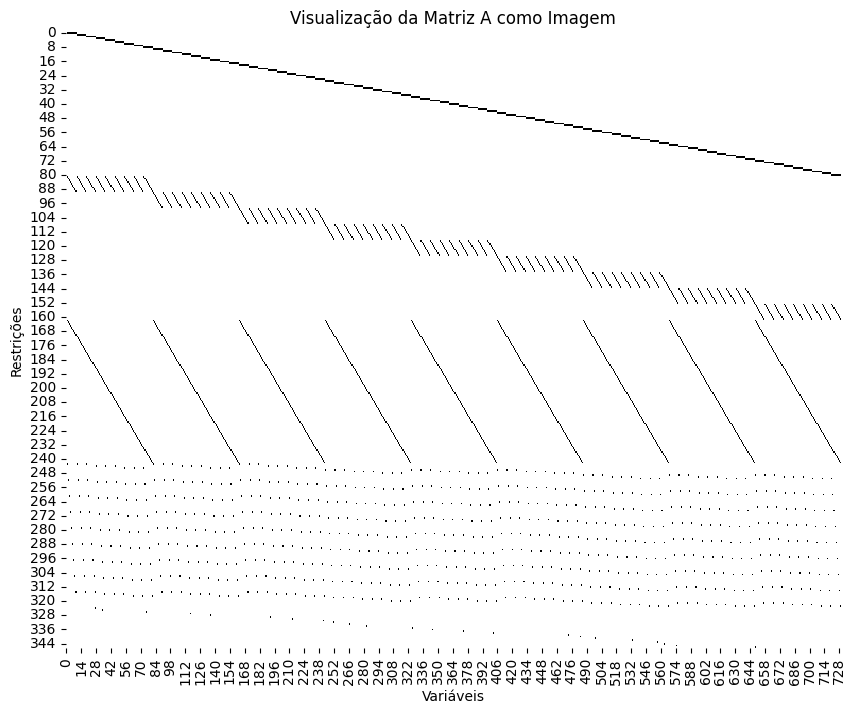

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponha que 'modelo' j√° foi definido e cont√©m seu modelo PuLP
A = extrair_matriz_A(modelo) # Use a sua fun√ß√£o aqui


plt.figure(figsize=(10, 8)) # Ajuste o tamanho da figura conforme necess√°rio

# Crie o heatmap
# cbar=False remove a barra de cores, j√° que os valores s√£o apenas 0s e 1s
# cmap='binary' usa um mapa de cores em preto e branco
# linewidths=0 remove as linhas entre as c√©lulas para matrizes grandes
sns.heatmap(A, cbar=False, cmap='binary', linewidths=0)

plt.title("Visualiza√ß√£o da Matriz A como Imagem")
plt.xlabel("Vari√°veis")
plt.ylabel("Restri√ß√µes")
plt.show()

Dimens√µes da matriz A: (347, 730)


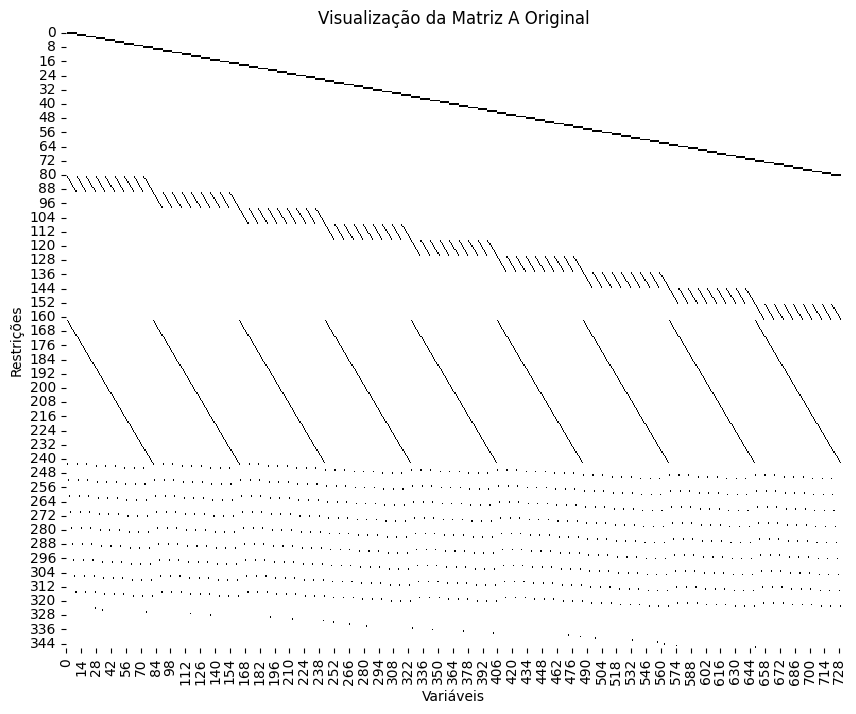


Aplicando Elimina√ß√£o Gaussiana (obtendo a forma escalonada via LU)...
Decomposi√ß√£o LU realizada. Matriz U obtida (forma escalonada de linhas).
Dimens√µes da Matriz U: (347, 730)


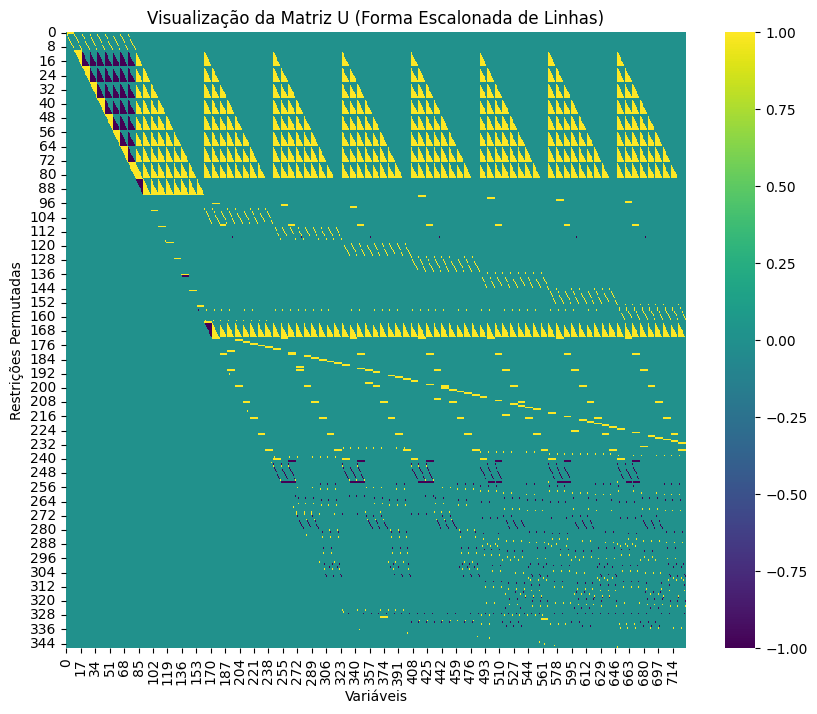


An√°lise da Matriz U:
N√∫mero de elementos n√£o nulos em U: 17535
Porcentagem de n√£o zeros em U: 6.9223%

N√∫mero de piv√¥s (linhas com elemento l√≠der): 346
Valores dos piv√¥s (primeiros 10): [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
√çndices dos piv√¥s (primeiros 10): [(0, np.int64(1)), (1, np.int64(1)), (2, np.int64(2)), (3, np.int64(3)), (4, np.int64(4)), (5, np.int64(5)), (6, np.int64(6)), (7, np.int64(7)), (8, np.int64(8)), (9, np.int64(9))]
Posto (rank) da matriz A original: 272
Aviso: Inconsist√™ncia no n√∫mero de piv√¥s e posto calculado.

Note: Para matrizes n√£o quadradas, n√£o √© poss√≠vel ter uma 'diagonal principal' com tudo zerado fora dela.
O objetivo da elimina√ß√£o Gaussiana √© obter a forma escalonada de linhas (matriz U).

Verifica√ß√£o da soma das colunas na matriz U:
Soma das colunas de U (primeiros 20 valores): [ 0.  2.  2.  2.  2.  2

In [ ]:
# Install SciPy if you haven't already
!pip install scipy
!pip install matplotlib seaborn numpy pulp

import numpy as np
from scipy.linalg import lu
import pulp
import matplotlib.pyplot as plt
import seaborn as sns

# A fun√ß√£o extrair_matriz_A (use a vers√£o robusta)
def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)
    var_to_index = {v: i for i, v in enumerate(variaveis)}
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)
    A = np.zeros((num_restricoes, num_variaveis), dtype=float)

    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

# Extrair a matriz A do seu modelo (assumindo 'modelo' foi criado)
A = extrair_matriz_A(modelo)

print(f"Dimens√µes da matriz A: {A.shape}")

# --- Visualiza√ß√£o da Matriz A Original ---
plt.figure(figsize=(10, 8))
sns.heatmap(A, cbar=False, cmap='binary', linewidths=0)
plt.title("Visualiza√ß√£o da Matriz A Original")
plt.xlabel("Vari√°veis")
plt.ylabel("Restri√ß√µes")
plt.show()


# --- Aplicar Elimina√ß√£o Gaussiana (via LU decomposition para obter U) ---
# P @ A = L @ U
# U √© a matriz em forma escalonada de linhas (row echelon form)
# Note: LU decomposition works best for square matrices.
# For non-square matrices, lu(A) decomposes A into P @ A = L @ U where U
# has the same shape as A and is upper trapezoidal.

print("\nAplicando Elimina√ß√£o Gaussiana (obtendo a forma escalonada via LU)...")
try:
    # LU decomposition will provide U which is in row echelon form
    P, L, U = lu(A)

    print("Decomposi√ß√£o LU realizada. Matriz U obtida (forma escalonada de linhas).")
    print("Dimens√µes da Matriz U:", U.shape)

    # --- Visualiza√ß√£o da Matriz U (Forma Escalonada) ---
    plt.figure(figsize=(10, 8))
    # Use 'viridis' or 'plasma' for better visualization of non-zero values in U
    # after elimination, as they won't strictly be 0/1 anymore due to floating point ops.
    # Or use binary if you only care about zero/non-zero pattern.
    sns.heatmap(U, cmap='viridis', linewidths=0)
    plt.title("Visualiza√ß√£o da Matriz U (Forma Escalonada de Linhas)")
    plt.xlabel("Vari√°veis")
    plt.ylabel("Restri√ß√µes Permutadas") # Rows are permuted according to P
    plt.show()

    # --- An√°lise da Matriz U ---

    print("\nAn√°lise da Matriz U:")

    # Contar elementos n√£o nulos (sparsity)
    nnz_U = np.count_nonzero(U)
    print(f"N√∫mero de elementos n√£o nulos em U: {nnz_U}")
    print(f"Porcentagem de n√£o zeros em U: {(nnz_U / U.size) * 100:.4f}%")
    # Note: U might be denser than A in some cases, or sparser depending on the matrix.

    # Analisar os piv√¥s ('diagonal principal' na forma escalonada)
    # Os piv√¥s s√£o os primeiros elementos n√£o nulos em cada linha n√£o nula de U.
    # A SciPy's LU gives U where the first non-zero in each row is the pivot.
    pivots = []
    pivot_indices = []
    for i in range(U.shape[0]):
        # Find the index of the first non-zero element in row i
        non_zero_indices = np.where(np.abs(U[i, :]) > 1e-9)[0] # Use tolerance for float comparison
        if non_zero_indices.size > 0:
            first_nnz_col = non_zero_indices[0]
            pivots.append(U[i, first_nnz_col])
            pivot_indices.append((i, first_nnz_col))

    print(f"\nN√∫mero de piv√¥s (linhas com elemento l√≠der): {len(pivots)}")
    print(f"Valores dos piv√¥s (primeiros 10): {pivots[:10]}")
    print(f"√çndices dos piv√¥s (primeiros 10): {pivot_indices[:10]}")

    # O n√∫mero de piv√¥s √© igual ao posto (rank) da matriz A.
    rank_A = np.linalg.matrix_rank(A, tol=1e-9) # Calculate rank of original A for comparison
    print(f"Posto (rank) da matriz A original: {rank_A}")
    if len(pivots) == rank_A:
        print("N√∫mero de piv√¥s em U √© consistente com o posto de A.")
    else:
        print("Aviso: Inconsist√™ncia no n√∫mero de piv√¥s e posto calculado.")


    # O objetivo de zerar tudo fora da diagonal principal s√≥ √© ating√≠vel para matrizes quadradas invert√≠veis
    # levadas √† forma reduzida escalonada (Identidade). Para matrizes n√£o quadradas, obtemos a forma escalonada.
    print("\nNote: Para matrizes n√£o quadradas, n√£o √© poss√≠vel ter uma 'diagonal principal' com tudo zerado fora dela.")
    print("O objetivo da elimina√ß√£o Gaussiana √© obter a forma escalonada de linhas (matriz U).")


    # --- Verificar a soma das colunas na matriz U ---
    print("\nVerifica√ß√£o da soma das colunas na matriz U:")
    column_sums_U = np.sum(U, axis=0)

    print(f"Soma das colunas de U (primeiros 20 valores): {column_sums_U[:20]}")
    print(f"Soma das colunas de U (√∫ltimos 20 valores): {column_sums_U[-20:]}")

    # Verificar se a soma das colunas passa de 2
    # Como U cont√©m floats, compare com uma toler√¢ncia
    columns_sum_greater_than_2 = np.sum(column_sums_U > 2.0 + 1e-9)
    print(f"\nN√∫mero de colunas em U cuja soma √© estritamente maior que 2: {columns_sum_greater_than_2}")
    print(f"Colunas cuja soma √© maior que 2: {np.where(column_sums_U > 2.0 + 1e-9)[0]}")

    # O que a soma das colunas na matriz U significa?
    # A interpreta√ß√£o n√£o √© t√£o direta quanto na matriz A original (onde cada 1 representava participa√ß√£o em uma restri√ß√£o).
    # Em U, os valores s√£o resultados das opera√ß√µes de elimina√ß√£o. A soma das colunas em U reflete a
    # combina√ß√£o linear das restri√ß√µes originais que foram aplicadas para chegar a U.
    # √â mais comum analisar a esparsidade, a localiza√ß√£o dos piv√¥s e o posto da matriz escalonada.

except ValueError as e:
    print(f"\nErro ao realizar a decomposi√ß√£o LU: {e}")
    print("Certifique-se de que a matriz A √© adequada para decomposi√ß√£o (LU em SciPy espera que as dimens√µes permitam a decomposi√ß√£o).")
    # Note: scipy.linalg.lu handles non-square matrices by returning an upper trapezoidal U.
    # This ValueError might occur for other reasons, e.g., matrix being all zeros or inf/NaN.

In [ ]:
import numpy as np
import pulp # Para usar o objeto modelo e extrair a matriz

# A fun√ß√£o extrair_matriz_A deve estar definida em uma c√©lula anterior
# (usaremos a vers√£o de ipython-input-50-a70b5b411f26 ou equivalente)

def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)
    var_to_index = {v: i for i, v in enumerate(variaveis)}
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)
    A = np.zeros((num_restricoes, num_variaveis), dtype=float) # Use float para compatibilidade geral

    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

# Extrair a matriz A do seu modelo (assumindo 'modelo' foi criado em uma c√©lula anterior)
A = extrair_matriz_A(modelo)

print("Matriz A extra√≠da. Dimens√µes:", A.shape)

# --- Calcular a soma das colunas de A original ---
# np.sum(A, axis=0) soma os elementos ao longo do eixo 0 (linhas), resultando
# na soma de cada coluna.
column_sums_A = np.sum(A, axis=0)

print("\nSoma das colunas da matriz A original:")
# Mostra os primeiros e √∫ltimos valores, pois a matriz √© grande
print(f"Primeiros 20 valores: {column_sums_A[:30]}")
print(f"√öltimos 20 valores: {column_sums_A[-20:]}")

# --- Verificar quais colunas t√™m soma maior que 2 ---
# np.where(condition) retorna os √≠ndices onde a condi√ß√£o √© verdadeira
indices_maiores_que_2 = np.where(column_sums_A > 4)[0]

print(f"\nN√∫mero de colunas cuja soma √© estritamente maior que 2: {len(indices_maiores_que_2)}")

if len(indices_maiores_que_2) > 0:
    print("√çndices das colunas cuja soma √© maior que 2:")
    # Mostra apenas os primeiros 50 √≠ndices, se houver muitos
    print(indices_maiores_que_2[:50])
    if len(indices_maiores_que_2) > 50:
        print("...")

    # Opcional: Mostrar as somas para essas colunas
    # print("\nSomas das colunas maiores que 2:")
    # print(column_sums_A[indices_maiores_que_2])

    # --- Interpreta√ß√£o para o Sudoku ---
    print("\nInterpreta√ß√£o para o modelo de Sudoku:")
    print("Cada coluna da matriz A representa uma vari√°vel de decis√£o x[i][j][k].")
    print("A soma de uma coluna √© o n√∫mero de restri√ß√µes em que essa vari√°vel participa.")
    print("Vari√°veis x[i][j][k] participam tipicamente de 4 restri√ß√µes:")
    print("1. Restri√ß√£o da c√©lula (i,j)")
    print("2. Restri√ß√£o da linha i para o valor k")
    print("3. Restri√ß√£o da coluna j para o valor k")
    print("4. Restri√ß√£o do bloco 3x3 que cont√©m (i,j) para o valor k")
    print("Portanto, para a maioria das vari√°veis (que n√£o s√£o fixadas nos valores iniciais),")
    print("esperamos que a soma da coluna seja exatamente 4.")
    print("As colunas com soma > 2 (especificamente 4) s√£o as vari√°veis que participam de todas as suas restri√ß√µes relevantes.")
    print("Colunas com soma menor que 4 (mas > 0) correspondem √†s vari√°veis que foram fixadas pelos valores iniciais.")
    print("Se A √© extra√≠da *antes* de adicionar as restri√ß√µes de valores iniciais, todas as colunas das vari√°veis x[i][j][k] onde valores_iniciais[i-1][j-1] == 0 teriam soma 4.")
    print("As colunas correspondentes √†s vari√°veis x[i][j][valor] onde valores_iniciais[i-1][j-1] == valor seriam fixadas e n√£o apareceriam nas outras restri√ß√µes (ou teriam comportamento diferente dependendo de como a restri√ß√£o √© adicionada).")
    print("No seu c√≥digo, as restri√ß√µes de valor inicial (tipo 'Valor_Inicial_i_j') fixam a vari√°vel x[i][j][valor] como 1. Isso significa que essa vari√°vel s√≥ aparece nessa restri√ß√£o com coeficiente 1.")
    print("Portanto, as colunas com soma 1 correspondem √†s vari√°veis fixadas pelos valores iniciais.")
    print("As colunas com soma 4 correspondem √†s vari√°veis que *n√£o* foram fixadas pelos valores iniciais e participam das 4 restri√ß√µes (c√©lula, linha, coluna, bloco).")
    print("Colunas com soma 0 corresponderiam a vari√°veis que n√£o aparecem em nenhuma restri√ß√£o (improv√°vel aqui).")
    print(f"\nVerificando as somas comuns: Somas 1: {np.sum(column_sums_A == 1)}, Somas 4: {np.sum(column_sums_A == 4)}")

else:
    print("Nenhuma coluna tem soma estritamente maior que 2.")

Matriz A extra√≠da. Dimens√µes: (347, 730)

Soma das colunas da matriz A original:
Primeiros 20 valores: [0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4.]
√öltimos 20 valores: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]

N√∫mero de colunas cuja soma √© estritamente maior que 2: 23
√çndices das colunas cuja soma √© maior que 2:
[ 27  34  75 117 136 192 213 242 252 267 283 326 345 374 402 473 484 498
 533 557 563 575 649]

Interpreta√ß√£o para o modelo de Sudoku:
Cada coluna da matriz A representa uma vari√°vel de decis√£o x[i][j][k].
A soma de uma coluna √© o n√∫mero de restri√ß√µes em que essa vari√°vel participa.
Vari√°veis x[i][j][k] participam tipicamente de 4 restri√ß√µes:
1. Restri√ß√£o da c√©lula (i,j)
2. Restri√ß√£o da linha i para o valor k
3. Restri√ß√£o da coluna j para o valor k
4. Restri√ß√£o do bloco 3x3 que cont√©m (i,j) para o valor k
Portanto, para a maioria das vari√°veis (que n√£o s√£o fixadas nos valores in

In [ ]:
# Install SciPy if you haven't already
!pip install scipy

import numpy as np
from scipy.linalg import lu
import pulp
import re # Assuming re is still needed for data loading if applicable, though not directly for LU

# Assume 'modelo' is already defined and the correct extrair_matriz_A function is available
# (The one from ipython-input-50-a70b5b411f26 is recommended)

def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    # Obtem a lista de vari√°veis com ordem fixa
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)

    # Criar um mapeamento de vari√°veis para √≠ndices de coluna
    var_to_index = {v: i for i, v in enumerate(variaveis)}

    # Obtem a lista de restri√ß√µes
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)

    # Inicializa a matriz A com zeros
    # Usamos dtype=float para evitar erros se coeficientes n√£o forem inteiros, embora para o Sudoku sejam.
    A = np.zeros((num_restricoes, num_variaveis), dtype=float)

    # Preenche a matriz A com os coeficientes
    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

# Extrair a matriz A do seu modelo (assumindo 'modelo' foi criado em uma c√©lula anterior)
A = extrair_matriz_A(modelo)

print("Matriz A extra√≠da. Dimens√µes:", A.shape)

# Realizar a decomposi√ß√£o LU
try:
    P, L, U = lu(A)

    print("\nDecomposi√ß√£o LU realizada com sucesso.")
    print("\nMatriz de Permuta√ß√£o P (formato esparso):")
    # P √© uma matriz de permuta√ß√µes. Para visualiz√°-la como matriz densa:
    # print(P)

    print("\nMatriz Triangular Inferior L:")
    # print(L) # Imprimir L inteira pode ser longo

    print("\nMatriz Triangular Superior U:")
    # print(U) # Imprimir U inteira pode ser longo

    # Opcional: Verificar se P @ A - L @ U est√° pr√≥ximo de zero
    # Para matrizes grandes, a diferen√ßa pode n√£o ser exatamente zero devido √† precis√£o num√©rica
    reconstruction_diff = np.linalg.norm(P @ A - L @ U)
    print(f"\nNorma da diferen√ßa (P @ A - L @ U): {reconstruction_diff:.4e}")

    # Verificar se P √© uma matriz de permuta√ß√µes (aproximadamente)
    is_permutation = np.allclose(np.sort(np.sum(P, axis=1)), 1) and np.allclose(np.sort(np.sum(P, axis=0)), 1)
    print(f"Verifica√ß√£o: P √© aproximadamente uma matriz de permuta√ß√µes? {is_permutation}")

    # Verificar se L √© triangular inferior (aproximadamente, exceto diagonal)
    is_lower_triangular = np.allclose(np.triu(L, k=1), 0)
    print(f"Verifica√ß√£o: L √© aproximadamente triangular inferior (acima da diagonal)? {is_lower_triangular}")
    is_unit_diagonal = np.allclose(np.diag(L), 1)
    print(f"Verifica√ß√£o: L tem diagonal unit√°ria? {is_unit_diagonal}")


    # Verificar se U √© triangular superior (aproximadamente, exceto diagonal)
    is_upper_triangular = np.allclose(np.tril(U, k=-1), 0)
    print(f"Verifica√ß√£o: U √© aproximadamente triangular superior (abaixo da diagonal)? {is_upper_triangular}")


except ValueError as e:
    print(f"\nErro ao realizar a decomposi√ß√£o LU: {e}")
    print("A decomposi√ß√£o LU s√≥ pode ser aplicada a matrizes quadradas.")
    print(f"As dimens√µes da matriz A s√£o: {A.shape}")

In [ ]:
import numpy as np
import pulp # Para usar o objeto modelo e extrair a matriz

# A fun√ß√£o extrair_matriz_A deve estar definida em uma c√©lula anterior
# (usaremos a vers√£o de ipython-input-50-a70b5b411f26 ou equivalente)

def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    # Obtem a lista de vari√°veis com ordem fixa
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)

    # Criar um mapeamento de vari√°veis para √≠ndices de coluna
    var_to_index = {v: i for i, v in enumerate(variaveis)}

    # Obtem a lista de restri√ß√µes
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)

    # Inicializa a matriz A com zeros
    A = np.zeros((num_restricoes, num_variaveis), dtype=float)

    # Preenche a matriz A com os coeficientes
    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

# Extrair a matriz A do seu modelo (assumindo 'modelo' foi criado em uma c√©lula anterior)
A = extrair_matriz_A(modelo)

print("Matriz A extra√≠da. Dimens√µes:", A.shape)

# Calcular a transposta de A
A_T = A.T
print("Matriz A Transposta (A^T) criada. Dimens√µes:", A_T.shape)

# Calcular A^T * A
# Usamos o operador @ para multiplica√ß√£o de matrizes no NumPy
ATA = A_T @ A
print("Matriz A^T * A calculada. Dimens√µes:", ATA.shape)

# Verificar se a matriz resultante √© quadrada (deve ser)
if ATA.shape[0] == ATA.shape[1]:
    print("A matriz A^T * A √© quadrada. Calculando o determinante...")
    try:
        determinante_ATA = np.linalg.det(ATA)
        print(f"\nO determinante da matriz A^T * A √©: {determinante_ATA}")

        # Interpreta√ß√£o comum do determinante de ATA
        # Um determinante pr√≥ximo de zero indica que as colunas de A s√£o linearmente dependentes.
        # Para a matriz de restri√ß√µes de um modelo LP/IP, isso pode indicar redund√¢ncia entre as vari√°veis.
        # Em sistemas lineares A x = b, det(A^T A) = 0 implica que o sistema A x = b pode n√£o ter solu√ß√£o √∫nica no sentido de m√≠nimos quadrados.

        if np.isclose(determinante_ATA, 0):
            print("O determinante de A^T * A √© zero (ou muito pr√≥ximo de zero).")
            print("Isso indica que as colunas da matriz A s√£o linearmente dependentes.")
            print("No contexto de um modelo de otimiza√ß√£o, isso pode sugerir que existem vari√°veis redundantes ou que a base das vari√°veis n√£o √© √∫nica.")
        else:
            print("O determinante de A^T * A √© diferente de zero.")
            print("Isso indica que as colunas da matriz A s√£o linearmente independentes.")
            print("O rank de A √© igual ao n√∫mero de colunas (vari√°veis).")


    except np.linalg.LinAlgError:
        print("\nErro ao calcular o determinante de A^T * A.")
        print("A matriz A^T * A pode ser singular (apesar de ter colunas independentes) ou numericamente inst√°vel (mal condicionada).")
        # Para matrizes grandes e esparsas como a de Sudoku, problemas de precis√£o podem ocorrer.
        # Para verificar singularidade de forma mais robusta, pode-se olhar os valores singulares (SVD).
else:
    # Este bloco n√£o deve ser atingido para A^T * A
    print("\nErro inesperado: A matriz A^T * A n√£o √© quadrada.")

In [ ]:
import numpy as np
import pulp # Para usar o objeto modelo e extrair a matriz

# A fun√ß√£o extrair_matriz_A deve estar definida em uma c√©lula anterior
# (usaremos a vers√£o de ipython-input-50-a70b5b411f26 ou equivalente)

def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    # Obtem a lista de vari√°veis com ordem fixa
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)

    # Criar um mapeamento de vari√°veis para √≠ndices de coluna
    var_to_index = {v: i for i, v in enumerate(variaveis)}

    # Obtem a lista de restri√ß√µes
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)

    # Inicializa a matriz A com zeros
    A = np.zeros((num_restricoes, num_variaveis), dtype=float)

    # Preenche a matriz A com os coeficientes
    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

# Extrair a matriz A do seu modelo (assumindo 'modelo' foi criado em uma c√©lula anterior)
A = extrair_matriz_A(modelo)

print("Matriz A extra√≠da. Dimens√µes:", A.shape)

# Realizar a Decomposi√ß√£o em Valores Singulares (SVD)
# full_matrices=False economiza computa√ß√£o para matrizes n√£o quadradas
U, S, Vt = np.linalg.svd(A, full_matrices=False)

print("\nDecomposi√ß√£o SVD realizada com sucesso.")
print("Dimens√µes de U:", U.shape)    # Vetores colunas de A
print("Dimens√µes de S:", S.shape)    # Valores singulares (em ordem decrescente)
print("Dimens√µes de Vt:", Vt.shape) # Vetores linhas de A

# Determinar o posto da matriz (n√∫mero de valores singulares n√£o nulos)
# √â importante usar uma toler√¢ncia num√©rica para considerar valores pr√≥ximos de zero como zero
tolerancia = S[0] * 1e-9 # Uma toler√¢ncia comum √© uma fra√ß√£o do maior valor singular
rank = np.sum(S > tolerancia)

print(f"\nValores Singulares (primeiros 10): {S[:10]}") # Mostrar alguns dos maiores
print(f"Valores Singulares (√∫ltimos 10): {S[-10:]}")  # Mostrar alguns dos menores (pr√≥ximos de zero)
print(f"Toler√¢ncia usada para o posto: {tolerancia:.2e}")
print(f"O posto (rank) da matriz A √©: {rank}")

# A base ortogonal para o espa√ßo das colunas s√£o as primeiras 'rank' colunas de U
base_espaco_colunas = U[:, :rank]
print(f"\nBase ortogonal para o espa√ßo das colunas (primeiros 5 vetores de {rank}):\n{base_espaco_colunas[:, :5]}")
print(f"Formato da base do espa√ßo das colunas: {base_espaco_colunas.shape}")

# A base ortogonal para o espa√ßo das linhas s√£o as primeiras 'rank' linhas de Vt (ou colunas de V)
base_espaco_linhas = Vt[:rank, :]
print(f"\nBase ortogonal para o espa√ßo das linhas (primeiros 5 vetores de {rank}):\n{base_espaco_linhas[:5, :]}")
print(f"Formato da base do espa√ßo das linhas: {base_espaco_linhas.shape}")


# Opcional: Base para o Espa√ßo Nulo (Null Space)
# O espa√ßo nulo s√£o os vetores x tais que Ax = 0.
# Uma base ortogonal para o espa√ßo nulo s√£o as √∫ltimas colunas de V (ou linhas de Vt)
# correspondentes aos valores singulares que s√£o zero (ou muito pr√≥ximos de zero).
null_space_dim = A.shape[1] - rank
print(f"\nDimens√£o do espa√ßo nulo: {null_space_dim}")
if null_space_dim > 0:
    base_espaco_nulo = Vt[rank:, :].T # As colunas correspondentes aos valores singulares ~ 0
    print(f"Base ortogonal para o espa√ßo nulo (primeiros 5 vetores de {null_space_dim}):\n{base_espaco_nulo[:, :5]}")
    print(f"Formato da base do espa√ßo nulo: {base_espaco_nulo.shape}")
else:
    print("O espa√ßo nulo cont√©m apenas o vetor zero (A tem posto completo em coluna).")

In [ ]:
import numpy as np
import pulp # Para usar o objeto modelo e extrair a matriz
import networkx as nx # Para o teste de biparti√ß√£o
import matplotlib.pyplot as plt # Para visualiza√ß√£o (opcional)
import seaborn as sns # Para visualiza√ß√£o (opcional)


# A fun√ß√£o extrair_matriz_A (use a vers√£o robusta)
def extrair_matriz_A(modelo):
    """
    Extrai a matriz A de coeficientes do modelo PuLP.
    Retorna uma matriz NumPy densa.
    """
    variaveis = modelo.variables()
    num_variaveis = len(variaveis)
    var_to_index = {v: i for i, v in enumerate(variaveis)}
    restricoes = list(modelo.constraints.values())
    num_restricoes = len(restricoes)
    A = np.zeros((num_restricoes, num_variaveis), dtype=float)

    for i, restricao in enumerate(restricoes):
        for var, coef in restricao.items():
            if var in var_to_index:
                j = var_to_index[var]
                A[i, j] = coef

    return A

def construir_grafo_de_incidencia(A):
    """
    Cria o grafo de incid√™ncia bipartido da matriz A.
    Um conjunto de n√≥s representa as restri√ß√µes, o outro as vari√°veis.
    Uma aresta existe se o coeficiente A[i,j] for n√£o zero.
    """
    G = nx.Graph()
    num_linhas, num_colunas = A.shape

    restricoes_nodes = [f"r{i}" for i in range(num_linhas)]
    variaveis_nodes = [f"x{j}" for j in range(num_colunas)]

    G.add_nodes_from(restricoes_nodes, bipartite=0) # Lado das restri√ß√µes
    G.add_nodes_from(variaveis_nodes, bipartite=1) # Lado das vari√°veis

    # Adiciona arestas para coeficientes n√£o zero
    # Usamos A != 0 para considerar coeficientes -1 tamb√©m
    linhas_nz, colunas_nz = np.where(A != 0)
    for i, j in zip(linhas_nz, colunas_nz):
         G.add_edge(f"r{i}", f"x{j}")

    return G


# --- Verifica√ß√µes Computacionais Parciais ---

# 1. Extrair a matriz A
A = extrair_matriz_A(modelo)
print(f"Dimens√µes da matriz A: {A.shape}")

# 2. Verificar se todos os elementos s√£o 0, +1 ou -1
# Para a matriz do Sudoku, esperamos apenas 0s e 1s
valores_unicos = np.unique(A)
is_zero_one_minus_one = np.all(np.isin(valores_unicos, [0, 1, -1]))

print(f"\nVerifica√ß√£o 1: Todos os elementos de A s√£o 0, +1 ou -1? {is_zero_one_minus_one}")
if not is_zero_one_minus_one:
    print(f"   Elementos encontrados: {valores_unicos}")
    print("   -> A matriz N√ÉO pode ser Totalmente Unimodular se esta condi√ß√£o n√£o for atendida.")
else:
    print("   -> Condi√ß√£o necess√°ria (elementos 0, +1, -1) atendida.")


# 3. Teste de Biparti√ß√£o do Grafo de Incid√™ncia
print("\nVerifica√ß√£o 2: Teste de Biparti√ß√£o do Grafo de Incid√™ncia...")
try:
    G_incidencia = construir_grafo_de_incidencia(A)
    is_bipartido = nx.is_bipartite(G_incidencia)

    print(f"O grafo de incid√™ncia da matriz A √© bipartido? {is_bipartido}")
    if is_bipartido:
        print("   -> Um grafo de incid√™ncia bipartido √© uma FORTE indica√ß√£o de TU para certas classes de matrizes (como a do Sudoku).")
        print("   -> Para matrizes de incid√™ncia de grafos com no m√°ximo dois n√£o-zeros por coluna, biparti√ß√£o IMPLICA TU.")
        # Podemos contar os n√£o-zeros por coluna para ver se se enquadra nessa classe restrita
        col_nnz = np.sum(A != 0, axis=0)
        max_col_nnz = np.max(col_nnz) if col_nnz.size > 0 else 0
        print(f"   N√∫mero m√°ximo de n√£o-zeros por coluna: {max_col_nnz}")
        if max_col_nnz <= 2 and is_zero_one_minus_one:
             print("   -> A matriz pode se enquadrar em uma classe onde biparti√ß√£o IMPLICA TU (e.g., matriz de incid√™ncia de grafo).")
        else:
             print("   -> A matriz do Sudoku tem mais de 2 n√£o-zeros por coluna, ent√£o a biparti√ß√£o por si s√≥ n√£o PROVA TU, mas √© consistente com ela.")

    else:
         print("   -> O grafo de incid√™ncia N√ÉO √© bipartido. Isso geralmente indica que a matriz N√ÉO √© TU.")

except Exception as e:
    print(f"Erro ao construir ou verificar o grafo de incid√™ncia: {e}")
    print("   -> N√£o foi poss√≠vel realizar o teste de biparti√ß√£o.")


# 4. An√°lise Te√≥rica / Conhecimento Conhecido
print("\nAn√°lise Te√≥rica:")
print("O problema do Sudoku pode ser formulado como um problema de cobertura exata ou parti√ß√£o, que s√£o conhecidos por ter matrizes de restri√ß√µes Totalmente Unimodulares (TU).")
print("Portanto, a matriz de restri√ß√µes do modelo PuLP para o Sudoku √â teoricamente TU.")
print("A TU da matriz de restri√ß√µes + vetor b inteiro garante que a solu√ß√£o √≥tima de um LP relaxado ser√° inteira, se uma solu√ß√£o √≥tima existir.")

# 5. Nota sobre o Determinante de A^T * A
# (Reiterando a conclus√£o anterior no contexto TU)
print("\nNota sobre o determinante de A^T * A:")
# ATA = A.T @ A # J√° calculamos isso antes, se desejar pode calcular novamente
# determinante_ATA = np.linalg.det(ATA) # E calcular o determinante
# print(f"Determinante de A^T * A: {determinante_ATA}")
# print("Um determinante de A^T * A igual a zero indica colunas linearmente dependentes em A.")
# print("Para uma matriz TU (que n√£o √© necessariamente quadrada), colunas linearmente dependentes s√£o comuns.")


# 6. Verifica√ß√£o computacional (INTRAVEL) da defini√ß√£o de TU
print("\nVerifica√ß√£o Direta da Defini√ß√£o de TU (INTRAVEL para matrizes grandes):")
print("Verificar se o determinante de *cada* submatriz quadrada √© 0, +1 ou -1 √© computacionalmente proibitivo para matrizes grandes.")
print(f"A matriz A ({A.shape[0]}x{A.shape[1]}) teria submatrizes de tamanhos at√© min({A.shape}).")
print("O n√∫mero de submatrizes √© enorme, tornando esta abordagem invi√°vel na pr√°tica.")

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Par√¢metros
Ln = 200
n = 15

# Fun√ß√£o objetivo: minimizar t (a √∫ltima vari√°vel do vetor)
def objective(z):
    return z[-1]  # t est√° no final do vetor z = [x0, x1, ..., x9, t]

# Restri√ß√µes
def constraint_1_i(i):
    # i * x_i <= t * x_i  ‚áî i - t <= 0 (quando x_i > 0)
    return lambda z: z[-1] * z[i] - i * z[i]

def constraint_sum_x():
    return lambda z: np.sum(z[:-1]) - (n - 1)

def constraint_quadratic(j):
    return lambda z: 1 - (
        z[j - 1] + sum(z[i - 1] * z[i + j - 1] for i in range(1, Ln - j))
    )

# Lista de restri√ß√µes
constraints = []

# 1. i * x_i <= t * x_i  para i = 1 a 10
for i in range(Ln):
    constraints.append({
        'type': 'ineq',
        'fun': constraint_1_i(i)
    })

# 2. Soma dos x_i
constraints.append({
    'type': 'eq',
    'fun': constraint_sum_x()
})

# 3. Restri√ß√µes quadr√°ticas
for j in range(1, Ln):
    constraints.append({
        'type': 'ineq',
        'fun': constraint_quadratic(j)
    })

# Limites para as vari√°veis x_i ‚àà [0, 1], t ‚àà [0, ‚àû)
bounds = [(0, 1)] * Ln + [(0, None)]

# Chute inicial
z0 = np.ones(Ln + 1) * 0.1

# Resolver
result = minimize(objective, z0, method='SLSQP', bounds=bounds, constraints=constraints)

# Resultados
if result.success:
    x_opt = result.x[:-1]
    t_opt = result.x[-1]
    print("Valor √≥timo de t:", t_opt)
    print("Vetor x:", x_opt)
else:
    print("Otimiza√ß√£o falhou:", result.message)


In [ ]:
def golomb_ruler_bt(n):
    best_ruler = None
    best_length = 10**9  # usar um inteiro, n√£o float

    def backtrack(ruler, distances, last_value):
        nonlocal best_ruler, best_length

        if len(ruler) == n:
            if ruler[-1] < best_length:
                best_ruler = ruler[:]
                best_length = ruler[-1]
            return

        for next_value in range(last_value + 1, best_length):
            new_distances = [abs(next_value - mark) for mark in ruler]

            if any(d in distances for d in new_distances):
                continue

            ruler.append(next_value)
            for d in new_distances:
                distances.add(d)

            backtrack(ruler, distances, next_value)

            ruler.pop()
            for d in new_distances:
                distances.remove(d)

    backtrack([0], set(), 0)
    return best_ruler


In [ ]:
for n in range(3, 5):  # At√© n = 9 para testar rapidamente
    ruler = golomb_ruler_bt(n)
    print(f"n = {n} ‚Üí r√©gua = {ruler}, comprimento = {ruler[-1]}")


n = 3 ‚Üí r√©gua = [0, 1, 3], comprimento = 3


In [ ]:
import numpy as np

# --- 1. Defini√ß√£o da Fun√ß√£o Objetivo Regularizada F_w(x) ---
def F_w(x, w):
    x1, x2 = x
    # Penaliza fortemente pontos invi√°veis para evitar log(0) ou log(negativo)
    # A barreira logar√≠tmica exige que os argumentos sejam estritamente maiores que zero.
    if x1 <= 0 or x2 <= 0 or (x1 + x2 - 1) <= 0:
        return np.inf
    return w * (1 * x1 + 2 * x2) - np.log(x1 + x2 - 1) - np.log(x1) - np.log(x2)

# --- 2. Defini√ß√£o do Gradiente de F_w(x) ---
def grad_F_w(x, w):
    x1, x2 = x
    # Verifica a viabilidade para evitar divis√µes por zero ou resultados indefinidos
    if x1 <= 0 or x2 <= 0 or (x1 + x2 - 1) <= 0:
        # Retorna um gradiente 'infinito' ou um valor que indica inviabilidade
        # Em um contexto pr√°tico, isso n√£o deveria acontecer se o ponto de partida e alpha forem bem escolhidos
        return np.array([np.inf, np.inf])

    df_dx1 = w - 1 / (x1 + x2 - 1) - 1 / x1
    df_dx2 = 2 * w - 1 / (x1 + x2 - 1) - 1 / x2
    return np.array([df_dx1, df_dx2])

# --- 3. Defini√ß√£o da Matriz Hessiana de F_w(x) ---
def hess_F_w(x, w):
    x1, x2 = x
    # Verifica a viabilidade
    if x1 <= 0 or x2 <= 0 or (x1 + x2 - 1) <= 0:
        return np.array([[np.inf, np.inf], [np.inf, np.inf]]) # Retorna Hessiana 'infinita'

    term_common = 1 / (x1 + x2 - 1)**2
    h11 = term_common + 1 / x1**2
    h12 = term_common
    h21 = term_common
    h22 = term_common + 1 / x2**2
    return np.array([[h11, h12], [h21, h22]])

# --- 4. Fun√ß√£o para Calcular a Dire√ß√£o de Newton (delta_x) ---
def calculate_newton_direction(x_k, w):
    grad = grad_F_w(x_k, w)
    hess = hess_F_w(x_k, w)

    # Verifica se o gradiente ou a Hessiana s√£o infinitos (ponto invi√°vel)
    if np.any(np.isinf(grad)) or np.any(np.isinf(hess)):
        print(f"Erro: Ponto x_k={x_k} √© invi√°vel. N√£o √© poss√≠vel calcular a dire√ß√£o de Newton.")
        return None

    try:
        # Calcula a inversa da Hessiana e multiplica pelo gradiente
        delta_x = -np.linalg.solve(hess, grad)
        # np.linalg.solve(A, b) √© mais est√°vel e eficiente do que np.linalg.inv(A) @ b
        return delta_x
    except np.linalg.LinAlgError:
        print(f"Erro: A matriz Hessiana √© singular ou n√£o invers√≠vel em x_k={x_k}.")
        return None

# --- 5. Fun√ß√£o de Backtracking Line Search Adaptada ---
def backtracking_line_search_constrained(F_w_func, grad_F_w_func, x_k, delta_x, w, c=1e-4, beta=0.8, epsilon=1e-8):
    alpha = 1.0 # Come√ßamos com alpha = 1

    # Calcula o alpha m√°ximo para manter as restri√ß√µes estritas
    alpha_max_feasible = float('inf')

    # Restri√ß√£o 1: x1 + x2 - 1 > epsilon
    term_g1_const = x_k[0] + x_k[1] - 1
    term_g1_delta = delta_x[0] + delta_x[1]
    if term_g1_delta < 0:
        # Se o numerador for negativo ou pr√≥ximo de zero e o denominador negativo,
        # (epsilon - term_g1_const) pode ser pequeno, e (epsilon - term_g1_const) / term_g1_delta
        # pode ser um valor pequeno e positivo.
        # Precisamos de cuidado com a divis√£o por zero ou n√∫meros muito pr√≥ximos de zero.
        if abs(term_g1_delta) > 1e-10: # Evitar divis√£o por zero
            alpha_max_feasible = min(alpha_max_feasible, (epsilon - term_g1_const) / term_g1_delta)
        else: # Se term_g1_delta √© ~0, essa restri√ß√£o n√£o limita alpha para baixo.
            pass # N√£o imp√µe um limite superior √∫til.

    # Restri√ß√£o 2: x1 > epsilon
    if delta_x[0] < 0:
        if abs(delta_x[0]) > 1e-10:
            alpha_max_feasible = min(alpha_max_feasible, (epsilon - x_k[0]) / delta_x[0])
        else:
            pass

    # Restri√ß√£o 3: x2 > epsilon
    if delta_x[1] < 0:
        if abs(delta_x[1]) > 1e-10:
            alpha_max_feasible = min(alpha_max_feasible, (epsilon - x_k[1]) / delta_x[1])
        else:
            pass

    # Ajusta o alpha inicial para ser ligeiramente menor que o m√°ximo vi√°vel
    # ou 1, o que for menor. Isso garante que o primeiro teste j√° esteja no interior.
    alpha = min(alpha, alpha_max_feasible * 0.999) # Multiplicar por 0.999 para garantir que n√£o esteja exatamente na fronteira

    # Se alpha_max_feasible foi muito pequeno ou negativo (o que indica um problema), ajuste alpha.
    if alpha <= 1e-10: # N√£o podemos usar um passo muito pequeno
        # Isso geralmente significa que a dire√ß√£o de Newton est√° apontando para fora da regi√£o vi√°vel muito rapidamente
        # ou o ponto atual j√° est√° muito pr√≥ximo da fronteira.
        # Poder√≠amos considerar um passo muito pequeno como fallback ou reportar um erro.
        return 1e-8 # Retorna um passo m√≠nimo vi√°vel, mas talvez n√£o √≥timo

    # Loop principal do backtracking
    while True:
        x_next = x_k + alpha * delta_x

        # 1. Verifica as restri√ß√µes estritas para x_next
        is_strictly_feasible = True
        if (x_next[0] + x_next[1] - 1) <= epsilon:
            is_strictly_feasible = False
        if x_next[0] <= epsilon:
            is_strictly_feasible = False
        if x_next[1] <= epsilon:
            is_strictly_feasible = False

        # 2. Verifica a condi√ß√£o de Armijo (suficiente diminui√ß√£o da fun√ß√£o)
        try:
            val_F_w_next = F_w_func(x_next, w)
            val_F_w_k = F_w_func(x_k, w)
            grad_dot_delta_x = np.dot(grad_F_w_func(x_k, w), delta_x)
            armijo_satisfied = val_F_w_next <= val_F_w_k + c * alpha * grad_dot_delta_x
        except (ValueError, ZeroDivisionError) as e:
            # Se F_w_func(x_next) ou grad_F_w_func(x_k) geram erro, significa inviabilidade
            val_F_w_next = np.inf
            armijo_satisfied = False
            # print(f"Debug: Erro durante avalia√ß√£o da fun√ß√£o/gradiente no backtracking: {e}")

        # Condi√ß√£o de sa√≠da: satisfeito e estritamente vi√°vel
        if is_strictly_feasible and armijo_satisfied:
            break
        else:
            alpha *= beta # Reduz alpha
            if alpha < 1e-10: # Se alpha ficar muito pequeno, saia para evitar loop infinito
                print("Aviso: Alpha se tornou muito pequeno no backtracking. Converg√™ncia lenta ou falha.")
                break
    return alpha

# --- Par√¢metros Iniciais ---
# Ponto inicial estritamente vi√°vel
# x1 + x2 - 1 > 0, x1 > 0, x2 > 0
initial_x = np.array([1.1, 0.5])
# Peso para a fun√ß√£o objetivo original
w = 100 # Come√ßamos com um 'w' pequeno para uma barreira mais forte

# --- Loop Interativo ---
iteration = 0
x_current = initial_x

print(f"--- In√≠cio do M√©todo de Newton (Interativo) ---")
print(f"Ponto Inicial (x0): {x_current}")
print(f"Valor inicial de F_w(x0): {F_w(x_current, w):.4f}")
print(f"Par√¢metro w: {w}")
print("\nPrecione ENTER para a pr√≥xima itera√ß√£o ou 'q' para sair.")

while True:
    user_input = input(f"\nItera√ß√£o {iteration}: ")
    if user_input.lower() == 'q':
        break

    # 1. Calcular a dire√ß√£o de Newton
    delta_x = calculate_newton_direction(x_current, w)
    if delta_x is None:
        print("N√£o foi poss√≠vel calcular a dire√ß√£o de Newton. Saindo.")
        break

    print(f"  Ponto atual x_k: {x_current}")
    print(f"  Gradiente G(x_k): {grad_F_w(x_current, w)}")
    print(f"  Hessiana H(x_k): \n{hess_F_w(x_current, w)}")
    print(f"  Dire√ß√£o de Newton Delta_x: {delta_x}")

    # 2. Realizar o Backtracking Line Search
    alpha = backtracking_line_search_constrained(F_w, grad_F_w, x_current, delta_x, w)

    if alpha < 1e-9: # Se alpha for muito pequeno, pode indicar converg√™ncia ou problema
        print(f"  Alpha muito pequeno ({alpha:.2e}). Poss√≠vel converg√™ncia ou estagna√ß√£o.")
        # Se o gradiente for muito pequeno, podemos considerar converg√™ncia
        if np.linalg.norm(grad_F_w(x_current, w)) < 1e-6:
             print("  Gradiente pr√≥ximo de zero. Assumindo converg√™ncia.")
             break # Sai do loop
        # Caso contr√°rio, continua tentando
        else:
            print("  Tentando continuar com um alpha m√≠nimo para pr√≥xima itera√ß√£o.")


    print(f"  Tamanho do passo alpha: {alpha:.4f}")

    # 3. Calcular o pr√≥ximo ponto
    x_next = x_current + alpha * delta_x

    # 4. Atualizar para a pr√≥xima itera√ß√£o
    x_current = x_next
    iteration += 1

    print(f"  Pr√≥ximo ponto x_k+1: {x_current}")
    print(f"  Valor de F_w(x_k+1): {F_w(x_current, w):.4f}")
    norm_grad = np.linalg.norm(grad_F_w(x_current, w))
    print(f"  Norma do gradiente em x_k+1: {norm_grad:.6e}")

    # Opcional: Condi√ß√£o de parada baseada na norma do gradiente
    if norm_grad < 1e-5 and iteration > 1:
        print("\n--- Crit√©rio de parada atingido: Norma do gradiente √© muito pequena. ---")
        break

print("\n--- Fim da Execu√ß√£o ---")
print(f"Solu√ß√£o final aproximada: x = {x_current}")
print(f"Valor final de F_w(x): {F_w(x_current, w):.4f}")
print(f"Valor final da fun√ß√£o objetivo original (c^T x): {x_current[0] + 2*x_current[1]:.4f}")


--- In√≠cio do M√©todo de Newton (Interativo) ---
Ponto Inicial (x0): [1.1 0.5]
Valor inicial de F_w(x0): 211.1087
Par√¢metro w: 100

Precione ENTER para a pr√≥xima itera√ß√£o ou 'q' para sair.

Itera√ß√£o 0: 
  Ponto atual x_k: [1.1 0.5]
  Gradiente G(x_k): [ 97.42424242 196.33333333]
  Hessiana H(x_k): 
[[3.60422406 2.77777778]
 [2.77777778 6.77777778]]
  Dire√ß√£o de Newton Delta_x: [ -6.87802198 -26.14835165]
  Tamanho do passo alpha: 0.0181
  Pr√≥ximo ponto x_k+1: [0.97516988 0.02543013]
  Valor de F_w(x_k+1): 113.7185
  Norma do gradiente em x_k+1: 2.173820e+03

Itera√ß√£o 1: 
  Ponto atual x_k: [0.97516988 0.02543013]
  Gradiente G(x_k): [-1567.66437949 -1505.96234391]
  Hessiana H(x_k): 
[[2777686.33166009 2777685.28008704]
 [2777685.28008704 2779231.61198109]]
  Dire√ß√£o de Newton Delta_x: [ 0.04043906 -0.03987469]
  Tamanho do passo alpha: 0.5097
  Pr√≥ximo ponto x_k+1: [0.99578128 0.00510638]
  Valor de F_w(x_k+1): 112.9078
  Norma do gradiente em x_k+1: 1.521724e+03

Itera

In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
prob = pulp.LpProblem("Problema_de_Programacao_Linear", pulp.LpMaximize)

# Definindo as vari√°veis
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
x3 = pulp.LpVariable('x3', lowBound=0)
x4 = pulp.LpVariable('x4', lowBound=0)

# Fun√ß√£o objetivo
prob += 2 * x1 + 3 * x2 + 6 * x3 + 8 * x4, "Fun√ß√£o_Objetivo"

# Restri√ß√µes
prob += x1 + 2 * x2 + 3 * x3 + x4 >= 3, "Restri√ß√£o_1"
prob += -2 * x1 + x2 - x3 + 3 * x4 <= -4, "Restri√ß√£o_2"

# Resolver o problema
prob.solve()

# Mostrar o status da solu√ß√£o
print("Status:", pulp.LpStatus[prob.status])

# Mostrar os valores √≥timos das vari√°veis
for v in prob.variables():
    print(f"{v.name} = {v.varValue}")

# Mostrar o valor da fun√ß√£o objetivo
print("Valor √≥timo de z =", pulp.value(prob.objective))


Status: Unbounded
x1 = 2.6
x2 = 0.0
x3 = 0.0
x4 = 0.4
Valor √≥timo de z = 8.4


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
prob = pulp.LpProblem("Problema_Produ√ß√£o_Processos_Normal_e_Acelerado", pulp.LpMaximize)

# Defini√ß√£o das vari√°veis (todas ‚â• 0)
# x1N = pulp.LpVariable('x1N', lowBound=0, cat='Integer')
# x1A = pulp.LpVariable('x1A', lowBound=0, cat='Integer')
# x2N = pulp.LpVariable('x2N', lowBound=0, cat='Integer')
# x2A = pulp.LpVariable('x2A', lowBound=0, cat='Integer')
# x3A = pulp.LpVariable('x3A', lowBound=0, cat='Integer')
# x4N = pulp.LpVariable('x4N', lowBound=0, cat='Integer')
# x5N = pulp.LpVariable('x5N', lowBound=0, cat='Integer')
x1N = pulp.LpVariable('x1N', lowBound=0)
x1A = pulp.LpVariable('x1A', lowBound=0)
x2N = pulp.LpVariable('x2N', lowBound=0)
x2A = pulp.LpVariable('x2A', lowBound=0)
x3A = pulp.LpVariable('x3A', lowBound=0)
x4N = pulp.LpVariable('x4N', lowBound=0)
x5N = pulp.LpVariable('x5N', lowBound=0)

# Fun√ß√£o objetivo
prob += (
    550*x1N + 550*x1A +
    600*x2N + 600*x2A +
    350*x3A +
    400*x4N + 200*x5N
), "Lucro_Total"

# Restri√ß√µes
# Capacidade do Processo Normal
# prob += 12*x1N + 20*x2N + 25*x4N + 15*x5N <= 288, "Proc_Normal"

prob += 12*x1N + 20*x2N + 25*x4N + 15*x5N <= 306, "Proc_Normal"

# Capacidade do Processo Acelerado
# prob += 10*x1A + 8*x2A + 16*x3A <= 192, "Proc_Acelerado"
prob += 10*x1A + 8*x2A + 16*x3A <= 204, "Proc_Acelerado"

# M√£o de obra para Montagem Final
prob += (
    20*x1N + 20*x1A + 20*x2N + 20*x2A +
    20*x3A + 20*x4N + 20*x5N
) <= 384, "Montagem_Final"

# Resolver o problema
prob.solve()

# Mostrar os resultados
print("Status:", pulp.LpStatus[prob.status])
for var in prob.variables():
    print(f"{var.name} = {var.varValue}")
print("Valor √≥timo de Z =", pulp.value(prob.objective))


Status: Optimal
x1A = 0.0
x1N = 0.0
x2A = 19.2
x2N = 0.0
x3A = 0.0
x4N = 0.0
x5N = 0.0
Valor √≥timo de Z = 11520.0


In [ ]:
import pulp

# Cria√ß√£o do problema de minimiza√ß√£o
prob = pulp.LpProblem("Modelo_Dual", pulp.LpMinimize)

# Defini√ß√£o das vari√°veis (todas >= 0)
y1 = pulp.LpVariable("y1", lowBound=0)
y2 = pulp.LpVariable("y2", lowBound=0)
y3 = pulp.LpVariable("y3", lowBound=0)

# Fun√ß√£o objetivo
prob += 288 * y1 + 192 * y2 + 384 * y3, "FuncaoObjetivo"

# Restri√ß√µes
prob += 12 * y1 + 20 * y3 >= 550, "Restricao1"
prob += 10 * y2 + 20 * y3 >= 550, "Restricao2"
prob += 20 * y1 + 20 * y3 >= 600, "Restricao3"
prob += 8 * y2 + 20 * y3 >= 600, "Restricao4"
prob += 16 * y2 + 20 * y3 >= 350, "Restricao5"
prob += 25 * y1 + 20 * y3 >= 400, "Restricao6"
prob += 15 * y1 + 20 * y3 >= 200, "Restricao7"

# Resolver o problema
prob.solve()

# Exibir o status e as solu√ß√µes
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Valor √≥timo (W): {pulp.value(prob.objective):.2f}")
print(f"y1 = {y1.varValue:.2f}")
print(f"y2 = {y2.varValue:.2f}")
print(f"y3 = {y3.varValue:.2f}")


Status: Optimal
Valor √≥timo (W): 11520.00
y1 = 0.00
y2 = 0.00
y3 = 30.00


In [ ]:
import pulp

# Cria√ß√£o do problema de minimiza√ß√£o
prob = pulp.LpProblem("Problema_de_Minimizacao", pulp.LpMinimize)

# Definindo as vari√°veis de decis√£o (n√£o-negativas por padr√£o)
x_A = pulp.LpVariable('x_A', lowBound=0, cat='Continuous')
x_B = pulp.LpVariable('x_B', lowBound=0, cat='Continuous')
x_S = pulp.LpVariable('x_S', lowBound=0, cat='Continuous')

# Fun√ß√£o objetivo
prob += 60 * x_A + 30 * x_B + 2500 * x_S, "Custo_Total"

# Restri√ß√µes
prob += 0.60 * x_A + 0.40 * x_B + x_S == 240, "Restricao_1"
prob += x_A + 2 * x_B <= 800, "Restricao_2"

# Resolu√ß√£o do problema
prob.solve()

# Resultados
print("Status:", pulp.LpStatus[prob.status])
print("x_A =", x_A.varValue)
print("x_B =", x_B.varValue)
print("x_S =", x_S.varValue)
print("Z =", pulp.value(prob.objective))


Status: Optimal
x_A = 0.0
x_B = 0.0
x_S = 240.0
Z = 6000.0


In [ ]:
Fe_total = 0.60 * x_A.varValue + 0.40 * x_B.varValue + x_S.varValue
Si_total = 0.02 * x_A.varValue + 0.04 * x_B.varValue

print("Fe total:", Fe_total)
print("Si total:", Si_total)
print("Propor√ß√£o Fe/Si =", Fe_total / Si_total if Si_total > 0 else "infinita")


Fe total: 240.0
Si total: 16.0
Propor√ß√£o Fe/Si = 15.0


Status: Optimal
x_A = 226.66667 toneladas
x_B = 260.0 toneladas
x_S = 0.0 toneladas
Custo Total = R$ 21400.000200000002


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
prob = pulp.LpProblem("Problema_de_Maximizacao", pulp.LpMaximize)

# Vari√°vel y1 √© irrestrita em sinal (pode ser negativa)
y1 = pulp.LpVariable('y1', lowBound=None, cat='Continuous')

# Vari√°vel y2 deve ser menor ou igual a 0
y2 = pulp.LpVariable('y2', upBound=0, cat='Continuous')

# Fun√ß√£o objetivo
prob += 240 * y1 + 16 * y2, "Lucro_Total"

# Restri√ß√µes
prob += 0.60 * y1 + 0.02 * y2 <= 60, "Restricao_1"
prob += 0.40 * y1 + 0.04 * y2 <= 30, "Restricao_2"
prob += y1 <= 2500, "Restricao_3"

# Resolu√ß√£o do problema
prob.solve()

# Resultados
print("Status:", pulp.LpStatus[prob.status])
print("y1 =", y1.varValue)
print("y2 =", y2.varValue)
print("W =", pulp.value(prob.objective))


Status: Optimal
y1 = 112.5
y2 = -375.0
W = 21000.0


In [ ]:
import pulp

# Cria√ß√£o do problema de minimiza√ß√£o
prob = pulp.LpProblem("Problema_de_Minimizacao", pulp.LpMinimize)

# Definindo as vari√°veis de decis√£o (n√£o-negativas por padr√£o)
x_A = pulp.LpVariable('x_A', lowBound=0, cat='Continuous')
x_B = pulp.LpVariable('x_B', lowBound=0, cat='Continuous')
x_C = pulp.LpVariable('x_C', lowBound=0, cat='Continuous')
x_S = pulp.LpVariable('x_S', lowBound=0, cat='Continuous')

# Fun√ß√£o objetivo
prob += 60 * x_A + 30 * x_B + 2500 * x_S + 40 * x_C, "Custo_Total"

# Restri√ß√µes
prob += 0.60 * x_A + 0.40 * x_B + x_S + 0.5 * x_C == 240, "Restricao_1"
prob += 0.02 * x_A + 0.04 * x_B + 0.02 * x_C <= 16, "Restricao_2"

# Resolu√ß√£o do problema
prob.solve()

# Resultados
print("Status:", pulp.LpStatus[prob.status])
print("x_A =", x_A.varValue)
print("x_B =", x_B.varValue)
print("x_C =", x_C.varValue)
print("x_S =", x_S.varValue)
print("Z =", pulp.value(prob.objective))


Status: Optimal
x_A = 0.0
x_B = 0.0
x_C = 0.0
x_S = 240.0
Z = 6000.0


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
prob = pulp.LpProblem("Modelo_Primal", pulp.LpMaximize)

# Definindo as vari√°veis de decis√£o (todas ‚â• 0)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Integer')
x3 = pulp.LpVariable('x3', lowBound=0, cat='Integer')
x4 = pulp.LpVariable('x4', lowBound=0, cat='Integer')
x5 = pulp.LpVariable('x5', lowBound=0, cat='Integer')

# Fun√ß√£o objetivo
prob += 550*x1 + 600*x2 + 350*x3 + 400*x4 + 200*x5, "Lucro_Total"

# Restri√ß√µes
prob += 12*x1 + 20*x2 + 25*x4 + 15*x5 <= 288, "Restri√ß√£o_1"
prob += 10*x1 + 8*x2 + 16*x3 <= 192, "Restri√ß√£o_2"
prob += 20*x1 + 20*x2 + 20*x3 + 20*x4 + 20*x5 <= 384, "Restri√ß√£o_3"

# Resolver o problema
prob.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[prob.status])
for var in prob.variables():
    print(f"{var.name} = {var.varValue}")
print("Valor √≥timo de z =", pulp.value(prob.objective))


Status: Optimal
x1 = 12.0
x2 = 7.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
Valor √≥timo de z = 10800.0


In [ ]:
!pip install pulp

import pulp

def resolver_problema_corrigido(min_placas_total, method='primal'):
    # Definir o problema: Maximizar Lucro
    prob = pulp.LpProblem("Maximizar_Lucro_Montagem_Lotes", pulp.LpMaximize)

    # Vari√°veis de decis√£o (n√∫mero de LOTES de 25 placas)
    # x_ij: CPU i, Tipo de Placa j
    # x11: CPU 1, Tipo 1
    # x12: CPU 1, Tipo 2
    # x21: CPU 2, Tipo 1
    # x22: CPU 2, Tipo 2
    x11 = pulp.LpVariable('x11_lotes_CPU1_Tipo1', lowBound=0, cat='Integer')
    x12 = pulp.LpVariable('x12_lotes_CPU1_Tipo2', lowBound=0, cat='Integer')
    x21 = pulp.LpVariable('x21_lotes_CPU2_Tipo1', lowBound=0, cat='Integer')
    x22 = pulp.LpVariable('x22_lotes_CPU2_Tipo2', lowBound=0, cat='Integer')

    # Fun√ß√£o objetivo (lucro por LOTE)
    # CPU 1 / Tipo 1: 50 US$/placa * 25 = 1250 US$/lote
    # CPU 1 / Tipo 2: 70 US$/placa * 25 = 1750 US$/lote
    # CPU 2 / Tipo 1: 25 US$/placa * 25 = 625 US$/lote
    # CPU 2 / Tipo 2: 65 US$/placa * 25 = 1625 US$/lote
    prob += 1250*x11 + 1750*x12 + 625*x21 + 1625*x22, "Lucro_Total"

    # Restri√ß√µes (baseadas em LOTES)

    # 1. Disponibilidade de m√£o de obra (homens x hora por LOTE)
    # CPU 1 / Tipo 1: 1 HxH/lote
    # CPU 1 / Tipo 2: 3 HxH/lote
    # CPU 2 / Tipo 1: 0.7 HxH/lote
    # CPU 2 / Tipo 2: 5 HxH/lote
    prob += 1*x11 + 3*x12 + 0.7*x21 + 5*x22 <= 50, "Tempo_Maximo_Homens_Hora"

    # 2. Produ√ß√£o m√≠nima total (em LOTES)
    min_lotes_total = min_placas_total / 25.0
    prob += x11 + x12 + x21 + x22 >= min_lotes_total, "Quantidade_Minima_Lotes"

    # 3. Quantidades m√°ximas por esquema (em LOTES)
    # Tabela 4.5 em placas -> converter para lotes (dividir por 25)
    # CPU 1, Tipo 1: 250 placas = 10 lotes
    # CPU 1, Tipo 2: 250 placas = 10 lotes
    # CPU 2, Tipo 1: 150 placas = 6 lotes
    # CPU 2, Tipo 2: 250 placas = 10 lotes
    prob += x11 <= 10, "Max_x11_lotes"
    prob += x12 <= 10, "Max_x12_lotes"
    prob += x21 <= 6,  "Max_x21_lotes"
    prob += x22 <= 10, "Max_x22_lotes"

    # Escolher solver CBC
    # A op√ß√£o 'dual' para o CBC tentar√° usar o Simplex Dual para a relaxa√ß√£o LP.
    # Para PLI, o CBC usar√° Branch and Cut (que pode usar Simplex Dual ou Primal internamente).
    if method.lower() == 'dual':
        solver = pulp.PULP_CBC_CMD(msg=1, options=['dual']) # Tenta usar Dual Simplex para as relaxa√ß√µes LP
    else:
        solver = pulp.PULP_CBC_CMD(msg=1) # Default (geralmente primal para LP)

    prob.solve(solver)

    resultado = {
        "status": pulp.LpStatus[prob.status],
        "lucro_total": pulp.value(prob.objective),
        "x11_lotes": x11.varValue,
        "x12_lotes": x12.varValue,
        "x21_lotes": x21.varValue,
        "x22_lotes": x22.varValue,
        "duais_relaxacao_lp": {}, # Pre√ßos sombra s√£o mais complexos de interpretar diretamente para PLI
                                  # Mas podemos obt√™-los para a relaxa√ß√£o LP se resolvermos como LP.
        "total_placas_produzidas": (x11.varValue + x12.varValue + x21.varValue + x22.varValue) * 25
    }

    # Para obter os valores duais da relaxa√ß√£o LP, resolvemos novamente como LP
    if prob.status == pulp.LpStatusOptimal:
        # Criar uma c√≥pia do problema e remover a restri√ß√£o de inteireza
        prob_lp = prob.copy()
        for var in prob_lp.variables():
            var.cat = pulp.LpContinuous

        prob_lp.solve(pulp.PULP_CBC_CMD(msg=0, options=['dual' if method.lower() == 'dual' else 'primal']))
        if prob_lp.status == pulp.LpStatusOptimal:
             resultado["duais_relaxacao_lp"] = {name: c.pi for name, c in prob_lp.constraints.items()}
             resultado["lucro_total_relaxacao_lp"] = pulp.value(prob_lp.objective)


    return resultado


def main_corrigido():
    print("Escolha o m√©todo para o solver CBC (afeta principalmente a relaxa√ß√£o LP inicial):")
    print("1 - Primal Simplex (padr√£o)")
    print("2 - Dual Simplex")
    escolha_metodo_solver = input("Digite 1 ou 2: ")

    metodo_solver = 'primal'
    if escolha_metodo_solver == '2':
        metodo_solver = 'dual'
    elif escolha_metodo_solver != '1':
        print("Op√ß√£o inv√°lida. Usando primal simplex por padr√£o para o solver.")

    min_placas_input = input("Digite a quantidade m√≠nima de placas a produzir (ex: 500): ")
    try:
        min_placas_total_val = int(min_placas_input)
        if min_placas_total_val < 0: raise ValueError("Quantidade n√£o pode ser negativa")
    except ValueError:
        print("Entrada inv√°lida para quantidade m√≠nima. Usando 500 como padr√£o.")
        min_placas_total_val = 500

    # --- Parte 1.a: Solu√ß√£o do problema base ---
    print(f"\n--- Resolvendo para {min_placas_total_val} placas m√≠nimas ---")
    resultado_base = resolver_problema_corrigido(min_placas_total_val, method=metodo_solver)

    print(f"\nM√©todo solver (relaxa√ß√£o LP): {metodo_solver.capitalize()} Simplex")
    print(f"Status da solu√ß√£o PLI: {resultado_base['status']}")
    if resultado_base['status'] == 'Optimal':
        print(f"Lucro total (PLI): US$ {resultado_base['lucro_total']:.2f}")
        print(f"x11 (Lotes CPU1/Tipo1): {resultado_base['x11_lotes']}")
        print(f"x12 (Lotes CPU1/Tipo2): {resultado_base['x12_lotes']}")
        print(f"x21 (Lotes CPU2/Tipo1): {resultado_base['x21_lotes']}")
        print(f"x22 (Lotes CPU2/Tipo2): {resultado_base['x22_lotes']}")
        print(f"Total de placas produzidas: {resultado_base['total_placas_produzidas']}")

        if "lucro_total_relaxacao_lp" in resultado_base:
            print(f"Lucro total (Relaxa√ß√£o LP): US$ {resultado_base['lucro_total_relaxacao_lp']:.2f}")
            print("\nValores duais da relaxa√ß√£o LP das restri√ß√µes:")
            for name, dual_val in resultado_base['duais_relaxacao_lp'].items():
                print(f"  {name}: {dual_val:.4f}")
    else:
        print("N√£o foi encontrada uma solu√ß√£o √≥tima.")

    # --- Parte 1.b: Atratividade do esquema Placa Tipo 1 x CPU 2 (x21) ---
    print("\n--- An√°lise de Atratividade para Placa Tipo 1 x CPU 2 (x21) ---")
    # O "custo reduzido" da relaxa√ß√£o LP para x21 (se for n√£o b√°sico = 0) indicaria o aumento
    # necess√°rio no lucro para torn√°-lo interessante. Se x21 > 0 na solu√ß√£o √≥tima, ele j√° √© atrativo.
    # Para PLI, a an√°lise √© mais complexa. Se x21_lotes > 0, j√° √© atrativo.
    # A pergunta "qual deveria ser o m√≠nimo valor associado" implica encontrar o ponto onde ele entra na solu√ß√£o.
    # Se x21_lotes (CPU2, Tipo1) = 0 na solu√ß√£o √≥tima, seu custo reduzido na relaxa√ß√£o LP √© relevante.
    # O valor original do lucro de x21 √© 625 US$/lote.
    # Se x21_lotes > 0 na solu√ß√£o base, ele j√° √© atrativo com 625 US$/lote.
    # A pergunta pode ser interpretada como: "se o lucro de x21 fosse menor, a partir de que valor ele deixaria de ser produzido?"
    # ou "se n√£o fosse produzido, quanto seu lucro precisaria aumentar?"

    # Se x21_lotes > 0 na solu√ß√£o √≥tima, ele j√° √© "atrativo".
    if resultado_base['status'] == 'Optimal' and resultado_base['x21_lotes'] > 0:
        print(f"O esquema Placa Tipo 1 x CPU 2 (x21) j√° √© atrativo, sendo produzido em {resultado_base['x21_lotes']} lotes.")
        print("Para que n√£o fosse atrativo, seu valor agregado teria que diminuir.")
        # Para uma an√°lise mais profunda, seria necess√°rio variar o coeficiente de x21 e re-resolver.
    elif resultado_base['status'] == 'Optimal': # e x21_lotes == 0
        # Precisar√≠amos do custo reduzido da relaxa√ß√£o LP.
        # Ou ent√£o, testar iterativamente aumentando o valor de x21.
        # Se o solver for CBC, ele n√£o exp√µe diretamente os custos reduzidos para vari√°veis inteiras da mesma forma.
        # Vamos olhar o dual da restri√ß√£o Max_x21_lotes se x21_lotes = 0 (n√£o t√£o direto)
        # Ou o dual da vari√°vel (reduzido) da relaxa√ß√£o LP.
        rc_x21 = 0
        if "duais_relaxacao_lp" in resultado_base:
            # PuLP n√£o fornece custos reduzidos diretamente dessa forma para vari√°veis b√°sicas.
            # Se x21 fosse 0 na relaxa√ß√£o LP, seu custo reduzido (para maximiza√ß√£o) seria negativo.
            # O valor do dual da restri√ß√£o x21 <= 0 (se adicionada) daria essa info.
            # Ou, se x21 √© n√£o-b√°sica em 0, seu coeficiente na linha Z da relaxa√ß√£o LP.
            print("x21 n√£o est√° na solu√ß√£o base. Para que se tornasse atrativo, seu lucro teria que aumentar.")
            print("  (An√°lise de sensibilidade mais detalhada ou inspe√ß√£o do tableau da relaxa√ß√£o LP seria necess√°ria para um valor exato).")
            print("  O valor original do lucro √© 625 US$/lote.")


    # --- Parte 1.c: Fluxo de montagem exige 600 placas ---
    print("\n--- An√°lise para produ√ß√£o m√≠nima de 600 placas ---")
    nova_min_placas = 600
    resultado_600 = resolver_problema_corrigido(nova_min_placas, method=metodo_solver)

    print(f"Status da solu√ß√£o PLI (600 placas): {resultado_600['status']}")
    if resultado_600['status'] == 'Optimal':
        print(f"Novo lucro total (PLI): US$ {resultado_600['lucro_total']:.2f}")
        print(f"x11: {resultado_600['x11_lotes']}, x12: {resultado_600['x12_lotes']}, x21: {resultado_600['x21_lotes']}, x22: {resultado_600['x22_lotes']}")
        print(f"Total de placas produzidas: {resultado_600['total_placas_produzidas']}")

        valor_agregado_medio_base = 0
        if resultado_base['status'] == 'Optimal' and resultado_base['total_placas_produzidas'] > 0 :
            valor_agregado_medio_base = resultado_base['lucro_total'] / resultado_base['total_placas_produzidas']
            print(f"Valor agregado m√©dio original por placa: US$ {valor_agregado_medio_base:.2f}")

        valor_agregado_medio_600 = resultado_600['lucro_total'] / resultado_600['total_placas_produzidas']
        print(f"Novo valor agregado m√©dio por placa (para {resultado_600['total_placas_produzidas']} placas): US$ {valor_agregado_medio_600:.2f}")

        if valor_agregado_medio_base > 0:
            if valor_agregado_medio_600 > valor_agregado_medio_base:
                print("O valor agregado m√©dio por placa AUMENTOU.")
            elif valor_agregado_medio_600 < valor_agregado_medio_base:
                print("O valor agregado m√©dio por placa DIMINUIU.")
            else:
                print("O valor agregado m√©dio por placa MANTEVE-SE.")
    else:
        print(f"N√£o foi encontrada uma solu√ß√£o √≥tima para {nova_min_placas} placas m√≠nimas.")


if __name__ == "__main__":
    main_corrigido()

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 14.0 MB/s eta 0:00:00
Escolha o m√©todo para o solver CBC (afeta principalmente a relaxa√ß√£o LP inicial):
1 - Primal Simplex (padr√£o)
2 - Dual Simplex
Digite 1 ou 2: 2
Digite a quantidade m√≠nima de placas a produzir (ex: 500): 500

--- Resolvendo para 500 placas m√≠nimas ---

M√©todo solver (relaxa√ß√£o LP): Dual Simplex
Status da solu√ß√£o PLI: Optimal
Lucro total (PLI): US$ 35375.00
x11 (Lotes CPU1/Tipo1): 10.0
x12 (Lotes CPU1/Tipo2): 10.0
x21 (Lotes CPU2/Tipo1): 6.0
x22 (Lotes CPU2/Tipo2): 1.0
Total de placas produzidas: 675.0
Lucro total (Relaxa√ß√£o LP): US$ 35635.00

Valores duais da relaxa√ß√£o LP das restri√ß√µes:
  Tempo_Maximo_Homens_Hora: 325.0000
  Quantidade_Minima_Lotes: -0.0000
  Max_x11_lotes: 925.0000
  Max_x12_lotes: 775.0000
  Max_x21_lotes: 397.5000
  Max_x22_lotes: -0.0000

--- An√°lise de Atratividade para Placa Tipo 1 x CPU 2

In [ ]:
# Instalar o PuLP (se ainda n√£o instalado)
# !pip install pulp

import pulp
import numpy as np
import re
from pulp import GUROBI_CMD

# Fun√ß√£o para carregar dados do arquivo .dat
def carregar_dados(filepath):
    with open(filepath, 'r') as file:
        content = file.read()

    # L√™ n e m
    n = int(re.search(r'param n\s*=\s*(\d+);', content).group(1))
    m = int(re.search(r'param m\s*=\s*(\d+);', content).group(1))

    # L√™ capacidades
    capacidades = [0] * m
    cap_matches = re.findall(r'(\d+)\s+(\d+)', re.search(r'param C:=([\s\S]*?);', content).group(1))
    for escola_id, cap in cap_matches:
        capacidades[int(escola_id) - 1] = int(cap)

    # L√™ matriz de dist√¢ncias
    dist_match = re.search(r'param d:[\s\S]*?:=(.*);', content, re.DOTALL).group(1).strip()
    linhas = dist_match.splitlines()
    distancias = np.zeros((n, m), dtype=int)

    for i, linha in enumerate(linhas):
        partes = linha.strip().split()
        for j in range(m):
            distancias[i, j] = int(partes[j + 1])  # pular o primeiro valor (√≠ndice do aluno)

    return n, m, capacidades, distancias

# Caminho para o arquivo no Google Colab (coloque ele na raiz do Colab)
arquivo_dados = "C:/Users/gdelg/OneDrive/Doutorado/PO202/Programas_aulas/simulaenem.dat"


# Carrega os dados
n, m, capacidades, distancias = carregar_dados(arquivo_dados)
M=100000
# Criar o problema
prob = pulp.LpProblem("Alocacao_Alunos_Escolas", pulp.LpMinimize)

# Vari√°veis de decis√£o
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(n) for j in range(m)),
                          cat='Binary')
y = pulp.LpVariable.dicts("y", ((i) for i in range(n)),
                          cat='Continuous')

# Fun√ß√£o objetivo: minimizar a soma das dist√¢ncias
prob += pulp.lpSum(distancias[i][j] * x[(i, j)] + M*y[(i)] for i in range(n) for j in range(m))

# Restri√ß√£o: cada aluno vai para exatamente uma escola
for i in range(n):
    prob += pulp.lpSum(x[(i, j)] for j in range(m)) == 1, f"alocacao_aluno_{i}"

# Restri√ß√£o: capacidade m√°xima das escolas
for j in range(m):
    prob += pulp.lpSum(x[(i, j)] for i in range(n)) <= capacidades[j], f"capacidade_escola_{j}"

# Restri√ß√£o: dist√¢ncia m√°xima de 30
for i in range(n):
    for j in range(m):
        prob += distancias[i][j] * x[(i, j)] <= 30, f"dist_max_{i}_{j}"

# Restri√ß√£o: penalizar distancia maior que 3
for i in range(n):
        prob += pulp.lpSum(distancias[i][j] * x[(i, j)] for j in range(m)) <= 3+y[(i)], f"dist_3_{i}"

# Resolver
prob.solve(GUROBI_CMD())

# Mostrar status
print("Status da solu√ß√£o:", pulp.LpStatus[prob.status])
print("Custo total:", pulp.value(prob.objective))

# Exemplo: mostrar os primeiros 10 alunos e suas escolas atribu√≠das
print("\nPrimeiros 10 alunos e escolas atribu√≠das:")
for i in range(10):
    for j in range(m):
        if x[(i, j)].varValue == 1:
            print(f"Aluno {i+1} -> Escola {j+1}")

print("\nPrimeiros 10000 alunos com dist√¢ncia menor ou igual a 3 km:")

contador = 0
for i in range(n):
    if y[i].varValue == 0:  # Significa que o aluno est√° dentro da dist√¢ncia de 3km
        for j in range(m):
            if x[(i, j)].varValue == 1:
                print(f"Aluno {i+1} -> Escola {j+1} | Dist√¢ncia: {distancias[i][j]} km")
                contador += 1
                print(contador)
                break  # J√° encontrou a escola atribu√≠da
        if contador >= 10000:
            print(contador)
            break


Status da solu√ß√£o: Optimal
Custo total: 19000044279.0

Primeiros 10 alunos e escolas atribu√≠das:
Aluno 1 -> Escola 19
Aluno 2 -> Escola 15
Aluno 3 -> Escola 15
Aluno 4 -> Escola 15
Aluno 5 -> Escola 8
Aluno 6 -> Escola 19
Aluno 7 -> Escola 10
Aluno 8 -> Escola 7
Aluno 9 -> Escola 4
Aluno 10 -> Escola 4


In [ ]:
import pulp

# Par√¢metros
p = 10  # exemplo de coeficientes (p0, p1, ..., pp)
N = 4  # n√∫mero de vari√°veis com √≠ndice >= 1 que entram na soma (x1 + x2 + ... + xN = 4)
M=1000
# Cria√ß√£o do problema
prob = pulp.LpProblem("Minimize_weighted_sum", pulp.LpMinimize)

# Vari√°veis de decis√£o
x = [pulp.LpVariable(f"x{i}", cat='Binary', lowBound=0) for i in range((p))]

# Fun√ß√£o objetivo: min sum(p[i] * x[i])
prob += pulp.lpSum(i * x[i] for i in range(p))

# Restri√ß√£o 1: soma dos xi de i = 0 at√© N igual a 4
prob += pulp.lpSum(x[i] for i in range(0, N)) == N

# Restri√ß√£o 2: x0 = 1
prob += x[0] == 1

# Restri√ß√£o 3: garantir que todas express√µes (i xi - j xj) ‚â† (k xk - l xl)
for i in range(0, p):
    for j in range(0, p):
        for k in range(0, p):
            for l in range(0, p):
                if (i == k) and (j == l):
                    continue  # ignora compara√ß√µes triviais
                # vari√°vel bin√°ria auxiliar
                z = pulp.LpVariable(f"z_{i}_{j}_{k}_{l}", cat='Binary')
                # Express√£o: (i xi - j xj) - (k xk - l xl)
                expr = (i * x[i] - j * x[j]) - (k * x[k] - l * x[l])
                prob += expr <= -1 + M * z
                prob += expr >= 1 - M * (1 - z)
# Resolver o problema
prob.solve()

# Imprimir resultados
for var in x:
    print(f"{var.name} = {var.varValue}")

print(f"Fun√ß√£o objetivo = {pulp.value(prob.objective)}")


x0 = 1.0
x1 = 1.0
x2 = 1.0
x3 = 1.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0
Fun√ß√£o objetivo = 6.0


In [ ]:
import pulp

# Par√¢metros
p = 10
N = 4
M = 1000

# Cria√ß√£o do problema
prob = pulp.LpProblem("Minimize_weighted_sum", pulp.LpMinimize)

# Vari√°veis bin√°rias
x = [pulp.LpVariable(f"x{i}", cat='Binary') for i in range(p)]

# Fun√ß√£o objetivo
prob += pulp.lpSum(i * x[i] for i in range(p))

# Restri√ß√£o 1: soma x[0] a x[N-1] igual a N
prob += pulp.lpSum(x[i] for i in range(N)) == N

# Restri√ß√£o 2: x0 = 1
prob += x[0] == 1

# Restri√ß√£o 3: evitar express√µes iguais
for i in range(p):
    for j in range(p):
        for k in range(p):
            for l in range(p):
                if (i == k and j == l):
                    continue
                z = pulp.LpVariable(f"z_{i}_{j}_{k}_{l}", cat='Binary')
                expr = (i * x[i] - j * x[j]) - (k * x[k] - l * x[l])
                prob += expr <= -1 + M * z
                prob += expr >= 1 - M * (1 - z)

# Resolver
prob.solve()

# Resultados
print("Status:", pulp.LpStatus[prob.status])
for var in x:
    print(f"{var.name} = {var.varValue}")
print(f"Fun√ß√£o objetivo = {pulp.value(prob.objective)}")


Status: Infeasible
x0 = 1.0
x1 = 1.0
x2 = 1.0
x3 = 1.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0
Fun√ß√£o objetivo = 6.0


In [ ]:
range(10)

range(0, 10)

In [ ]:
print("\nPrimeiros 10 alunos e escolas atribu√≠das:")
for i in range(50):
    for j in range(m):
        if x[(i, j)].varValue == 1:
            print(f"Aluno {i+1} -> Escola {j+1}")


Primeiros 10 alunos e escolas atribu√≠das:
Aluno 1 -> Escola 7
Aluno 2 -> Escola 4
Aluno 3 -> Escola 6
Aluno 4 -> Escola 15
Aluno 5 -> Escola 8
Aluno 6 -> Escola 19
Aluno 7 -> Escola 2
Aluno 8 -> Escola 17
Aluno 9 -> Escola 11
Aluno 10 -> Escola 7
Aluno 11 -> Escola 5
Aluno 12 -> Escola 13
Aluno 13 -> Escola 14
Aluno 14 -> Escola 19
Aluno 15 -> Escola 20
Aluno 16 -> Escola 3
Aluno 17 -> Escola 14
Aluno 18 -> Escola 13
Aluno 19 -> Escola 20
Aluno 20 -> Escola 10
Aluno 21 -> Escola 15
Aluno 22 -> Escola 15
Aluno 23 -> Escola 18
Aluno 24 -> Escola 2
Aluno 25 -> Escola 20
Aluno 26 -> Escola 10
Aluno 27 -> Escola 18
Aluno 28 -> Escola 12
Aluno 29 -> Escola 16
Aluno 30 -> Escola 20
Aluno 31 -> Escola 14
Aluno 32 -> Escola 5
Aluno 33 -> Escola 19
Aluno 34 -> Escola 8
Aluno 35 -> Escola 2
Aluno 36 -> Escola 14
Aluno 37 -> Escola 8
Aluno 38 -> Escola 7
Aluno 39 -> Escola 19
Aluno 40 -> Escola 18
Aluno 41 -> Escola 5
Aluno 42 -> Escola 3
Aluno 43 -> Escola 16
Aluno 44 -> Escola 13
Aluno 45 -> E

In [ ]:
# Instalar PuLP (descomente se necess√°rio)
# !pip install pulp

import pulp

# Criar o problema (Maximiza√ß√£o)
prob = pulp.LpProblem("Problema_de_Programacao_Linear", pulp.LpMaximize)

# Criar as vari√°veis de decis√£o (x1, x2, x3, x4 ‚â• 0)
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)
x4 = pulp.LpVariable("x4", lowBound=0)

# Fun√ß√£o objetivo: Max z = 2x1 + 3x2 + 6x3 + 8x4
prob += 2*x1 + 3*x2 + 6*x3 + 8*x4, "Funcao_objetivo"

# Restri√ß√µes
prob += x1 + 2*x2 + 3*x3 + x4 >= 3, "Restricao_1"
prob += -2*x1 + x2 - x3 + 3*x4 <= -4, "Restricao_2"

# Resolver o problema
prob.solve()

# Mostrar o status da solu√ß√£o
print("Status:", pulp.LpStatus[prob.status])

# Mostrar os valores √≥timos das vari√°veis
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")

# Mostrar o valor da fun√ß√£o objetivo
print("Valor √≥timo de z =", pulp.value(prob.objective))


Status: Unbounded
x1 = 2.6
x2 = 0.0
x3 = 0.0
x4 = 0.4
Valor √≥timo de z = 8.4


In [ ]:
# Instalar o PuLP (geralmente j√° est√° dispon√≠vel no Google Colab, mas inclu√≠mos por seguran√ßa)
# !pip install pulp

# Importar a biblioteca PuLP
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value

# Criar o problema de programa√ß√£o linear
model = LpProblem("Dual_Problem", LpMinimize)

# Definir as vari√°veis do dual
y1 = LpVariable("y1", lowBound=0)  # y1 >= 0
y2 = LpVariable("y2", lowBound=0)  # y2 >= 0

# Definir a fun√ß√£o objetivo: Minimizar w = 12y1 + 7y2
model += 12 * y1 + 7 * y2, "Objective"

# Adicionar as restri√ß√µes
model += y1 + y2 >= 2, "Constraint_1"
model += 2 * y1 - y2 >= 3, "Constraint_2"
model += y1 + 3 * y2 >= 6, "Constraint_3"

# Resolver o problema
model.solve()

# Exibir o status da solu√ß√£o
print("Status:", model.status)

# Exibir os valores das vari√°veis
print("y1 =", value(y1))
print("y2 =", value(y2))

# Exibir o valor da fun√ß√£o objetivo
print("Valor da fun√ß√£o objetivo (w) =", value(model.objective))

Status: 1
y1 = 2.1428571
y2 = 1.2857143
Valor da fun√ß√£o objetivo (w) = 34.7142853


In [ ]:
import pulp

# Inicializa√ß√£o do modelo
model = pulp.LpProblem("Contratacao_de_Auditores", pulp.LpMinimize)

# Meses: t = 1 a 6 (mar√ßo a agosto)
meses = range(1, 7)

# Par√¢metros
D = {1: 7000, 2: 8000, 3: 10000, 4: 11000, 5: 10000, 6: 11000}
custo_E = 2000  # Custo por auditor experiente
custo_T = 150   # Custo por auditor em treinamento

# Vari√°veis
x = pulp.LpVariable.dicts("x", meses, lowBound=0, cat="Integer")  # Novos contratados
E = pulp.LpVariable.dicts("E", meses, lowBound=0, cat="Integer")  # Auditores experientes
T = pulp.LpVariable.dicts("T", meses, lowBound=0, cat="Integer")  # Auditores em treinamento
R = pulp.LpVariable.dicts("R", range(1, 7), lowBound=0, cat="Integer")

# Fun√ß√£o objetivo
model += pulp.lpSum([custo_E * E[t] + custo_T * T[t] for t in meses]), "Custo_Total"

# Restri√ß√£o inicial (t = 1): E_1 = 54
model += E[1] == 54, "E1_inicial"

# Restri√ß√µes de balan√ßo de auditores experientes e treinamento
for t in meses:
    # T_t = x_t
    model += T[t] == x[t], f"Treinamento_{t}"

# Balan√ßo dos experientes para t = 2 a 6
for t in range(1, 6):  # t de 1 a 5
    model += R[t] <= 0.9 * E[t]         # R_t <= floor(0.9 * E_t)
    model += E[t+1] == R[t] + T[t], f"Evolucao_E_{t+1}"

# Restri√ß√£o de atendimento da demanda
for t in meses:
    model += 150 * E[t] - 100 * T[t] >= D[t], f"Demanda_{t}"

# Resolver o modelo
solver = pulp.PULP_CBC_CMD()  # Ou outro solver como Gurobi, CPLEX, etc.
model.solve(solver)

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
print("Custo Total: R$", pulp.value(model.objective))
for t in meses:
  print(f"M√™s {t}: tempo = {(150 * E[t].varValue - 100 * x[t].varValue):.0f}, E = {E[t].varValue:.0f}, T = {T[t].varValue:.0f}")



Status: Infeasible
Custo Total: R$ 833309.8576849999
M√™s 1: tempo = 6572, E = 54, T = 15
M√™s 2: tempo = 8000, E = 64, T = 16
M√™s 3: tempo = 10000, E = 73, T = 10
M√™s 4: tempo = 11000, E = 76, T = 4
M√™s 5: tempo = 10000, E = 72, T = 8
M√™s 6: tempo = 11000, E = 73, T = 0


In [ ]:
import pulp

# Inicializacao do modelo
model = pulp.LpProblem("Contratacao_de_Auditores", pulp.LpMinimize)

# Meses: t = 1 a 6 (marco a agosto)
meses = range(1, 7)

# Parametros
D = {1: 7000, 2: 8000, 3: 10000, 4: 11000, 5: 10000, 6: 11000}
custo_E = 2000  # Auditor experiente
custo_T = 150   # Auditor em treinamento
custo_Y = 2500  # Auditor terceirizado

# Variaveis
x = pulp.LpVariable.dicts("x", meses, lowBound=0, cat="Integer")
E = pulp.LpVariable.dicts("E", meses, lowBound=0, cat="Integer")
T = pulp.LpVariable.dicts("T", meses, lowBound=0, cat="Integer")
Y = pulp.LpVariable.dicts("Y", meses, lowBound=0, cat="Integer")
R = pulp.LpVariable.dicts("R", range(1, 7), lowBound=0, cat="Integer")

# Funcao objetivo
model += pulp.lpSum([custo_E * E[t] + custo_T * T[t] + custo_Y * Y[t] for t in meses])

# Restricao inicial: E_1 = 54
model += E[1] == 54

# Restricao de treinamento e balanco de experientes
for t in meses:
    model += T[t] == x[t]
for t in range(1, 6):
    model += R[t] <= 0.9 * E[t]         # R_t <= floor(0.9 * E_t)
    model += E[t+1] == R[t] + T[t]

# Restricao de demanda
for t in meses:
    model += 150 * E[t] - 100 * T[t] + 150 * Y[t] >= D[t]

# Resolver o modelo
model.solve(pulp.PULP_CBC_CMD())

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
print("Custo Total: R$", pulp.value(model.objective))
for t in meses:
    print(f"Mes {t}: Horas = {(150 * E[t].varValue - 100 * T[t].varValue + 150 * Y[t].varValue):.0f}, E = {E[t].varValue:.0f}, T = {T[t].varValue:.0f}, Y = {Y[t].varValue:.0f}")

Status: Optimal
Custo Total: R$ 828750.0
Mes 1: Horas = 7000, E = 54, T = 11, Y = 0
Mes 2: Horas = 8000, E = 59, T = 13, Y = 3
Mes 3: Horas = 10050, E = 66, T = 0, Y = 1
Mes 4: Horas = 11000, E = 59, T = 1, Y = 15
Mes 5: Horas = 10050, E = 54, T = 0, Y = 13
Mes 6: Horas = 11100, E = 48, T = 0, Y = 26


In [ ]:
import pulp

# Inicializa√ß√£o do modelo
model = pulp.LpProblem("Fabrica_Bobinas", pulp.LpMinimize)

# √çndices
tipos = range(1, 6)  # Tipos de bobinas (1 a 5)
padroes = range(1, 11)  # Padr√µes de corte (1 a 10)

# Par√¢metros
A = [
    [5, 2, 1, 0, 0, 0, 0, 0, 0, 1],  # Tipo 1
    [0, 0, 1, 2, 0, 0, 3, 1, 0, 0],  # Tipo 2
    [0, 0, 0, 2, 1, 0, 0, 0, 1, 0],  # Tipo 3
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],  # Tipo 4
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]   # Tipo 5
]
d = [18, 31, 25, 15, 14]  # Demanda

# Vari√°veis
x = pulp.LpVariable.dicts("x", padroes, lowBound=0, cat="Integer")

# Fun√ß√£o objetivo
model += pulp.lpSum([x[j] for j in padroes]), "Total_Bobinas_Mestre"

# Restri√ß√µes de demanda
for i in tipos:
    model += pulp.lpSum([A[i-1][j-1] * x[j] for j in padroes]) >= d[i-1], f"Demanda_Tipo_{i}"

# Resolver o modelo
solver = pulp.PULP_CBC_CMD(msg=True)
model.solve(solver)

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
if pulp.LpStatus[model.status] == "Optimal":
    print("N√∫mero total de bobinas-mestre:", pulp.value(model.objective))
    print("Uso dos padr√µes de corte:")
    for j in padroes:
        if x[j].varValue > 0:
            print(f"Padr√£o {j}: {x[j].varValue:.0f} vezes")
    # Verificar produ√ß√£o por tipo
    print("\nProdu√ß√£o por tipo de bobina:")
    for i in tipos:
        prod = sum(A[i-1][j-1] * x[j].varValue for j in padroes)
        print(f"Tipo {i}: {prod:.0f} bobinas (Demanda: {d[i-1]})")
else:
    print("Modelo n√£o resolvido. Verifique as restri√ß√µes.")

Status: Optimal
N√∫mero total de bobinas-mestre: 37.0
Uso dos padr√µes de corte:
Padr√£o 1: 1 vezes
Padr√£o 2: 1 vezes
Padr√£o 3: 14 vezes
Padr√£o 4: 7 vezes
Padr√£o 5: 11 vezes
Padr√£o 8: 3 vezes

Produ√ß√£o por tipo de bobina:
Tipo 1: 21 bobinas (Demanda: 18)
Tipo 2: 31 bobinas (Demanda: 31)
Tipo 3: 25 bobinas (Demanda: 25)
Tipo 4: 15 bobinas (Demanda: 15)
Tipo 5: 14 bobinas (Demanda: 14)


In [ ]:
import pulp

# Inicializa√ß√£o do modelo
model = pulp.LpProblem("Fabrica_Bobinas_Tempo", pulp.LpMinimize)

# √çndices
tipos = range(1, 6)  # Tipos de bobinas (1 a 5)
padroes = range(1, 11)  # Padr√µes de corte (1 a 10)

# Par√¢metros
A = [
    [5, 2, 1, 0, 0, 0, 0, 0, 0, 1],  # Tipo 1
    [0, 0, 1, 2, 0, 0, 3, 1, 0, 0],  # Tipo 2
    [0, 0, 0, 2, 1, 0, 0, 0, 1, 0],  # Tipo 3
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],  # Tipo 4
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]   # Tipo 5
]
d = [18, 31, 25, 15, 14]  # Demanda
tempo_troca = 3.0  # Horas por troca de padr√£o
tempo_corte = 0.25  # Horas por bobina cortada
M = 100  # Constante grande

# Vari√°veis
x = pulp.LpVariable.dicts("x", padroes, lowBound=0, cat="Integer")
y = pulp.LpVariable.dicts("y", padroes, lowBound=0, upBound=1, cat="Binary")

# Fun√ß√£o objetivo
model += pulp.lpSum([tempo_troca * y[j] + tempo_corte * x[j] for j in padroes]), "Tempo_Total"

# Restri√ß√µes
# Demanda exata
for i in tipos:
    model += pulp.lpSum([A[i-1][j-1] * x[j] for j in padroes]) >= d[i-1], f"Demanda_Tipo_{i}"

# Relacionamento x_j e y_j
for j in padroes:
    model += x[j] <= M * y[j], f"Relacao_x_y_{j}"

# Resolver o modelo
solver = pulp.PULP_CBC_CMD(msg=True)
model.solve(solver)

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
if pulp.LpStatus[model.status] == "Optimal":
    print(f"Tempo total: {pulp.value(model.objective):.2f} horas")
    print(f"N√∫mero total de bobinas-mestre: {sum(x[j].varValue for j in padroes):.0f}")
    print("Uso dos padr√µes de corte:")
    for j in padroes:
        if x[j].varValue > 0:
            print(f"Padr√£o {j}: {x[j].varValue:.0f} vezes (y_{j} = {y[j].varValue:.0f})")
    # Verificar produ√ß√£o por tipo
    print("\nProdu√ß√£o por tipo de bobina:")
    for i in tipos:
        prod = sum(A[i-1][j-1] * x[j].varValue for j in padroes)
        print(f"Tipo {i}: {prod:.0f} bobinas (Demanda: {d[i-1]})")
else:
    print("Modelo n√£o resolvido. Verifique as restri√ß√µes.")

Status: Optimal
Tempo total: 19.00 horas
N√∫mero total de bobinas-mestre: 40
Uso dos padr√µes de corte:
Padr√£o 3: 18 vezes (y_3 = 1)
Padr√£o 4: 7 vezes (y_4 = 1)
Padr√£o 5: 15 vezes (y_5 = 1)

Produ√ß√£o por tipo de bobina:
Tipo 1: 18 bobinas (Demanda: 18)
Tipo 2: 32 bobinas (Demanda: 31)
Tipo 3: 29 bobinas (Demanda: 25)
Tipo 4: 15 bobinas (Demanda: 15)
Tipo 5: 18 bobinas (Demanda: 14)


In [ ]:
# prompt:  Considere o problema da dieta com os dados envolvendo 2 nutrientes (vitaminas A e K) com necessidades m√≠nimas di√°rias (NMD) e 5 alimentos diferentes:
# (a) Formule o problema de encontrar a dieta de custo m√≠nimo satisfazendo as necessidades nutricionais e ache a solu√ß√£o √≥tima.
# custos=[20 20 31 11 12]; A=[1 0 1 1 2; 0 1 2 1 1]; b=[21 12] variaveis primais: [n1 n2 n3 n4 n5]

from pulp import *

# Dados do problema
custos = [20, 20, 31, 11, 12]
A = [[1, 0, 1, 1, 2], [0, 1, 2, 1, 1]]
b = [21, 12]

# Cria o problema de minimiza√ß√£o
prob = LpProblem("Dieta", LpMinimize)

# Define as vari√°veis de decis√£o (quantidade de cada alimento)
n = len(custos)
variaveis = LpVariable.dicts("alimento", range(n), 0)

# Fun√ß√£o objetivo (custo total)
prob += lpSum([custos[i] * variaveis[i] for i in range(n)])

# Restri√ß√µes nutricionais (necessidades m√≠nimas di√°rias)
for i in range(len(b)):
    prob += lpSum([A[i][j] * variaveis[j] for j in range(n)]) >= b[i]

# Resolve o problema
prob.solve()

# Imprime a solu√ß√£o
print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Custo total da dieta =", value(prob.objective))


Status: Optimal
alimento_0 = 0.0
alimento_1 = 0.0
alimento_2 = 0.0
alimento_3 = 3.0
alimento_4 = 9.0
Custo total da dieta = 141.0


In [ ]:
from pulp import *

# Cria o problema de maximiza√ß√£o (dual)
dual = LpProblem("Dieta_Dual", LpMaximize)

# Vari√°veis dual (pre√ßo sombra das vitaminas A e K)
y1 = LpVariable("y1", 0)  # Vitamina A
y2 = LpVariable("y2", 0)  # Vitamina K

# Fun√ß√£o objetivo do dual
dual += 21*y1 + 12*y2

# Restri√ß√µes do dual
dual += y1 <= 20      # alimento 1
dual += y2 <= 20      # alimento 2
dual += y1 + 2*y2 <= 31  # alimento 3
dual += y1 + y2 <= 11    # alimento 4
dual += 2*y1 + y2 <= 12  # alimento 5

# Resolve o problema dual
dual.solve()

# Imprime a solu√ß√£o
print("Status:", LpStatus[dual.status])
print("y1 (pre√ßo sombra da vitamina A) =", y1.varValue)
print("y2 (pre√ßo sombra da vitamina K) =", y2.varValue)
print("Valor √≥timo dual (valor m√≠nimo da dieta) =", value(dual.objective))


Status: Optimal
y1 (pre√ßo sombra da vitamina A) = 1.0
y2 (pre√ßo sombra da vitamina K) = 10.0
Valor √≥timo dual (valor m√≠nimo da dieta) = 141.0


#Listas

### Aula 10/04/2025

### Problema

Uma empresa deseja criar um planejamento de produ√ß√£o de notebooks para os pr√≥ximos 4 trimestres.

- **Estoque inicial**: 5000 notebooks  
- **Demandas trimestrais esperadas**: [7000, 15000, 10000, 8000]  

- **Capacidade de produ√ß√£o normal por trimestre**: at√© 10.000 notebooks  
  - Custo por notebook: **R$ 1200,00**

- **Capacidade de produ√ß√£o extra por trimestre (horas-extras)**: at√© 2.500 notebooks  
  - Custo por notebook extra: **R$ 1500,00**

- √â poss√≠vel estocar notebooks produzidos para atender √† demanda futura.  
  - Custo de armazenamento por notebook por trimestre: **R$ 100,00**

### Objetivo
Satisfazer a demanda total dos 4 trimestres com o **menor custo poss√≠vel**, considerando produ√ß√£o normal, horas-extras e armazenamento.

### Modelo
Formule como um modelo de **Programa√ß√£o Linear Inteira Mista (PLIM)** e implemente usando **JuMP (Julia)** ou **Pyomo/AMPL (Python)**.


In [ ]:
# Ex 1

import time

# Captura o tempo inicial
inicio = time.time()

################## MODELO ###############################
conteudo_ampl = """
set T;

param DemandaTrimestral{T};
param CapacidadeTri;
param CapacidadeTriExtra;
param CustoNotebook;
param CustoNotebookExtra;
param CustoArmazenamento;
param EstoqueInicial;

# Vari√°veis de decis√£o
var ProduzNormal{T} >= 0;
var ProduzExtra{T} >= 0;
var Estoque{T} >= 0;

# Fun√ß√£o objetivo: minimizar custo total
minimize CustoTotal:
    sum{t in T} (
        CustoNotebook * ProduzNormal[t] +
        CustoNotebookExtra * ProduzExtra[t] +
        CustoArmazenamento * Estoque[t]
    );

# Restri√ß√£o: Limite de produ√ß√£o normal por trimestre
subject to LimiteNormal{t in T}:
    ProduzNormal[t] <= CapacidadeTri;

# Restri√ß√£o: Limite de produ√ß√£o extra por trimestre
subject to LimiteExtra{t in T}:
    ProduzExtra[t] <= CapacidadeTriExtra;

# Restri√ß√£o: Balan√ßo do estoque (para t = 1)
subject to EstoqueInicialBalanco:
    Estoque[1] = EstoqueInicial + ProduzNormal[1] + ProduzExtra[1] - DemandaTrimestral[1];

# Restri√ß√£o: Balan√ßo do estoque (para t > 1)
subject to BalancoEstoque{t in {2,3,4}}:
    Estoque[t] = Estoque[t-1] + ProduzNormal[t] + ProduzExtra[t] - DemandaTrimestral[t];

# Restri√ß√£o: Demanda de cada Tri
subject to DemandaInicial:
     Estoque[1] + ProduzNormal[1] + ProduzExtra[1] >= DemandaTrimestral[1];

# Restri√ß√£o: Demanda de cada Tri
subject to DemandaTri{t in {2,3,4}}:
    Estoque[t-1] + ProduzNormal[t] + ProduzExtra[t] >= DemandaTrimestral[t];

"""

with open("/content/modelo.ampl", "w") as file:
    file.write(conteudo_ampl)

################## DADOS ###############################
conteudo_ampl = """
# √çndice de trimestres
set T := 1 2 3 4;

# Demanda por trimestre
param DemandaTrimestral :=
1 7000
2 15000
3 10000
4 8000;

# Capacidade de produ√ß√£o normal por trimestre
param CapacidadeTri := 10000;

# Capacidade de produ√ß√£o com horas-extras por trimestre
param CapacidadeTriExtra := 2500;

# Custos
param CustoNotebook := 1200;
param CustoNotebookExtra := 1500;
param CustoArmazenamento := 100;

# Estoque inicial
param EstoqueInicial := 5000;
"""

with open("/content/dados.dat", "w") as file:
    file.write(conteudo_ampl)

################## SOLU√á√ÉO ###############################

from amplpy import AMPL

# Inicializar o AMPL
ampl = AMPL()

# Carregar arquivos
ampl.read("/content/modelo.ampl")
ampl.readData("/content/dados.dat")

# Configurar solver
ampl.setOption('solver', 'cplex')

# Resolver
ampl.solve()

# Mostrar custo total
custo_total = ampl.getObjective('CustoTotal').value()
print(f"Custo total m√≠nimo: R$ {custo_total:,.2f}")

# Mostrar vari√°veis de decis√£o
produz_normal = ampl.getVariable("ProduzNormal")
produz_extra = ampl.getVariable("ProduzExtra")
estoque = ampl.getVariable("Estoque")

print("\nPlanejamento por trimestre:")
print("Trimestre | Produ√ß√£o Normal | Produ√ß√£o Extra | Estoque Final")
for t in ampl.getSet("T"):
    pn = produz_normal[t].value()
    pe = produz_extra[t].value()
    e = estoque[t].value()
    print(f"    {t}     |     {int(pn):5}        |     {int(pe):5}      |     {int(e):5}")


# Captura o tempo final
fim = time.time()

# Calcula o tempo decorrido
tempo_decorrido = fim - inicio
print(f"Tempo de execu√ß√£o: {tempo_decorrido:.2f} segundos")


CPLEX 22.1.2: CPLEX 22.1.2: optimal solution; objective 42500000
6 simplex iterations
Custo total m√≠nimo: R$ 42,500,000.00

Planejamento por trimestre:
Trimestre | Produ√ß√£o Normal | Produ√ß√£o Extra | Estoque Final
    1     |      7000        |         0      |      5000
    2     |     10000        |         0      |         0
    3     |     10000        |         0      |         0
    4     |      8000        |         0      |         0
Tempo de execu√ß√£o: 0.13 segundos


In [ ]:
# prompt: Gere o c√≥digo para resolver com pulp o primal e depois o dual desse problema: Exerc√≠cio 1. Problema da F√°brica de M√≥veis
# Uma f√°brica produz mesas, arm√°rios e cadeiras. A produ√ß√£o de cada
# m√≥vel requer madeira e dois tipos de empregados: carpinteiro e
# marceneiro. A quantidade necess√°ria para produzir cada m√≥vel √© dada
# pela tabela abaixo. Normalmente a empresa tem em estoque 48 placas de
# madeira, 20 horas de trabalho de marcenaria e 8 de carpintaria. A mesa √©
# vendida por R$60,00, o arm√°rio por R$30,00, e a cadeira por R$20,00. A
# demanda por mesas e cadeiras √© ilimitada, mas no m√°ximo 5 arm√°rios
# podem ser vendidos. A empresa pretende maximizar a receita total.
# Recurso Mesa Arm√°rio Cadeira
# Madeira 8 6 1
# Horas de Marc. 4 2 1.5
# Horas de Carp. 2 1.5 0.
!pip install pulp
from pulp import *

# Define o problema como maximiza√ß√£o
prob = LpProblem("Fabrica_Moveis", LpMaximize)

# Define as vari√°veis de decis√£o
mesas = LpVariable("Mesas", 0, None, LpInteger)
armarios = LpVariable("Armarios", 0, 5, LpInteger) # Limite de 5 arm√°rios
cadeiras = LpVariable("Cadeiras", 0, None, LpInteger)

# Define a fun√ß√£o objetivo
prob += 60 * mesas + 30 * armarios + 20 * cadeiras, "Lucro"

# Define as restri√ß√µes
prob += 8 * mesas + 6 * armarios + cadeiras <= 48, "Madeira"
prob += 4 * mesas + 2 * armarios + 1.5 * cadeiras <= 20, "Marceneiro"
prob += 2 * mesas + 1.5 * armarios + 0.5 * cadeiras <= 8, "Carpinteiro"

# Resolve o problema primal
prob.solve()

print("Solu√ß√£o do problema primal:")
print("Status:", LpStatus[prob.status])
print("Mesas =", mesas.varValue)
print("Arm√°rios =", armarios.varValue)
print("Cadeiras =", cadeiras.varValue)
print("Lucro M√°ximo =", value(prob.objective))

# Resolve o problema dual
dual_prob = prob.dual

dual_prob.solve()
print("\nSolu√ß√£o do problema dual:")
print("Status:", LpStatus[dual_prob.status])

for name, constraint in dual_prob.constraints.items():
    print(f"{name} = {constraint.pi}")

print(f"Lucro M√°ximo (dual) = {value(dual_prob.objective)}")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 100.2 MB/s eta 0:00:00
Solu√ß√£o do problema primal:
Status: Optimal
Mesas = 2.0
Arm√°rios = 0.0
Cadeiras = 8.0
Lucro M√°ximo = 280.0


AttributeError: 'LpProblem' object has no attribute 'dual'

In [ ]:
# prompt: Gere e resolva o dual desse problema: Exerc√≠cio 1. Problema da F√°brica de M√≥veis
# Uma f√°brica produz mesas, arm√°rios e cadeiras. A produ√ß√£o de cada
# m√≥vel requer madeira e dois tipos de empregados: carpinteiro e
# marceneiro. A quantidade necess√°ria para produzir cada m√≥vel √© dada
# pela tabela abaixo. Normalmente a empresa tem em estoque 48 placas de
# madeira, 20 horas de trabalho de marcenaria e 8 de carpintaria. A mesa √©
# vendida por R$60,00, o arm√°rio por R$30,00, e a cadeira por R$20,00. A
# demanda por mesas e cadeiras √© ilimitada, mas no m√°ximo 5 arm√°rios
# podem ser vendidos. A empresa pretende maximizar a receita total.
# Recurso Mesa Arm√°rio Cadeira
# Madeira 8 6 1
# Horas de Marc. 4 2 1.5
# Horas de Carp. 2 1.5 0.5

# Define o problema como maximiza√ß√£o
prob = LpProblem("Fabrica_Moveis", LpMinimize)

# Define as vari√°veis de decis√£o
madeira = LpVariable("Madeira", 0, None, LpInteger)
marceneiro = LpVariable("Marceneiro", 0, None, LpInteger) # Limite de 5 arm√°rios
carpinteiro = LpVariable("Carpinteiro", 0, None, LpInteger)
demanda = LpVariable("Demanda", 0, None, LpInteger)

# Define a fun√ß√£o objetivo
prob += 48 * madeira + 20 * marceneiro + 8 * carpinteiro + 5 * demanda, "Lucro"

# Define as restri√ß√µes
prob += 8 * madeira + 4 * marceneiro + 2 * carpinteiro >= 60, "Mesa"
prob += 6 * madeira + 2 * marceneiro + 1.5 * carpinteiro + 1 * demanda >= 30, "Armario"
prob += 1 * madeira + 1.5 * marceneiro + 0.5 * carpinteiro >= 20, "Cadeira"

# Resolve o problema primal
prob.solve()

print("Solu√ß√£o do problema primal:")
print("Status:", LpStatus[prob.status])
print("Madeira =", madeira.varValue)
print("Marceneiro =", marceneiro.varValue)
print("Carointeiro =", carpinteiro.varValue)
print("Demanda =", demanda.varValue)
print("Lucro M√°ximo =", value(prob.objective))


Solu√ß√£o do problema primal:
Status: Optimal
Mesas = 0.0
Arm√°rios = 10.0
Cadeiras = 10.0
Demanda = 0.0
Lucro M√°ximo = 280.0


AttributeError: 'LpProblem' object has no attribute 'dual'

## TC 2 Parte 1: Otimiza√ß√£o Linear - Prof. Leduino

## Aviso Importante

**Importante**: Isto √© um exerc√≠cio did√°tico da disciplina, de forma alguma √© um incentivo √† aposta na loteria. A probabilidade de acertar na loteria √©, de qualquer forma, muito, muito pequena. Calcule!

## Objetivo do Exerc√≠cio

Suponha que seu grupo foi contratado para fazer um modelo de otimiza√ß√£o linear que encontre uma aposta de n n√∫meros na mega-sena tal que:

1. O(a) apostador(a) entra inicialmente com um n√∫mero da sorte escolhido arbitrariamente por ele/ela.

2. O modelo prioriza a escolha dos demais n-1 n√∫meros menos sorteados considerando o hist√≥rico dos sorteios at√© o dia 7 de abril de 2025 (dados anexos).

3. A diferen√ßa entre a quantidade de n√∫meros pares e a quantidade de n√∫meros √≠mpares seja no m√°ximo 2, considerando tamb√©m o n√∫mero da sorte.

4. A diferen√ßa entre a quantidade de n√∫meros na 1¬™ metade superior e na 2¬™ metade inferior do bilhete seja no m√°ximo 2, considerando tamb√©m o n√∫mero da sorte.

## Informa√ß√µes Adicionais

- Informa√ß√µes sobre a mega-sena: [Site Oficial da Caixa](https://loterias.caixa.gov.br/Paginas/mega-sena.aspx)

## Tarefa Adicional

2. [Apenas para os grupos com estudantes de p√≥s-gradua√ß√£o] Use o Python para encontrar uma aposta de 6, 7, 8, 9 e 10 n√∫meros.

### Solu√ß√£o sem PL

In [ ]:
# Importa√ß√µes necess√°rias:
import pandas as pd
import datetime
import itertools
import math

# 1. Ler o arquivo e filtrar dados at√© 07/04/2025:
arquivo = 'Mega-Sena.xlsx'
df = pd.read_excel(arquivo)

# Converter a coluna de data para datetime (ajuste o nome da coluna se necess√°rio)
df['Data do Sorteio'] = pd.to_datetime(df['Data do Sorteio'], dayfirst=True)

# Filtrar os sorteios at√© 7 de abril de 2025
data_limite = datetime.datetime(2025, 4, 7)
df_filtrado = df[df['Data do Sorteio'] <= data_limite]

# 2. Calcular as frequ√™ncias dos n√∫meros de 1 a 60.
# As colunas que cont√©m os n√∫meros sorteados, por exemplo, 'Bola1' at√© 'Bola6'
colunas_bolas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

# Inicializa um dicion√°rio para as contagens
frequencias = {i: 0 for i in range(1, 61)}

# Percorre as colunas e soma as ocorr√™ncias
for coluna in colunas_bolas:
    for num in df_filtrado[coluna]:
        if 1 <= num <= 60:
            frequencias[num] += 1

# 3. Fun√ß√£o para verificar os crit√©rios do bilhete:
def verifica_bilhete(bilhete):
    # bilhete √© uma lista de n√∫meros
    # Crit√©rio 1: diferen√ßa entre quantidade de pares e √≠mpares ‚â§ 2
    pares = sum(1 for num in bilhete if num % 2 == 0)
    impares = len(bilhete) - pares
    if abs(pares - impares) > 2:
        return False

    # Crit√©rio 2: diferen√ßa entre a quantidade de n√∫meros na metade inferior (1 a 30) e na superior (31 a 60) ‚â§ 2
    inferior = sum(1 for num in bilhete if 1 <= num <= 30)
    superior = len(bilhete) - inferior
    if abs(inferior - superior) > 2:
        return False

    return True

# 4. Fun√ß√£o para gerar aposta
def gera_aposta(n, numero_sorte, frequencias, pool_size=20):
    # n: quantidade total de n√∫meros na aposta (6, 7, 8, 9 ou 10)
    # numero_sorte: n√∫mero escolhido pelo apostador. Deve estar entre 1 e 60.
    if numero_sorte < 1 or numero_sorte > 60:
        raise ValueError("N√∫mero da sorte deve ser entre 1 e 60")

    # Cria a lista de candidatos descartando o n√∫mero da sorte
    candidatos = [num for num in range(1, 61) if num != numero_sorte]

    # Ordena os candidatos por frequ√™ncia (menor frequ√™ncia primeiro)
    candidatos.sort(key=lambda x: frequencias[x]) # Nota de Debug: Conferi com excel, est√° correta a ordem.

    # Opcionalmente, reduzir pool para os (pool_size) n√∫meros menos sorteados
    pool = candidatos[:pool_size]

    melhor_bilhete = None
    melhor_soma_freq = None

    # Gerar combina√ß√µes de tamanho n-1 (pois o n√∫mero da sorte j√° ser√° inclu√≠do)
    for combinacao in itertools.combinations(pool, n - 1):
        bilhete = list(combinacao) + [numero_sorte]
        bilhete.sort()  # ordenar para exibi√ß√£o
        if verifica_bilhete(bilhete):
            soma_freq = sum(frequencias[num] for num in bilhete)
            if melhor_bilhete is None or soma_freq < melhor_soma_freq:
                melhor_bilhete = bilhete
                melhor_soma_freq = soma_freq

    return melhor_bilhete

# 5. Fun√ß√£o para calcular a chance de ganhar
def chance_ganhar(n):
    return math.comb(60, 6) / math.comb(n, 6)

# 6. Execu√ß√£o: Escolher o n√∫mero da sorte e os tamanhos de aposta desejados.
# Exemplo: n√∫mero da sorte e apostas de 6, 7, 8, 9 e 10 n√∫meros.
numero_sorte = 11  # Altere este valor conforme a escolha do apostador.
tamanhos_aposta = [6, 7, 8, 9, 10]

for n in tamanhos_aposta:
    bilhete = gera_aposta(n, numero_sorte, frequencias, pool_size=20)
    if bilhete is not None:
        print(f"\nAposta com {n} n√∫meros (incluindo o n√∫mero da sorte {numero_sorte}):")
        print(sorted(bilhete))
        print(f"Chance de ganhar: 1 em {int(chance_ganhar(n)):,d}")
    else:
        print(f"\nN√£o foi poss√≠vel gerar uma aposta v√°lida para {n} n√∫meros com o n√∫mero da sorte {numero_sorte}.")



FileNotFoundError: [Errno 2] No such file or directory: 'Mega-Sena.xlsx'

## TC 2 Parte 2: Otimiza√ß√£o Linear - Prof. Leduino

In [ ]:
!pip install pulp

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 26.2 MB/s eta 0:00:00


In [ ]:
# Instalar o PuLP no Google Colab, se necess√°rio
# !pip install pulp

from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value

# Fun√ß√£o para resolver e exibir resultados de cada item
def solve_and_display(prob, item_name):
    prob.solve()
    print(f"\nResultados para o Item {item_name}:")
    print(f"Status: {LpStatus[prob.status]}")
    if LpStatus[prob.status] == "Optimal":
        print(f"Custo total: R${value(prob.objective):.2f}")
        print("Solu√ß√£o:")
        for var in prob.variables():
            if value(var) > 0:
                print(f"{var.name} = {value(var)}")

# Item (A): Modelo base
prob_a = LpProblem("Item_A", LpMinimize)

# Vari√°veis
x1 = LpVariable("x1", lowBound=0, cat="Integer")  # Turno de 2 dias come√ßando dia 1
x2 = LpVariable("x2", lowBound=0, cat="Integer")  # Turno de 2 dias come√ßando dia 2
x3 = LpVariable("x3", lowBound=0, cat="Integer")  # Turno de 2 dias come√ßando dia 3
x4 = LpVariable("x4", lowBound=0, cat="Integer")  # Turno de 2 dias come√ßando dia 4
y1 = LpVariable("y1", lowBound=0, cat="Integer")  # Turno de 3 dias come√ßando dia 1
y2 = LpVariable("y2", lowBound=0, cat="Integer")  # Turno de 3 dias come√ßando dia 2
y3 = LpVariable("y3", lowBound=0, cat="Integer")  # Turno de 3 dias come√ßando dia 3

# Fun√ß√£o objetivo
prob_a += 250*x1 + 250*x2 + 250*x3 + 250*x4 + 900*y1 + 900*y2 + 900*y3, "Custo_Total"

# Restri√ß√µes
prob_a += x1 + y1 >= 10, "Dia1"
prob_a += x1 + x2 + y1 + y2 >= 15, "Dia2"
prob_a += x2 + x3 + y1 + y2 + y3 >= 10, "Dia3"
prob_a += x3 + x4 + y2 + y3 >= 15, "Dia4"
prob_a += x4 + y3 >= 10, "Dia5"

# Resolver e exibir
solve_and_display(prob_a, "A")

# Item (B): Adiciona limite de 10 trabalhadores iniciando por dia
prob_b = LpProblem("Item_B", LpMinimize)

# Vari√°veis (redefinidas para evitar reutiliza√ß√£o)
x1 = LpVariable("x1", lowBound=0, cat="Integer")
x2 = LpVariable("x2", lowBound=0, cat="Integer")
x3 = LpVariable("x3", lowBound=0, cat="Integer")
x4 = LpVariable("x4", lowBound=0, cat="Integer")
y1 = LpVariable("y1", lowBound=0, cat="Integer")
y2 = LpVariable("y2", lowBound=0, cat="Integer")
y3 = LpVariable("y3", lowBound=0, cat="Integer")

# Fun√ß√£o objetivo
prob_b += 250*x1 + 250*x2 + 250*x3 + 250*x4 + 900*y1 + 900*y2 + 900*y3, "Custo_Total"

# Restri√ß√µes do Item (A)
prob_b += x1 + y1 >= 10, "Dia1"
prob_b += x1 + x2 + y1 + y2 >= 15, "Dia2"
prob_b += x2 + x3 + y1 + y2 + y3 >= 10, "Dia3"
prob_b += x3 + x4 + y2 + y3 >= 15, "Dia4"
prob_b += x4 + y3 >= 10, "Dia5"

# Restri√ß√µes do Item (B)
prob_b += x1 + y1 <= 10, "Inicio_Dia1"
prob_b += x2 + y2 <= 10, "Inicio_Dia2"
prob_b += x3 + y3 <= 10, "Inicio_Dia3"
prob_b += x4 <= 10, "Inicio_Dia4"

# Resolver e exibir
solve_and_display(prob_b, "B")

# Item (C): Adiciona restri√ß√£o sindical
prob_c = LpProblem("Item_C", LpMinimize)

# Vari√°veis
x1 = LpVariable("x1", lowBound=0, cat="Integer")
x2 = LpVariable("x2", lowBound=0, cat="Integer")
x3 = LpVariable("x3", lowBound=0, cat="Integer")
x4 = LpVariable("x4", lowBound=0, cat="Integer")
y1 = LpVariable("y1", lowBound=0, cat="Integer")
y2 = LpVariable("y2", lowBound=0, cat="Integer")
y3 = LpVariable("y3", lowBound=0, cat="Integer")

# Fun√ß√£o objetivo
prob_c += 250*x1 + 250*x2 + 250*x3 + 250*x4 + 900*y1 + 900*y2 + 900*y3, "Custo_Total"

# Restri√ß√µes do Item (A)
prob_c += x1 + y1 >= 10, "Dia1"
prob_c += x1 + x2 + y1 + y2 >= 15, "Dia2"
prob_c += x2 + x3 + y1 + y2 + y3 >= 10, "Dia3"
prob_c += x3 + x4 + y2 + y3 >= 15, "Dia4"
prob_c += x4 + y3 >= 10, "Dia5"

# Restri√ß√µes do Item (B)
prob_c += x1 + y1 <= 10, "Inicio_Dia1"
prob_c += x2 + y2 <= 10, "Inicio_Dia2"
prob_c += x3 + y3 <= 10, "Inicio_Dia3"
prob_c += x4 <= 10, "Inicio_Dia4"

# Restri√ß√£o do Item (C)
prob_c += 900*y1 + 900*y2 + 900*y3 - 250*x1 - 250*x2 - 250*x3 - 250*x4 >= 0, "Sindical"

# Resolver e exibir
solve_and_display(prob_c, "C")

# Item (D): Adiciona turno especial dos dias 1, 2 e 5
prob_d = LpProblem("Item_D", LpMinimize)

# Vari√°veis
x1 = LpVariable("x1", lowBound=0, cat="Integer")
x2 = LpVariable("x2", lowBound=0, cat="Integer")
x3 = LpVariable("x3", lowBound=0, cat="Integer")
x4 = LpVariable("x4", lowBound=0, cat="Integer")
y1 = LpVariable("y1", lowBound=0, cat="Integer")
y2 = LpVariable("y2", lowBound=0, cat="Integer")
y3 = LpVariable("y3", lowBound=0, cat="Integer")
z = LpVariable("z", lowBound=0, upBound=4, cat="Integer")  # Turno dias 1, 2, 5 (m√°ximo 4)

# Fun√ß√£o objetivo
prob_d += 250*x1 + 250*x2 + 250*x3 + 250*x4 + 900*y1 + 900*y2 + 900*y3 + 330*z, "Custo_Total"

# Restri√ß√µes do Item (A), ajustadas para z
prob_d += x1 + y1 + z >= 10, "Dia1"
prob_d += x1 + x2 + y1 + y2 + z >= 15, "Dia2"
prob_d += x2 + x3 + y1 + y2 + y3 >= 10, "Dia3"
prob_d += x3 + x4 + y2 + y3 >= 15, "Dia4"
prob_d += x4 + y3 + z >= 10, "Dia5"

# Restri√ß√µes do Item (B), ajustadas para z
prob_d += x1 + y1 + z <= 10, "Inicio_Dia1"
prob_d += x2 + y2 <= 10, "Inicio_Dia2"
prob_d += x3 + y3 <= 10, "Inicio_Dia3"
prob_d += x4 <= 10, "Inicio_Dia4"

# Restri√ß√£o do Item (C), ajustada para z
prob_d += 900*y1 + 900*y2 + 900*y3 - 250*x1 - 250*x2 - 250*x3 - 250*x4 - 330*z >= 0, "Sindical"

# Resolver e exibir
solve_and_display(prob_d, "D")


Resultados para o Item A:
Status: Optimal
Custo total: R$7500.00
Solu√ß√£o:
x1 = 10.0
x2 = 5.0
x3 = 5.0
x4 = 10.0

Resultados para o Item B:
Status: Optimal
Custo total: R$7500.00
Solu√ß√£o:
x1 = 10.0
x2 = 5.0
x3 = 5.0
x4 = 10.0

Resultados para o Item C:
Status: Optimal
Custo total: R$10650.00
Solu√ß√£o:
x1 = 7.0
x2 = 2.0
x3 = 2.0
x4 = 10.0
y1 = 3.0
y2 = 3.0

Resultados para o Item D:
Status: Optimal
Custo total: R$10470.00
Solu√ß√£o:
x1 = 5.0
x3 = 4.0
x4 = 6.0
y1 = 1.0
y2 = 5.0
z = 4.0


In [ ]:
import pulp
import numpy as np

# Configura√ß√£o para reprodutibilidade
np.random.seed(41)

# N√∫mero de parcelas
n = 60

# Gerar dados aleat√≥rios para os par√¢metros
b = np.random.uniform(0, 10, n)  # √çndice de biodiversidade potencial [0, 10]
d = np.random.uniform(0, 1, n)   # Grau de degrada√ß√£o [0, 1]
w = np.random.choice([0, 1], n, p=[0.7, 0.3])  # Proximidade com nascente (30% das parcelas)
u = np.random.uniform(0, 10, n)  # Import√¢ncia para sustento [0, 10]

# Criar o problema de otimiza√ß√£o
prob = pulp.LpProblem("Conservacao_Serra", pulp.LpMaximize)

# Vari√°veis de decis√£o
x = pulp.LpVariable.dicts("x", range(n), cat="Binary")  # Prote√ß√£o integral
y = pulp.LpVariable.dicts("y", range(n), cat="Binary")  # Uso sustent√°vel
z = pulp.LpVariable.dicts("z", range(n), cat="Binary")  # Reflorestamento

# Fun√ß√£o objetivo
prob += pulp.lpSum([b[i] * (1 - d[i]) * x[i] + 0.7 * b[i] * (1 - d[i]) * z[i] +
                    0.5 * b[i] * (1 - d[i]) * y[i] for i in range(n)])

# Restri√ß√µes
# 1. Aloca√ß√£o √∫nica
for i in range(n):
    prob += x[i] + y[i] + z[i] == 1, f"Alocacao_Unica_{i}"

# 2. Prote√ß√£o integral m√≠nima (30% das parcelas)
prob += pulp.lpSum([x[i] for i in range(n)]) >= 18, "Protecao_Integral_Minima"

# 3. Prote√ß√£o de nascentes
for i in range(n):
    if w[i] == 1:
        prob += x[i] + z[i] == 1, f"Protecao_Nascente_{i}"

# 4. Sustento local (m√°ximo 50% das parcelas com u_i >= 8 para prote√ß√£o integral)
high_u_indices = [i for i in range(n) if u[i] >= 8]
if high_u_indices:
    prob += pulp.lpSum([x[i] for i in high_u_indices]) <= 0.5 * len(high_u_indices), "Sustento_Local"

# 5. Reflorestamento m√≠nimo (20% das parcelas com d_i >= 0.8)
degraded_indices = [i for i in range(n) if d[i] >= 0.8]
if degraded_indices:
    prob += pulp.lpSum([z[i] for i in degraded_indices]) >= 0.2 * len(degraded_indices), "Reflorestamento_Minimo"

# Resolver o problema
prob.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[prob.status])
print(f"Valor da fun√ß√£o objetivo: {pulp.value(prob.objective):.2f}")

# Contadores para cada tipo de aloca√ß√£o
protecao = 0
uso_sustentavel = 0
reflorestamento = 0

print("\nAloca√ß√£o das parcelas:")
for i in range(n):
    if pulp.value(x[i]) == 1:
        print(f"Parcela {i+1}: Prote√ß√£o Integral")
        protecao += 1
    elif pulp.value(y[i]) == 1:
        print(f"Parcela {i+1}: Uso Sustent√°vel")
        uso_sustentavel += 1
    elif pulp.value(z[i]) == 1:
        print(f"Parcela {i+1}: Reflorestamento")
        reflorestamento += 1

print(f"\nResumo:")
print(f"Prote√ß√£o Integral: {protecao} parcelas")
print(f"Uso Sustent√°vel: {uso_sustentavel} parcelas")
print(f"Reflorestamento: {reflorestamento} parcelas")

# Verifica√ß√£o das restri√ß√µes
nascentes_ok = all(pulp.value(x[i]) + pulp.value(z[i]) == 1 for i in range(n) if w[i] == 1)
print(f"\nRestri√ß√£o de nascentes satisfeita: {nascentes_ok}")
print(f"Parcelas com alta import√¢ncia para sustento (u_i >= 8): {len(high_u_indices)}")
print(f"Parcelas degradadas (d_i >= 0.8): {len(degraded_indices)}")

Status: Optimal
Valor da fun√ß√£o objetivo: 150.04

Aloca√ß√£o das parcelas:
Parcela 1: Prote√ß√£o Integral
Parcela 2: Reflorestamento
Parcela 3: Prote√ß√£o Integral
Parcela 4: Reflorestamento
Parcela 5: Prote√ß√£o Integral
Parcela 6: Prote√ß√£o Integral
Parcela 7: Prote√ß√£o Integral
Parcela 8: Prote√ß√£o Integral
Parcela 9: Prote√ß√£o Integral
Parcela 10: Prote√ß√£o Integral
Parcela 11: Prote√ß√£o Integral
Parcela 12: Reflorestamento
Parcela 13: Prote√ß√£o Integral
Parcela 14: Prote√ß√£o Integral
Parcela 15: Prote√ß√£o Integral
Parcela 16: Reflorestamento
Parcela 17: Prote√ß√£o Integral
Parcela 18: Prote√ß√£o Integral
Parcela 19: Prote√ß√£o Integral
Parcela 20: Reflorestamento
Parcela 21: Prote√ß√£o Integral
Parcela 22: Prote√ß√£o Integral
Parcela 23: Prote√ß√£o Integral
Parcela 24: Prote√ß√£o Integral
Parcela 25: Prote√ß√£o Integral
Parcela 26: Prote√ß√£o Integral
Parcela 27: Prote√ß√£o Integral
Parcela 28: Reflorestamento
Parcela 29: Prote√ß√£o Integral
Parcela 30: Prote√ß√£o Integ

In [ ]:
import pulp
import numpy as np

# Configura√ß√£o para reprodutibilidade
np.random.seed(42)

# N√∫mero de parcelas
n = 60

# Gerar dados aleat√≥rios para os par√¢metros
b = np.random.uniform(0, 10, n)  # √çndice de biodiversidade potencial [0, 10]
d = np.random.uniform(0, 1, n)   # Grau de degrada√ß√£o [0, 1]
w = np.random.choice([0, 1], n, p=[0.7, 0.3])  # Proximidade com nascente (30% das parcelas)
u = np.random.uniform(0, 10, n)  # Import√¢ncia para sustento [0, 10]

# Criar o problema de otimiza√ß√£o
prob = pulp.LpProblem("Conservacao_Serra", pulp.LpMaximize)

# Vari√°veis de decis√£o
x = pulp.LpVariable.dicts("x", range(n), cat="Binary")  # Prote√ß√£o integral
y = pulp.LpVariable.dicts("y", range(n), cat="Binary")  # Uso sustent√°vel
z = pulp.LpVariable.dicts("z", range(n), cat="Binary")  # Reflorestamento

# Fun√ß√£o objetivo
prob += pulp.lpSum([b[i] * (1 - d[i]) * x[i] + 0.7 * b[i] * (1 - d[i]) * z[i] +
                    0.5 * b[i] * (1 - d[i]) * y[i] for i in range(n)])

# Restri√ß√µes
# 1. Aloca√ß√£o √∫nica
for i in range(n):
    prob += x[i] + y[i] + z[i] == 1, f"Alocacao_Unica_{i}"

# 2. Prote√ß√£o integral m√≠nima (30% das parcelas)
prob += pulp.lpSum([x[i] for i in range(n)]) >= 18, "Protecao_Integral_Minima"

# 3. Prote√ß√£o de nascentes
for i in range(n):
    if w[i] == 1:
        prob += x[i] + z[i] == 1, f"Protecao_Nascente_{i}"

# 4. Sustento local (m√°ximo 50% das parcelas com u_i >= 8 para prote√ß√£o integral)
high_u_indices = [i for i in range(n) if u[i] >= 8]
if high_u_indices:
    prob += pulp.lpSum([x[i] for i in high_u_indices]) <= 0.5 * len(high_u_indices), "Sustento_Local"

# 5. Reflorestamento m√≠nimo (20% das parcelas com d_i >= 0.8)
degraded_indices = [i for i in range(n) if d[i] >= 0.8]
if degraded_indices:
    prob += pulp.lpSum([z[i] for i in degraded_indices]) >= 0.2 * len(degraded_indices), "Reflorestamento_Minimo"

# Resolver o problema
prob.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[prob.status])
print(f"Valor da fun√ß√£o objetivo: {pulp.value(prob.objective):.2f}")

# Contadores para cada tipo de aloca√ß√£o
protecao = 0
uso_sustentavel = 0
reflorestamento = 0
allocations = []

for i in range(n):
    if pulp.value(x[i]) == 1:
        symbol = "üå≥" + ("üíß" if w[i] == 1 else "")
        allocations.append(symbol)
        protecao += 1
    elif pulp.value(y[i]) == 1:
        symbol = "üåæ" + ("üíß" if w[i] == 1 else "")
        allocations.append(symbol)
        uso_sustentavel += 1
    elif pulp.value(z[i]) == 1:
        symbol = "üå±" + ("üíß" if w[i] == 1 else "")
        allocations.append(symbol)
        reflorestamento += 1

# Visualiza√ß√£o em grid 10x6
print("\nMapa da Serra (10x6):")
print("  | " + " | ".join(f"{j+1:2}" for j in range(6)))
print("-" * 37)
for i in range(10):
    row = allocations[i * 6:(i + 1) * 6]
    print(f"{i+1:2} | " + " | ".join(symbol for symbol in row))

print(f"\nResumo:")
print(f"Prote√ß√£o Integral (üå≥): {protecao} parcelas")
print(f"Uso Sustent√°vel (üåæ): {uso_sustentavel} parcelas")
print(f"Reflorestamento (üå±): {reflorestamento} parcelas")

# Verifica√ß√£o das restri√ß√µes
nascentes_ok = all(pulp.value(x[i]) + pulp.value(z[i]) == 1 for i in range(n) if w[i] == 1)
print(f"\nRestri√ß√£o de nascentes satisfeita: {nascentes_ok}")
print(f"Parcelas com alta import√¢ncia para sustento (u_i >= 8): {len(high_u_indices)}")
print(f"Parcelas degradadas (d_i >= 0.8): {len(degraded_indices)}")

Status: Optimal
Valor da fun√ß√£o objetivo: 140.27

Mapa da Serra (10x6):
  |  1 |  2 |  3 |  4 |  5 |  6
-------------------------------------
 1 | üå≥üíß | üå≥üíß | üå± | üå± | üå≥ | üå≥
 2 | üå±üíß | üå≥üíß | üå≥ | üå± | üå≥ | üå≥
 3 | üå≥ | üå≥ | üå≥üíß | üå≥ | üå≥ | üå≥üíß
 4 | üå± | üå≥üíß | üå≥üíß | üå≥ | üå≥ | üå±
 5 | üå≥ | üå≥ | üå≥ | üå≥ | üå≥ | üå≥
 6 | üå≥üíß | üå≥ | üå≥ | üå≥ | üå≥üíß | üå≥
 7 | üå≥ | üå≥üíß | üå≥ | üå≥üíß | üå≥ | üå≥
 8 | üå≥ | üå≥ | üå≥ | üå≥üíß | üå± | üå≥
 9 | üå≥ | üå≥ | üå≥ | üå≥ | üå≥ | üå≥
10 | üå≥ | üå≥ | üå≥ | üå≥ | üå±üíß | üå≥

Resumo:
Prote√ß√£o Integral (üå≥): 52 parcelas
Uso Sustent√°vel (üåæ): 0 parcelas
Reflorestamento (üå±): 8 parcelas

Restri√ß√£o de nascentes satisfeita: True
Parcelas com alta import√¢ncia para sustento (u_i >= 8): 11
Parcelas degradadas (d_i >= 0.8): 12


In [ ]:
import pulp
import numpy as np

# Configura√ß√£o para reprodutibilidade
np.random.seed(42)

# N√∫mero de parcelas
n = 60

# Gerar dados aleat√≥rios para os par√¢metros
b = np.random.uniform(0, 10, n)  # √çndice de biodiversidade potencial [0, 10]
d = np.random.uniform(0, 1, n)   # Grau de degrada√ß√£o [0, 1]
w = np.random.choice([0, 1], n, p=[0.7, 0.3])  # Proximidade com nascente (30% das parcelas)
u = np.random.uniform(0, 10, n)  # Import√¢ncia para sustento [0, 10]

# Criar o problema de otimiza√ß√£o
prob = pulp.LpProblem("Conservacao_Serra", pulp.LpMaximize)

# Vari√°veis de decis√£o
x = pulp.LpVariable.dicts("x", range(n), cat="Binary")  # Prote√ß√£o integral
y = pulp.LpVariable.dicts("y", range(n), cat="Binary")  # Uso sustent√°vel
z = pulp.LpVariable.dicts("z", range(n), cat="Binary")  # Reflorestamento

# Fun√ß√£o objetivo
prob += pulp.lpSum([b[i] * (1 - d[i]) * x[i] + 0.7 * b[i] * (1 - d[i]) * z[i] +
                    0.5 * b[i] * (1 - d[i]) * y[i] for i in range(n)])

# Restri√ß√µes
# 1. Aloca√ß√£o √∫nica
for i in range(n):
    prob += x[i] + y[i] + z[i] == 1, f"Alocacao_Unica_{i}"

# 2. Prote√ß√£o integral m√≠nima (30% das parcelas)
prob += pulp.lpSum([x[i] for i in range(n)]) >= 18, "Protecao_Integral_Minima"

# 3. Prote√ß√£o de nascentes
for i in range(n):
    if w[i] == 1:
        prob += x[i] + z[i] == 1, f"Protecao_Nascente_{i}"

# 4. Sustento local (m√°ximo 50% das parcelas com u_i >= 8 para prote√ß√£o integral)
high_u_indices = [i for i in range(n) if u[i] >= 8]
if high_u_indices:
    prob += pulp.lpSum([x[i] for i in high_u_indices]) <= 0.5 * len(high_u_indices), "Sustento_Local"

# 5. Reflorestamento m√≠nimo (20% das parcelas com d_i >= 0.8)
degraded_indices = [i for i in range(n) if d[i] >= 0.8]
if degraded_indices:
    prob += pulp.lpSum([z[i] for i in degraded_indices]) >= 0.2 * len(degraded_indices), "Reflorestamento_Minimo"

# 6. Garantir pelo menos uma parcela de cada tipo
prob += pulp.lpSum([x[i] for i in range(n)]) >= 1, "Min_Protecao"
prob += pulp.lpSum([y[i] for i in range(n)]) >= 1, "Min_Uso"
prob += pulp.lpSum([z[i] for i in range(n)]) >= 1, "Min_Reflorestamento"

# Resolver o problema
prob.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[prob.status])
print(f"Valor da fun√ß√£o objetivo: {pulp.value(prob.objective):.2f}")

# Contadores para cada tipo de aloca√ß√£o
protecao = 0
uso_sustentavel = 0
reflorestamento = 0
allocations = []

# Mapeamento de emojis para nomes compat√≠veis com o pacote emoji
emoji_map = {
    "protecao": "deciduous-tree",  # üå≥
    "uso": "sheaf-of-rice",        # üåæ
    "reflorestamento": "seedling", # üå±
    "nascente": "droplet"          # üíß
}

for i in range(n):
    if pulp.value(x[i]) == 1:
        symbol = f"\\emoji{{{emoji_map['protecao']}}}" + (f"\\emoji{{{emoji_map['nascente']}}}" if w[i] == 1 else "")
        allocations.append(symbol)
        protecao += 1
    elif pulp.value(y[i]) == 1:
        symbol = f"\\emoji{{{emoji_map['uso']}}}" + (f"\\emoji{{{emoji_map['nascente']}}}" if w[i] == 1 else "")
        allocations.append(symbol)
        uso_sustentavel += 1
    elif pulp.value(z[i]) == 1:
        symbol = f"\\emoji{{{emoji_map['reflorestamento']}}}" + (f"\\emoji{{{emoji_map['nascente']}}}" if w[i] == 1 else "")
        allocations.append(symbol)
        reflorestamento += 1

# Gerar tabela LaTeX
latex_table = "\\begin{table}[h]\n\\centering\n\\caption{Mapa da Serra (10x6)}\n"
latex_table += "\\begin{tabular}{|c|*{6}{c|}}\n\\hline\n"
latex_table += " & 1 & 2 & 3 & 4 & 5 & 6 \\\\\n\\hline\n"

for i in range(10):
    row = allocations[i * 6:(i + 1) * 6]
    row_str = " & ".join(symbol for symbol in row)
    latex_table += f"{i+1} & {row_str} \\\\\n"
latex_table += "\\hline\n\\end{tabular}\n\\end{table}"

# Salvar tabela LaTeX
with open("serra_table.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)

# Exibir resumo no console
print(f"\nResumo:")
print(f"Prote√ß√£o Integral (\\emoji{{deciduous-tree}}): {protecao} parcelas")
print(f"Uso Sustent√°vel (\\emoji{{sheaf-of-rice}}): {uso_sustentavel} parcelas")
print(f"Reflorestamento (\\emoji{{seedling}}): {reflorestamento} parcelas")

# Verifica√ß√£o das restri√ß√µes
nascentes_ok = all(pulp.value(x[i]) + pulp.value(z[i]) == 1 for i in range(n) if w[i] == 1)
print(f"\nRestri√ß√£o de nascentes satisfeita: {nascentes_ok}")
print(f"Parcelas com alta import√¢ncia para sustento (u_i >= 8): {len(high_u_indices)}")
print(f"Parcelas degradadas (d_i >= 0.8): {len(degraded_indices)}")
print("\nTabela LaTeX salva em 'serra_table.tex'")

Status: Optimal
Valor da fun√ß√£o objetivo: 140.25

Resumo:
Prote√ß√£o Integral (\emoji{deciduous-tree}): 51 parcelas
Uso Sustent√°vel (\emoji{sheaf-of-rice}): 1 parcelas
Reflorestamento (\emoji{seedling}): 8 parcelas

Restri√ß√£o de nascentes satisfeita: True
Parcelas com alta import√¢ncia para sustento (u_i >= 8): 11
Parcelas degradadas (d_i >= 0.8): 12

Tabela LaTeX salva em 'serra_table.tex'


### Solu√ß√£o com PL

In [ ]:
#!pip install pulp

import pandas as pd
import datetime
import math
import pulp

# 1. Ler e filtrar os dados (supondo que seu arquivo "Mega-Sena.xlsx" esteja no Colab):
arquivo = 'Mega-Sena.xlsx'
df = pd.read_excel(arquivo)

# Converter a coluna "Data do Sorteio" para datetime, lembrando que as datas est√£o no formato dia/m√™s/ano
df['Data do Sorteio'] = pd.to_datetime(df['Data do Sorteio'], dayfirst=True)
data_limite = datetime.datetime(2025, 4, 7)
df_filtrado = df[df['Data do Sorteio'] <= data_limite]

# 2. Calcular as frequ√™ncias dos n√∫meros de 1 a 60 usando as colunas das bolas:
colunas_bolas = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']
frequencias = {i: 0 for i in range(1, 61)}
for coluna in colunas_bolas:
    for num in df_filtrado[coluna]:
        if 1 <= num <= 60:
            frequencias[num] += 1

# 3. Modelagem com PuLP
def gera_aposta_pulp(n, numero_sorte, frequencias):
    # Cria o modelo de minimiza√ß√£o
    modelo = pulp.LpProblem("Aposta_MegaSena", pulp.LpMinimize)

    # Vari√°veis: x[i] = 1 se n√∫mero i for escolhido, 0 caso contr√°rio.
    x = {i: pulp.LpVariable(f"x_{i}", cat="Binary") for i in range(1, 61)}

    # Objetivo: minimizar a soma das frequ√™ncias dos n√∫meros selecionados.
    modelo += pulp.lpSum(frequencias[i] * x[i] for i in range(1, 61))

    # Restri√ß√£o 1: escolher exatamente n n√∫meros.
    modelo += pulp.lpSum(x[i] for i in range(1, 61)) == n, "TotalNumerosSelecionados"

    # Restri√ß√£o 2: garantir que o n√∫mero da sorte seja escolhido.
    if numero_sorte < 1 or numero_sorte > 60:
        raise ValueError("O n√∫mero da sorte deve ser entre 1 e 60.")
    modelo += x[numero_sorte] == 1, "NumeroSorte"

    # Restri√ß√£o 3: Diferen√ßa entre quantidade de pares e √≠mpares no m√°ximo 2.
    soma_pares = pulp.lpSum(x[i] for i in range(1, 61) if i % 2 == 0)
    soma_impares = pulp.lpSum(x[i] for i in range(1, 61) if i % 2 != 0)
    modelo += (soma_pares - soma_impares) <= 2, "ParImpar_Pos"
    modelo += (soma_impares - soma_pares) <= 2, "ParImpar_Neg"

    # Restri√ß√£o 4: Diferen√ßa entre n√∫meros da primeira metade (1 a 30) e da segunda metade (31 a 60) no m√°ximo 2.
    soma_inferior = pulp.lpSum(x[i] for i in range(1, 31))
    soma_superior = pulp.lpSum(x[i] for i in range(31, 61))
    modelo += (soma_inferior - soma_superior) <= 2, "Metade_Pos"
    modelo += (soma_superior - soma_inferior) <= 2, "Metade_Neg"

    # Resolve o modelo
    status = modelo.solve()

    if status != pulp.LpStatusOptimal:
        return None, None  # N√£o encontrou solu√ß√£o √≥tima

    # Obt√©m a solu√ß√£o: os n√∫meros onde x[i] == 1
    bilhete = [i for i in range(1, 61) if pulp.value(x[i]) == 1]
    soma_freq = sum(frequencias[i] for i in bilhete)

    return bilhete, soma_freq

# 4. Fun√ß√£o para calcular a chance de ganhar
def chance_ganhar(n):
    return math.comb(60, 6) / math.comb(n, 6)

# 5. Execu√ß√£o: exemplo com diferentes tamanhos de aposta e um n√∫mero da sorte escolhido
numero_sorte = 11  # Altere conforme a escolha do apostador.
tamanhos_aposta = [6, 7, 8, 9, 10]

for n in tamanhos_aposta:
    bilhete, soma_freq = gera_aposta_pulp(n, numero_sorte, frequencias)
    if bilhete is not None:
        bilhete.sort()
        print(f"\nAposta com {n} n√∫meros (incluindo o n√∫mero da sorte {numero_sorte}):")
        print("Bilhete:", bilhete)
        print("Soma das frequ√™ncias:", soma_freq)
        print("Chance de ganhar: 1 em {:,}".format(chance_ganhar(n)))
    else:
        print(f"\nN√£o foi poss√≠vel gerar uma aposta v√°lida para {n} n√∫meros com o n√∫mero da sorte {numero_sorte}.")


In [ ]:
!pip install pulp
import pulp

# Cria√ß√£o do modelo
model = pulp.LpProblem("Redu√ß√£o_de_Contaminantes", pulp.LpMinimize)

# Vari√°veis de decis√£o
x11 = pulp.LpVariable("x11", 0, 1)  # Medida 1 - Altos Fornos
x21 = pulp.LpVariable("x21", 0, 1)  # Medida 2 - Altos Fornos
x31 = pulp.LpVariable("x31", 0, 1)  # Medida 3 - Altos Fornos

y12 = pulp.LpVariable("y12", 0, 1)  # Medida 1 - Fornos Abertos
y22 = pulp.LpVariable("y22", 0, 1)  # Medida 2 - Fornos Abertos
y32 = pulp.LpVariable("y32", 0, 1)  # Medida 3 - Fornos Abertos

# Fun√ß√£o objetivo
model += (
    8 * x11 + 7 * x21 + 11 * x31 +
    10 * y12 + 6 * y22 + 9 * y32
)

# Restri√ß√µes de redu√ß√£o m√≠nima
model += (
    12 * x11 + 25 * x21 + 17 * x31 +
    9 * y12 + 20 * y22 + 13 * y32 >= 60, "Part√≠culas"
)

model += (
    35 * x11 + 18 * x21 + 56 * x31 +
    42 * y12 + 31 * y22 + 49 * y32 >= 150, "√ìxidoSulf√∫rico"
)

model += (
    37 * x11 + 28 * x21 + 29 * x31 +
    53 * y12 + 34 * y22 + 20 * y32 >= 125, "Hidrocarbonetos"
)

# Resolver
model.solve()

# Resultados
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Custo Total: ${pulp.value(model.objective):.2f} milh√µes")

for var in model.variables():
    print(f"{var.name} = {var.varValue:.4f}")


Aula dia 17/04

In [ ]:
# Instalar PuLP (s√≥ precisa fazer isso uma vez no Colab)
!pip install -q pulp

import pulp

# Par√¢metros
l = 8  # n√∫mero de linhas
c = l  # n√∫mero de colunas

# Criar o modelo
model = pulp.LpProblem("Rainhas_Maximizadas", pulp.LpMaximize)

# Vari√°veis bin√°rias x[i][j] = 1 se h√° uma rainha na posi√ß√£o (i, j)
x = [[pulp.LpVariable(f"x_{i}_{j}", cat="Binary") for j in range(c)] for i in range(l)]

# Fun√ß√£o objetivo
model += pulp.lpSum(((i + j) % 2 == 0 and 1 or 2) * x[i][j] for i in range(l) for j in range(c))

# Restri√ß√£o: uma √∫nica rainha por coluna
for j in range(c):
    model += pulp.lpSum(x[i][j] for i in range(l)) <= 1

# Restri√ß√£o: uma √∫nica rainha por linha
for i in range(l):
    model += pulp.lpSum(x[i][j] for j in range(c)) <= 1

# Restri√ß√£o: no m√°ximo uma rainha por diagonal principal (j - i constante)
for k in range(-(c - 1), c):
    model += pulp.lpSum(x[i][j] for i in range(l) for j in range(c) if j - i == k) <= 1

# Restri√ß√£o: no m√°ximo uma rainha por diagonal secund√°ria (i + j constante)
for k in range(2 * c):
    model += pulp.lpSum(x[i][j] for i in range(l) for j in range(c) if i + j == k) <= 1

# Resolver o modelo
model.solve()

# Resultados
print("Status da otimiza√ß√£o:", pulp.LpStatus[model.status])
print("Valor √≥timo z =", pulp.value(model.objective))

# Mostrar o tabuleiro com rainhas
print("\nTabuleiro com Rainhas:")
for i in range(l):
    row = ""
    for j in range(c):
        row += "‚ôõ " if pulp.value(x[i][j]) == 1 else ". "
    print(row)


In [ ]:
Exerc√≠cio 1. Problema da F√°brica de M√≥veis
Uma f√°brica produz mesas, arm√°rios e cadeiras. A produ√ß√£o de cada
m√≥vel requer madeira e dois tipos de empregados: carpinteiro e
marceneiro. A quantidade necess√°ria para produzir cada m√≥vel √© dada
pela tabela abaixo. Normalmente a empresa tem em estoque 48 placas de
madeira, 20 horas de trabalho de marcenaria e 8 de carpintaria. A mesa √©
vendida por R$60,00, o arm√°rio por R$30,00, e a cadeira por R$20,00. A
demanda por mesas e cadeiras √© ilimitada, mas no m√°ximo 5 arm√°rios
podem ser vendidos. A empresa pretende maximizar a receita total.

problema primal:
max 60*m + 30*a + 20*c
sa (madeira) 8m + 6a + c <= 48
 (hora de marc) 4m + 2a + 1.5c <= 20
 (carpintaria) 2m + 1.5a + 0.5c <= 8
 a <= 5
 m, a, c >= 0

 problema dual:



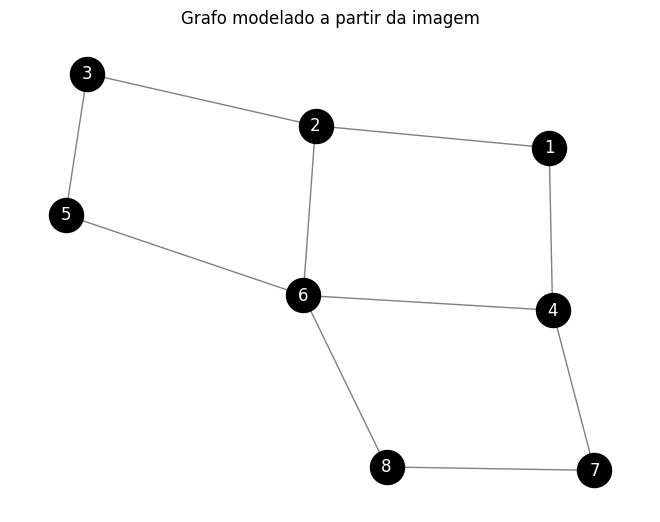

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria√ß√£o do grafo
G = nx.Graph()

# Lista de arestas conforme voc√™ indicou
edges = [
    (1, 2),
    (1, 4),
    (2, 3),
    (2, 6),
    (3, 5),
    (4, 6),
    (4, 7),
    (5, 6),
    (6, 8),
    (7, 8)
]

# Adiciona as arestas ao grafo
G.add_edges_from(edges)

# Desenho do grafo
pos = nx.spring_layout(G)  # ou outra disposi√ß√£o como kamada_kawai_layout
nx.draw(G, pos, with_labels=True, node_color='black', node_size=600, font_color='white', edge_color='gray')
plt.title("Grafo modelado a partir da imagem")
plt.show()


In [ ]:
!pip install pulp
import pulp

# Conjunto de n√≥s
V = list(range(1, 9))

# Conjunto de arestas
E = [
    (1, 2), (1, 4), (2, 3), (2, 6), (3, 5),
    (4, 6), (4, 7), (5, 6), (6, 8), (7, 8)
]

# Modelo de otimiza√ß√£o
model = pulp.LpProblem("Problema_da_Galeria_de_Arte", pulp.LpMinimize)

# Vari√°veis de decis√£o
x = pulp.LpVariable.dicts("x", V, cat="Binary")

# Fun√ß√£o objetivo
model += pulp.lpSum(x[i] for i in V), "Minimizar_n√∫mero_de_cameras"

# Restri√ß√µes: cada aresta deve ter pelo menos uma extremidade com c√¢mera
for (i, j) in E:
    model += x[i] + x[j] >= 1, f"Corredor_{i}_{j}_vigiado"

# Resolver o modelo
model.solve()

# Mostrar solu√ß√£o
print("Status:", pulp.LpStatus[model.status])
print("C√¢meras instaladas nos n√≥s:")
for i in V:
    if x[i].value() == 1:
        print(f"- N√≥ {i}")
print("N√∫mero total de c√¢meras:", sum(x[i].value() for i in V))


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 12.1 MB/s eta 0:00:00
Status: Optimal
C√¢meras instaladas nos n√≥s:
- N√≥ 2
- N√≥ 4
- N√≥ 5
- N√≥ 8
N√∫mero total de c√¢meras: 4.0


# Trabalho

In [ ]:
import pulp

# Cria o problema de maximiza√ß√£o
model = pulp.LpProblem("Situacao1", pulp.LpMaximize)

# Define as vari√°veis de decis√£o
E1 = pulp.LpVariable("E1", lowBound=0)
E2 = pulp.LpVariable("E2", lowBound=0)
E3 = pulp.LpVariable("E3", lowBound=0)
E4 = pulp.LpVariable("E4", lowBound=0)
E5 = pulp.LpVariable("E5", lowBound=0)

# Fun√ß√£o objetivo
model += (
    404.39999 * E1 +
    286.5 * E2 +
    183.3 * E3 +
    102.57 * E4 +
    127 * E5,
    "Lucro_Total"
)

# Restri√ß√µes
model += E1 <= 21.66, "Restri√ß√£o_E1"
model += E2 <= 14.17, "Restri√ß√£o_E2"
model += E4 <= 6.34,  "Restri√ß√£o_E4"
model += E5 <= 7.83,  "Restri√ß√£o_E5"
# A restri√ß√£o de E3 est√° faltando operador, ent√£o estou assumindo um limite superior arbitr√°rio alto
model += E3 <= 11.33, "Restri√ß√£o_E3"

model += (
    50.57 * E1 +    53.08 * E2 +    43.09 * E3 +    40.71 * E4 +    38.69 * E5 >= 2300,
    "Restri√ß√£o_Minima_1"
)

model += (
    87.5 * E1 +    68.3 * E2 +    58 * E3 +    56.5 * E4 +    48.6 * E5 <= 3500,
    "Restri√ß√£o_Maxima_2"
)

model += (
    6.7 * E1 +    6.6 * E2 +    4.8 * E3 +    4.5 * E4 +    5.6 * E5 <= 310,
    "Restri√ß√£o_Maxima_3"
)

# Resolve o modelo
model.solve()

# Exibe os resultados
print("Status:", pulp.LpStatus[model.status])
for var in model.variables():
    print(f"{var.name} = {var.varValue}")
print("Lucro Total =", pulp.value(model.objective))


Status: Optimal
E1 = 21.66
E2 = 14.17
E3 = 10.981707
E4 = 0.0
E5 = 0.0
Lucro Total = 14831.955676500002


In [ ]:
# Valores das vari√°veis da solu√ß√£o
E1 = 21.66
E2 = 14.17
E3 = 11.33
E4 = 4.716222
E5 = 0.0

# Checagem das restri√ß√µes
def checar_restricoes(E1, E2, E3, E4, E5):
    violadas = []

    # Limites superiores individuais
    if E1 > 21.66: violadas.append("E1 > 21.66")
    if E2 > 14.17: violadas.append("E2 > 14.17")
    if E3 > 11.33: violadas.append("E3 > 511.33")
    if E4 > 6.34: violadas.append("E4 > 6.34")
    if E5 > 7.83: violadas.append("E5 > 7.83")

    # Restri√ß√£o 1: m√≠nimo
    expr1 = 50.57*E1 + 53.08*E2 + 43.09*E3 + 40.71*E4 + 38.69*E5
    if expr1 < 2300:
        violadas.append(f"Restri√ßao 1 violada: {expr1:.2f} < 2300")

    # Restri√ß√£o 2: m√°ximo
    expr2 = 87.5*E1 + 68.3*E2 + 58*E3 + 56.5*E4 + 48.6*E5
    if expr2 > 3500:
        violadas.append(f"Restri√ßao 2 violada: {expr2:.2f} > 3500")

    # Restri√ß√£o 3: m√°ximo
    expr3 = 6.7*E1 + 6.6*E2 + 4.8*E3 + 4.5*E4 + 5.6*E5
    if expr3 > 310:
        violadas.append(f"Restri√ßao 3 violada: {expr3:.2f} > 310")

    # Resultado
    if not violadas:
        print("‚úÖ Nenhuma restri√ß√£o foi violada.")
    else:
        print("‚ö†Ô∏è Restri√ß√µes violadas:")
        for v in violadas:
            print("-", v)

# Executa a checagem
checar_restricoes(E1, E2, E3, E4, E5)


‚ö†Ô∏è Restri√ß√µes violadas:
- Restri√ßao 2 violada: 3786.67 > 3500
- Restri√ßao 3 violada: 314.25 > 310


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
model = pulp.LpProblem("Situacao2", pulp.LpMaximize)

# Definindo vari√°veis de decis√£o (cont√≠nuas, >= 0)
E1 = pulp.LpVariable("E1", lowBound=0)
E2 = pulp.LpVariable("E2", lowBound=0)
E3 = pulp.LpVariable("E3", lowBound=0)
E4 = pulp.LpVariable("E4", lowBound=0)
E5 = pulp.LpVariable("E5", lowBound=0)

# Fun√ß√£o objetivo
model += 404.39999 * E1 + 286.5 * E2 + 183.3 * E3 + 102.57 * E4 + 127 * E5, "Lucro_Total"

# Restri√ß√µes
model += E1 <= 21.66, "Restricao_2"
model += E2 <= 14.17, "Restricao_3"
model += E3 <= 11.33, "Restricao_4"
model += E4 <= 6.34, "Restricao_5"
model += E5 <= 7.83, "Restricao_6"

model += 50.57 * E1 + 53.08 * E2 + 43.09 * E3 + 40.71 * E4 + 38.69 * E5 >= 2600, "Restricao_7"
model += 67.5 * E1 + 68.3 * E2 + 58 * E3 + 56.5 * E4 + 48.6 * E5 <= 3700, "Restricao_8"
model += 6.7 * E1 + 6.6 * E2 + 4.8 * E3 + 4.5 * E4 + 5.6 * E5 <= 350, "Restricao_9"

# Resolver o modelo
model.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
for var in model.variables():
    print(f"{var.name} = {var.varValue:.4f}")
print(f"Lucro Total = {pulp.value(model.objective):.4f}")


Status: Optimal
E1 = 21.6600
E2 = 14.1700
E3 = 11.3300
E4 = 6.3400
E5 = 5.0789
Lucro Total = 16191.1155


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
model = pulp.LpProblem("Situacao3", pulp.LpMaximize)

# Definindo vari√°veis de decis√£o (cont√≠nuas, >= 0)
E1 = pulp.LpVariable("E1", lowBound=0)
E2 = pulp.LpVariable("E2", lowBound=0)
E3 = pulp.LpVariable("E3", lowBound=0)
E4 = pulp.LpVariable("E4", lowBound=0)
E5 = pulp.LpVariable("E5", lowBound=0)

# Fun√ß√£o objetivo
model += 486.5 * E1 + 301.20001 * E2 + 195.39999 * E3 + 110.7 * E4 + 131.2 * E5, "Lucro_Total"

# Restri√ß√µes
model += E1 <= 21.66, "Restricao_2"
model += E2 <= 14.17, "Restricao_3"
model += E3 <= 11.33, "Restricao_4"
model += E4 <= 6.34, "Restricao_5"
model += E5 <= 7.83, "Restricao_6"

model += 49.63 * E1 + 51.5 * E2 + 39.7 * E3 + 36.7 * E4 + 34.9 * E5 >= 1700, "Restricao_7"
model += 275 * E1 + 170 * E2 + 105 * E3 + 68 * E4 + 71 * E5 >= 9250, "Restricao_8"
model += 67.5 * E1 + 68.3 * E2 + 58 * E3 + 56.5 * E4 + 48.6 * E5 <= 3500, "Restricao_9"
model += 6.5 * E1 + 6 * E2 + 4.3 * E3 + 3.9 * E4 + 5.4 * E5 <= 450, "Restricao_10"

# Resolver o modelo
model.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
for var in model.variables():
    print(f"{var.name} = {var.varValue:.4f}")
print(f"Lucro Total = {pulp.value(model.objective):.4f}")


Status: Optimal
E1 = 21.6600
E2 = 14.1700
E3 = 11.3300
E4 = 0.5745
E5 = 7.8300
Lucro Total = 18110.3726


In [ ]:
# Solu√ß√£o dada
E1 = 21.66
E2 = 14.17
E3 = 11.33
E4 = 0.832583
E5 = 7.53

# Restri√ß√µes
restricoes = {
    "R2: E1 <= 21.66": E1 <= 21.66,
    "R3: E2 <= 14.17": E2 <= 14.17,
    "R4: E3 <= 11.33": E3 <= 11.33,
    "R5: E4 <= 6.34": E4 <= 6.34,
    "R6: E5 <= 7.83": E5 <= 7.83,
    "R7: 49.63E1 + 51.5E2 + 39.7E3 + 36.7E4 + 34.9E5 >= 1700":
        49.63 * E1 + 51.5 * E2 + 39.7 * E3 + 36.7 * E4 + 34.9 * E5 >= 1700,
    "R8: 275E1 + 170E2 + 105E3 + 68E4 + 71E5 >= 9250":
        275 * E1 + 170 * E2 + 105 * E3 + 68 * E4 + 71 * E5 >= 9250,
    "R9: 67.5E1 + 68.3E2 + 58E3 + 56.5E4 + 48.6E5 <= 3500":
        67.5 * E1 + 68.3 * E2 + 58 * E3 + 56.5 * E4 + 48.6 * E5 <= 3500,
    "R10: 6.5E1 + 6E2 + 4.3E3 + 3.9E4 + 5.4E5 <= 450":
        6.5 * E1 + 6 * E2 + 4.3 * E3 + 3.9 * E4 + 5.4 * E5 <= 450,
}

# Verifica√ß√£o das restri√ß√µes
print("Verifica√ß√£o das Restri√ß√µes:\n")
for nome, condicao in restricoes.items():
    status = "‚úîÔ∏è OK" if condicao else "‚ùå VIOLADA"
    print(f"{nome}: {status}")


Verifica√ß√£o das Restri√ß√µes:

R2: E1 <= 21.66: ‚úîÔ∏è OK
R3: E2 <= 14.17: ‚úîÔ∏è OK
R4: E3 <= 11.33: ‚úîÔ∏è OK
R5: E4 <= 6.34: ‚úîÔ∏è OK
R6: E5 <= 7.83: ‚úîÔ∏è OK
R7: 49.63E1 + 51.5E2 + 39.7E3 + 36.7E4 + 34.9E5 >= 1700: ‚úîÔ∏è OK
R8: 275E1 + 170E2 + 105E3 + 68E4 + 71E5 >= 9250: ‚úîÔ∏è OK
R9: 67.5E1 + 68.3E2 + 58E3 + 56.5E4 + 48.6E5 <= 3500: ‚úîÔ∏è OK
R10: 6.5E1 + 6E2 + 4.3E3 + 3.9E4 + 5.4E5 <= 450: ‚úîÔ∏è OK


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
model = pulp.LpProblem("Situacao4", pulp.LpMaximize)

# Definindo vari√°veis de decis√£o (cont√≠nuas, >= 0)
E1 = pulp.LpVariable("E1", lowBound=0)
E2 = pulp.LpVariable("E2", lowBound=0)
E3 = pulp.LpVariable("E3", lowBound=0)
E4 = pulp.LpVariable("E4", lowBound=0)
E5 = pulp.LpVariable("E5", lowBound=0)

# Fun√ß√£o objetivo
model += 486.5 * E1 + 301.20001 * E2 + 195.39999 * E3 + 110.7 * E4 + 131.2 * E5, "Lucro_Total"

# Restri√ß√µes
model += E1 <= 21.66, "Restricao_2"
model += E2 <= 14.17, "Restricao_3"
model += E3 <= 11.33, "Restricao_4"
model += E4 <= 6.34, "Restricao_5"
model += E5 <= 7.83, "Restricao_6"

model += 50.57 * E1 + 53.08 * E2 + 43.09 * E3 + 40.71 * E4 + 38.69 * E5 >= 2500, "Restricao_7"
model += 275 * E1 + 170 * E2 + 105 * E3 + 68 * E4 + 71 * E5 >= 8000, "Restricao_8"
model += 67.5 * E1 + 68.3 * E2 + 58 * E3 + 56.5 * E4 + 48.6 * E5 <= 4500, "Restricao_9"

# Resolver o modelo
model.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
for var in model.variables():
    print(f"{var.name} = {var.varValue:.4f}")
print(f"Lucro Total = {pulp.value(model.objective):.4f}")


Status: Optimal
E1 = 21.6600
E2 = 14.1700
E3 = 11.3300
E4 = 6.3400
E5 = 7.8300
Lucro Total = 18748.6100


In [ ]:
import pulp

# Cria√ß√£o do problema de maximiza√ß√£o
model = pulp.LpProblem("situacao5", pulp.LpMaximize)

# Definindo vari√°veis de decis√£o (cont√≠nuas, >= 0)
E1 = pulp.LpVariable("E1", lowBound=0)
E2 = pulp.LpVariable("E2", lowBound=0)
E3 = pulp.LpVariable("E3", lowBound=0)
E4 = pulp.LpVariable("E4", lowBound=0)
E5 = pulp.LpVariable("E5", lowBound=0)

# Fun√ß√£o objetivo
model += 498.29999 * E1 + 314.10001 * E2 + 207.8 * E3 + 223.5 * E4 + 142.60001 * E5, "Lucro_Total"

# Restri√ß√µes
model += E1 <= 21.66, "Restricao_2"
model += E2 <= 14.17, "Restricao_3"
model += E3 <= 11.33, "Restricao_4"
model += E4 <= 6.34, "Restricao_5"
model += E5 <= 7.83, "Restricao_6"

model += 49.63 * E1 + 51.5 * E2 + 39.7 * E3 + 36.7 * E4 + 34.9 * E5 >= 2500, "Restricao_7"
model += 275 * E1 + 170 * E2 + 105 * E3 + 68 * E4 + 71 * E5 >= 8000, "Restricao_8"
model += 6.5 * E1 + 6 * E2 + 4.3 * E3 + 3.9 * E4 + 5.4 * E5 <= 400, "Restricao_9"

# Resolver o modelo
model.solve()

# Exibir resultados
print("Status:", pulp.LpStatus[model.status])
for var in model.variables():
    print(f"{var.name} = {var.varValue:.4f}")
print(f"Lucro Total = {pulp.value(model.objective):.4f}")


Status: Optimal
E1 = 21.6600
E2 = 14.1700
E3 = 11.3300
E4 = 6.3400
E5 = 7.8300
Lucro Total = 20131.8970
